Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
num_days_R_prediction=21

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=12 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=51
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
#
drop_n_dataset_days=75
#

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
236                           NaN                Thailand  15.870032   
237                           NaN             Timor-Leste  -8.874217   
238                           NaN                    Togo   8.619500   
239                           NaN     Trinidad and Tobago  10.691800   
240                           NaN                 Tunisia  33.886917   
241                           NaN                  Turkey  38.963700   
242                           NaN           United States  40.000000   
243                           NaN                  Uganda   1.373333   
244                           NaN                 Ukraine  48.379400   
245                           NaN    United Arab Emirates  23.424076   
246                      Anguilla          United Kingdom  18.220600   
247                       Bermuda          United Kingdom  32.307800   
248        British Virgin Islands          United Kingdom  18.420700   
249                Cayman Islands          United Kingdom  19.313300   
250               Channel Islands          United Kingdom  49.372300   
251   Falkland Islands (Malvinas)          United Kingdom -51.796300   
252                     Gibraltar          United Kingdom  36.140800   
253                   Isle of Man          United Kingdom  54.236100   
254                    Montserrat          United Kingdom  16.742498   
255      Turks and Caicos Islands          United Kingdom  21.694000   
256                           NaN          United Kingdom  55.378100   
257                           NaN                 Uruguay -32.522800   
258                           NaN              Uzbekistan  41.377491   
259                           NaN               Venezuela  

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
238                           NaN                Thailand  15.870032   
239                           NaN             Timor-Leste  -8.874217   
240                           NaN                    Togo   8.619500   
241                           NaN     Trinidad and Tobago  10.691800   
242                           NaN                 Tunisia  33.886917   
243                           NaN                  Turkey  38.963700   
244                           NaN           United States  40.000000   
245                           NaN                  Uganda   1.373333   
246                           NaN                 Ukraine  48.379400   
247                           NaN    United Arab Emirates  23.424076   
248                      Anguilla          United Kingdom  18.220600   
249                       Bermuda          United Kingdom  32.307800   
250        British Virgin Islands          United Kingdom  18.420700   
251                Cayman Islands          United Kingdom  19.313300   
252               Channel Islands          United Kingdom  49.372300   
253   Falkland Islands (Malvinas)          United Kingdom -51.796300   
254                     Gibraltar          United Kingdom  36.140800   
255                   Isle of Man          United Kingdom  54.236100   
256                    Montserrat          United Kingdom  16.742498   
257      Turks and Caicos Islands          United Kingdom  21.694000   
258                           NaN          United Kingdom  55.378100   
259                           NaN                 Uruguay -32.522800   
260                           NaN              Uzbekistan  41.377491   
261                           NaN               Venezuela  

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/20  \
185        0        0        0        0        0        0  ...       64   
186        0        0        0        0        0        0  ...      123   
187        0        0        0        0        0        0  ...      520   
188        0        0        0        0        0        0  ...       30   
189        0        0        0        0        0        0  ...        1   
190        0        0        0        0        0        0  ...        1   
191        0        0        0        0        0        0  ...       22   
192        0        0        0        0        0        0  ...     6428   
193        0        0        0        0        0        0  ...       25   
194        0        0        0        0        0        0  ...      151   

     10/3/20  10/4/20  10/5/20  10/6/20  10/7/20  10/8/20  10/9/20  \
185       64       66       66       67       68       68       69   
186      123      123      125      125      126      127      127   
187      528      535      554      563      578      590      600   
188       30       30       31       31       31       31       32   
189        1        1        1        2        2        2        2   
190        1        1        1        1        1        1        1   
191       22       22       22       22       22       22       22   
192     6449     6454     6454     6482     6518     6531     6544   
193       25       25       25       25       25       25       25   
194      151      151      151      151      153      153      153   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 268 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State   Country/Region        Lat        Long  \
175                             Aruba      Netherlands  12.521100  -69.968300   
176  Bonaire, Sint Eustatius and Saba      Netherlands  12.178400  -68.238500   
177                           Curacao      Netherlands  12.169600  -68.990000   
178                      Sint Maarten      Netherlands  18.042500  -63.054800   
179                               NaN      Netherlands  52.132600    5.291300   
180                               NaN      New Zealand -40.900600  174.886000   
181                               NaN        Nicaragua  12.865416  -85.207229   
182                               NaN            Niger  17.607789    8.081666   
183                               NaN          Nigeria   9.082000    8.675300   
184                               NaN  North Macedonia  41.608600   21.745300   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/20  \
175        0        0        0        0        0        0  ...     3406   
176        0        0        0        0        0        0  ...       32   
177        0        0        0        0        0        0  ...      197   
178        0        0        0        0        0        0  ...      572   
179        0        0        0        0        0        0  ...        0   
180        0        0        0        0        0        0  ...     1783   
181        0        0        0        0        0        0  ...     2913   
182        0        0        0        0        0        0  ...     1115   
183        0        0        0        0        0        0  ...    50593   
184        0        0        0        0        0        0  ...    15164   

     10/3/20  10/4/20  10/5/20  10/6/20  10/7/20  10/8/20  10/9/20  \
175     3474     3532     3612     3643     3678     3718     3718   
176       46       46       46       67       67       67       78   
177      213      231      242      262      270      281      291   
178      572      572      592      592      592      620      622   
179        0        0        0        0        0        0        0   
180     1788     1790     1790     1799     1800     1800     1801   
181     2913     2913     2913     4225     4225     4225     4225   
182     1115     1115     1115     1115     1122     1122     1123   
183    50718    50768    50951    51308    51403    51551    51614   
184    15264    15341    15487    15645    15749    15855    16009   

      Population                                         region  
175           NaN                             Netherlands_Aruba  
176           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
177           NaN                           Netherlands_Curacao  
178           NaN                      Netherlands_Sint Maarten  
179    17,180,000                               Netherlands_nan  
180     4,813,844                               New Zealand_nan  
181           NaN                                 Nicaragua_nan  
182    24,002,020                                     Niger_nan  
183           NaN                                   Nigeria_nan  
184     2,077,000                           North Macedonia_nan  

[10 rows x 268 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/20  \
185        0        0        0        0        0        0  ...     8979   
186        0        0        0        0        0        0  ...    11480   
187        0        0        0        1        1        1  ...    82450   
188        0        0        0        0        0        0  ...     4038   
189        0        0        0        0        0        0  ...      121   
190        0        0        0        0        0        0  ...      411   
191        0        0        0        0        0        0  ...      674   
192        0        0        0        0        0        0  ...   127922   
193        0        0        0        0        0        0  ...     1849   
194        0        0        0        0        0        0  ...     5170   

     10/3/20  10/4/20  10/5/20  10/6/20  10/7/20  10/8/20  10/9/20  \
185     9049     9196     9296     9398     9494     9639     9742   
186    11572    11626    11654    11673    11714    11781    11829   
187    84570    86823    89263    90814    94253    98617   100676   
188     4074     4079     4094     4108     4133     4150     4167   
189      124      124      124      141      141      141      148   
190      429      452      462      476      505      532      549   
191      678      679      686      689      698      699      703   
192   131889   135892   135892   144999   149988   155810   161781   
193     1854     1855     1858     1861     1864     1866     1870   
194     5170     5170     5170     5264     5264     5264     5264   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 268 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
220            NaN     Seychelles  -4.679600   55.492000        0        0   
221            NaN   Sierra Leone   8.460555  -11.779889        0        0   
222            NaN      Singapore   1.283300  103.833300        0        1   
223            NaN       Slovakia  48.669000   19.699000        0        0   
224            NaN       Slovenia  46.151200   14.995500        0        0   
225            NaN        Somalia   5.152149   46.199616        0        0   
226            NaN   South Africa -30.559500   22.937500        0        0   
227            NaN    South Sudan   6.877000   31.307000        0        0   
228            NaN          Spain  40.463667   -3.749220        0        0   
229            NaN      Sri Lanka   7.873054   80.771797        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/20  10/3/20  10/4/20  \
220        0        0        0        0  ...      145      146      146   
221        0        0        0        0  ...     2252     2259     2269   
222        3        3        4        5  ...    57794    57800    57812   
223        0        0        0        0  ...    11617    12321    13139   
224        0        0        0        0  ...     6103     6330     6498   
225        0        0        0        0  ...     3593     3593     3745   
226        0        0        0        0  ...   677833   679716   681289   
227        0        0        0        0  ...     2715     2715     2726   
228        0        0        0        0  ...   789932   789932   789932   
229        0        0        0        1  ...     3388     3395     3402   

     10/5/20  10/6/20  10/7/20  10/8/20  10/9/20   Population   \
220      146      148      148      148      148           NaN   
221     2269     2277     2287     2293     2295           NaN   
222    57819    57830    57840    57849    57859     5,612,000   
223    13492    13812    14689    15726    16910     5,459,087   
224     6673     6764     7120     7507     7872     2,078,878   
225     3745     3745     3745     3745     3745           NaN   
226   682215   683242   685155   686891   688352    59,148,674   
227     2726     2734     2748     2749     2761           NaN   
228   813412   825410   835901   848324   861112    46,660,000   
229     3513     4252     4459     4488     4523    21,440,000   

               region  
220    Seychelles_nan  
221  Sierra Leone_nan  
222     Singapore_nan  
223      Slovakia_nan  
224      Slovenia_nan  
225       Somalia_nan  
226  South Africa_nan  
227   South Sudan_nan  
228         Spain_nan  
229     Sri Lanka_nan  

[10 rows x 268 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

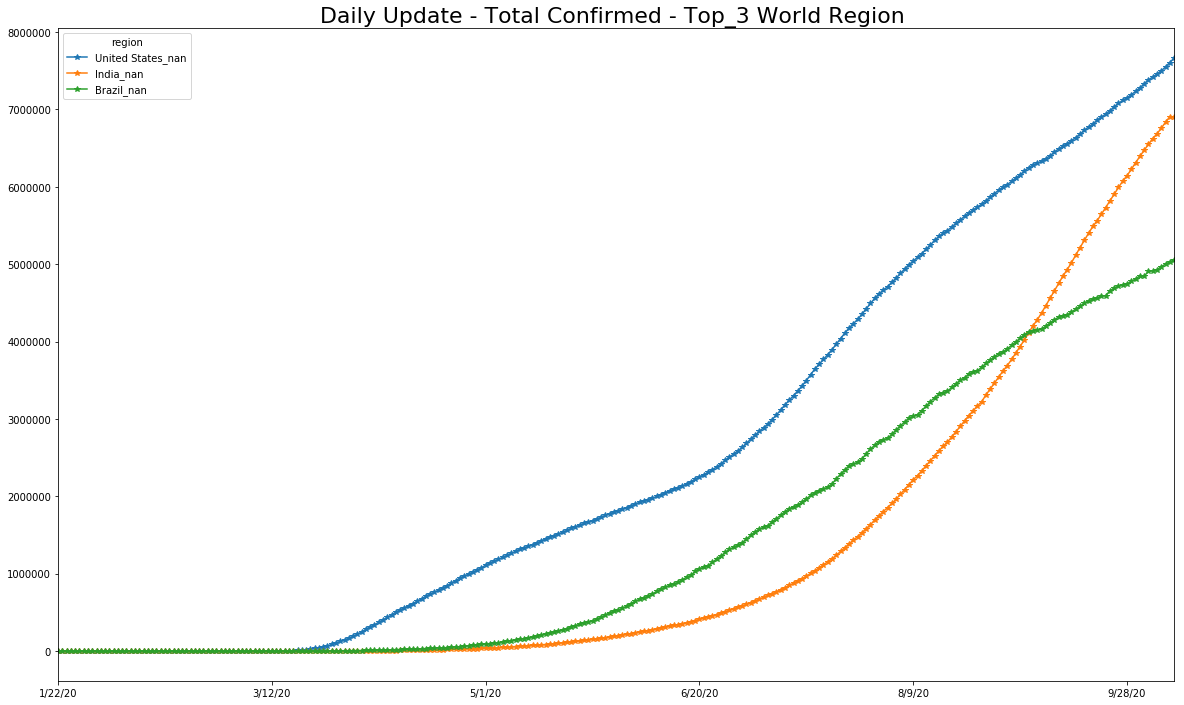

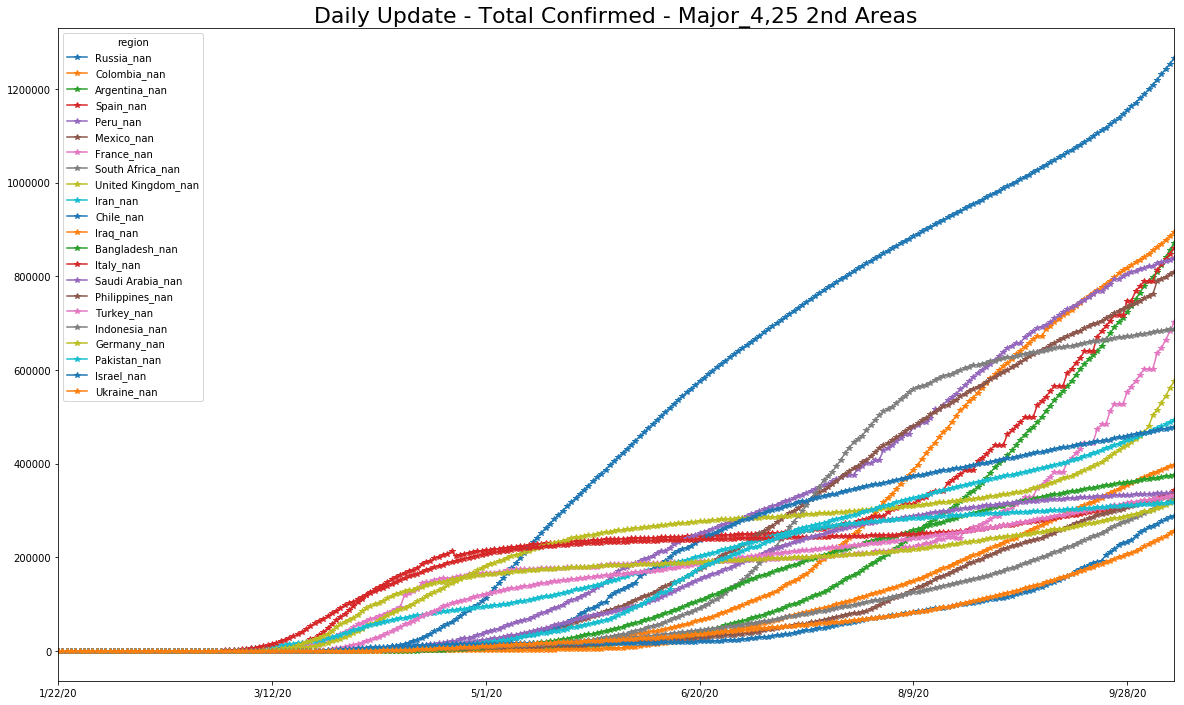

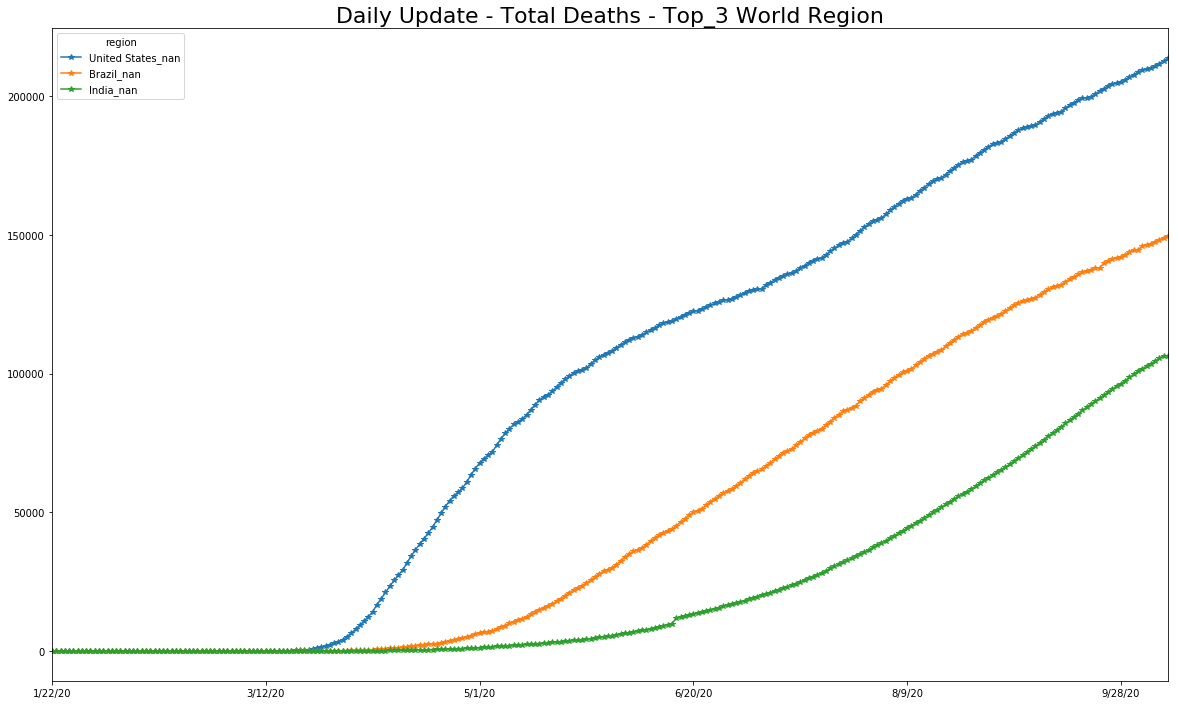

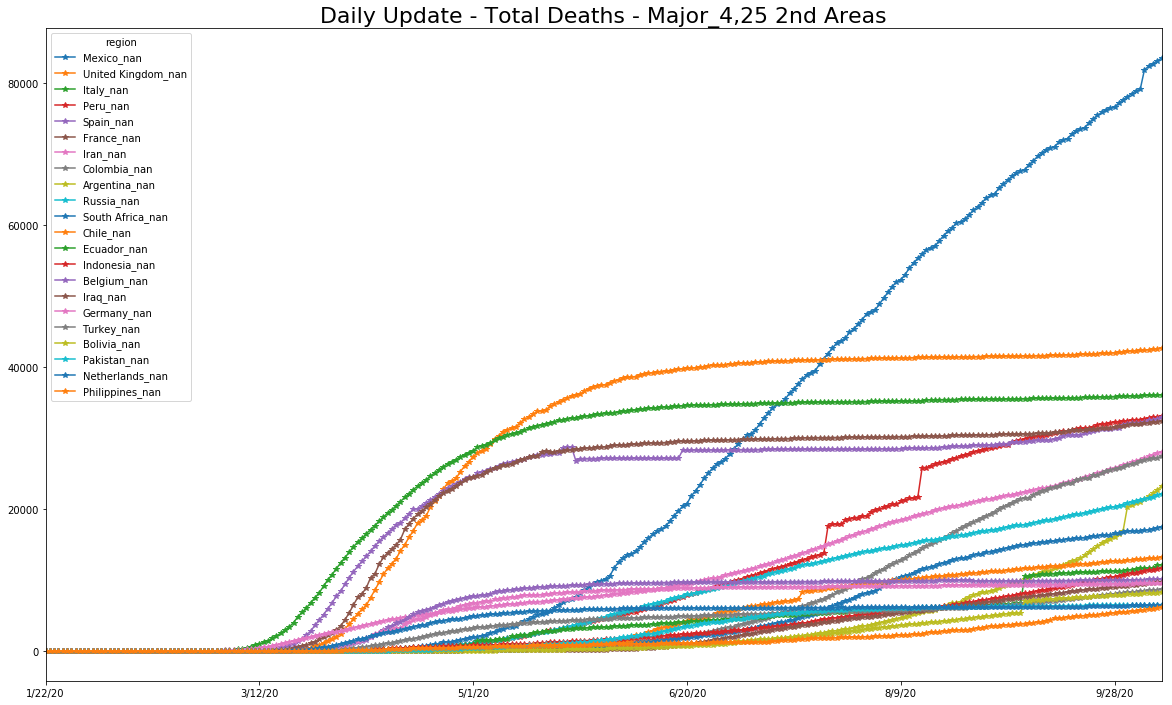

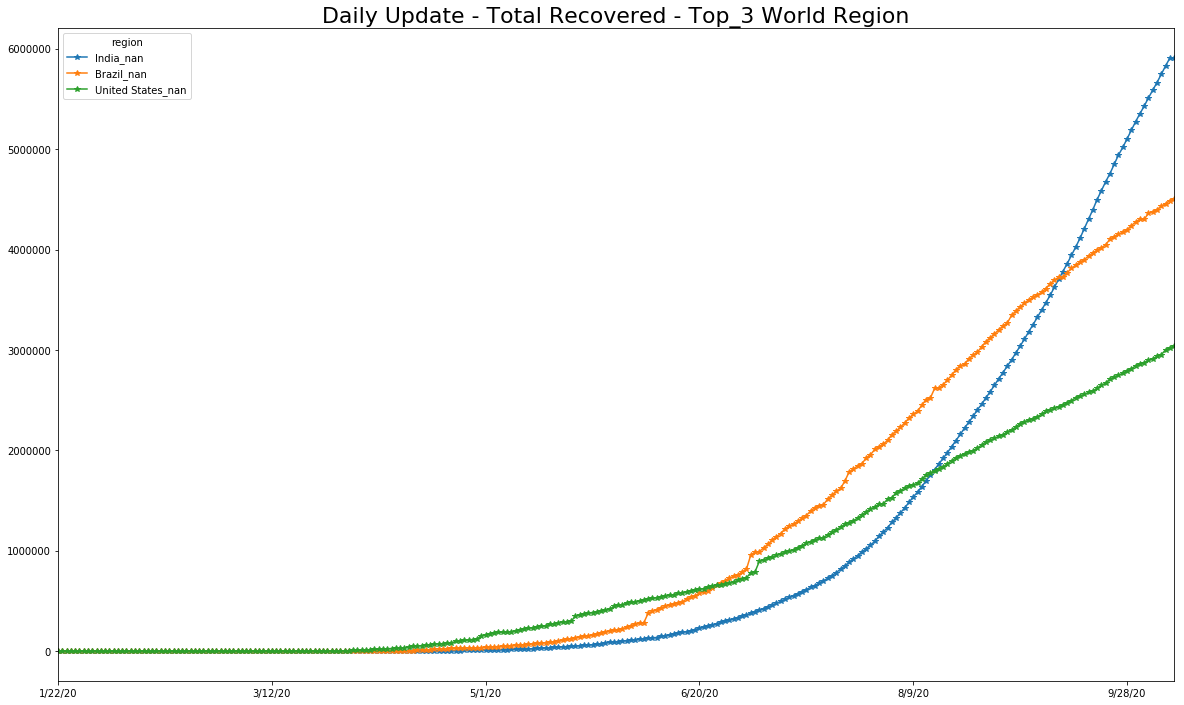

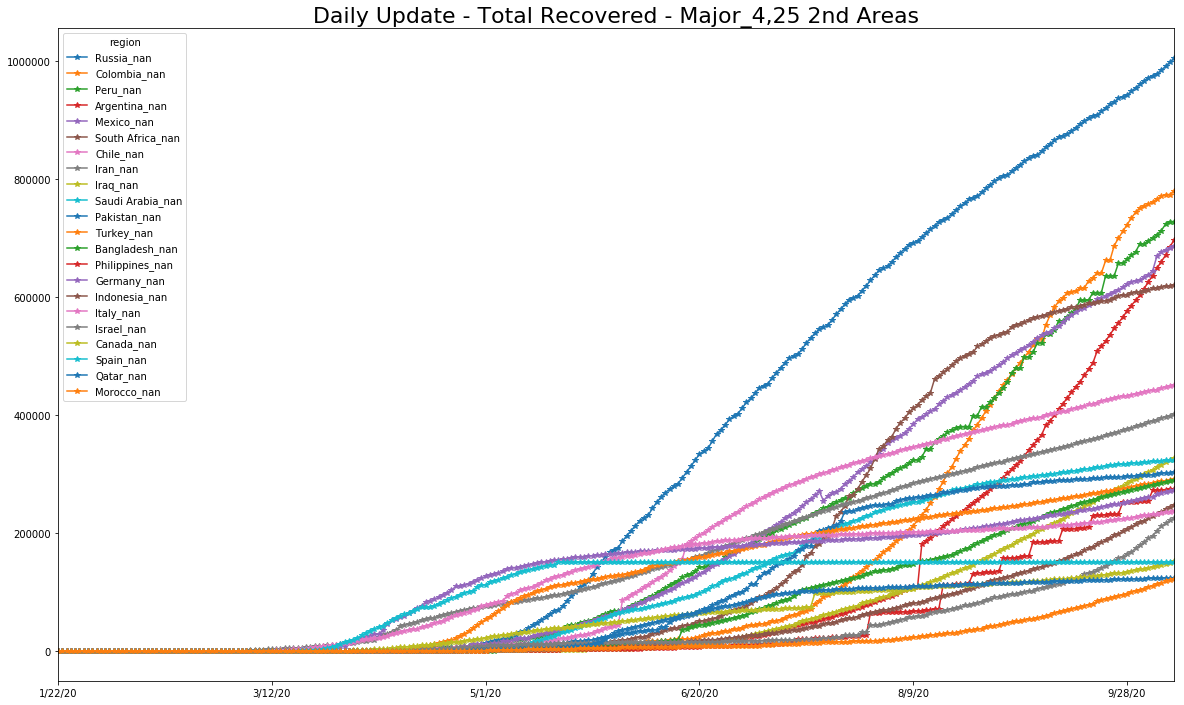

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/10/10


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
4/6/20              367          377         1423          525          16   
4/7/20              423          383         1468          545          17   
4/8/20              444          400         1572          564          19   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
4/6/20                       15           1554          833   
4/7/20                       19           1628          853   
4/8/20                       19           1715          881   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
4/6/20                                      96                       2637   
4/7/20                                      96                       2686   
4/8/20                                      99                       2734   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
4/6/20  ...             371672          415             457            165   
4/7/20  ...             403071          424             520            165   
4/8/20  ...             435087          456             545            167   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
4/6/20          245                     254                   4          0   
4/7/20          249                     261                   4          0   
4/8/20          251                     263                   4          0   

region  Zambia_nan  Zimbabwe_nan  
4/6/20          39            10  
4/7/20          39            11  
4/8/20          39            11  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
10/6/20            39486        14568        52399         2370        5725   
10/7/20            39548        14730        52520         2568        5725   
10/8/20            39616        14899        52658         2568        5958   
10/9/20            39693        15066        52804         2696        6031   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
10/6/20                      107         824468        53083   
10/7/20                      108         840915        53755   
10/8/20                      111         856369        54473   
10/9/20                      111         871468        55087   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
10/6/20                                     113                       4249   
10/7/20                                     113                       4261   
10/8/20                                     113                       4271   
10/9/20                                     113                       4273   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
10/6/20  ...            7499341         2177           59343          79796   
10/7/20  ...            7549682         2206           59579          80404   
10/8/20  ...            7605873         2226           60026          81019   
10/9/20  ...            7663293         2251           60342          81696   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
10/6/20         1098                   42432                  10       2047   
10/7/20         1099                   42840                  10       2049   
10/8/20         1100                   43256                  10       2050   
10/9/20         1105                   43664                  10       2051   

region   Zambia_nan  Zimbabwe_nan  
10/6/20       15170          7915  
10/7/20       15224          7919  
10/8/20       15301          7951  
10/9/20       15339          7994  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-04-07  Afghanistan_nan        423             0             0   
2     2020-04-08  Afghanistan_nan        444            56             0   
3     2020-04-09  Afghanistan_nan        484            21             0   
4     2020-04-10  Afghanistan_nan        521            40           117   
5     2020-04-11  Afghanistan_nan        555            37            98   
6     2020-04-12  Afghanistan_nan        607            34           111   
7     2020-04-13  Afghanistan_nan        665            52           123   
8     2020-04-14  Afghanistan_nan        714            58           144   
9     2020-04-15  Afghanistan_nan        784            49           159   
10    2020-04-16  Afghanistan_nan        840            70           177   
11    2020-04-17  Afghanistan_nan        906            56           175   
12    2020-04-18  Afghanistan_nan        933            66           192   
13    2020-04-19  Afghanistan_nan        996            27           149   
14    2020-04-20  Afghanistan_nan       1026            63           156   
15    2020-04-21  Afghanistan_nan       1092            30           120   
16    2020-04-22  Afghanistan_nan       1176            66           159   
17    2020-04-23  Afghanistan_nan       1279            84           180   
18    2020-04-24  Afghanistan_nan       1351           103           253   
19    2020-04-25  Afghanistan_nan       1463            72           259   
20    2020-04-26  Afghanistan_nan       1531           112           287   
21    2020-04-27  Afghanistan_nan       1703            68           252   
22    2020-04-28  Afghanistan_nan       1828           172           352   
23    2020-04-29  Afghanistan_nan       1939           125           365   
24    2020-04-30  Afghanistan_nan       2171           111           408   
25    2020-05-01  Afghanistan_nan       2335           232           468   
26    2020-05-02  Afghanistan_nan       2469           164           507   
27    2020-05-03  Afghanistan_nan       2704           134           530   
28    2020-05-04  Afghanistan_nan       2894           235           533   
29    2020-05-05  Afghanistan_nan       3224           190           559   
30    2020-05-06  Afghanistan_nan       3392           330           755   
...          ...              ...        ...           ...           ...   
50354 2020-09-11     Zimbabwe_nan       7479            24           155   
50355 2020-09-12     Zimbabwe_nan       7508            26            91   
50356 2020-09-13     Zimbabwe_nan       7526            29            79   
50357 2020-09-14     Zimbabwe_nan       7531            18            73   
50358 2020-09-15     Zimbabwe_nan       7576             5            52   
50359 2020-09-16     Zimbabwe_nan       7598            45            68   
50360 2020-09-17     Zimbabwe_nan       7633            22            72   
50361 2020-09-18     Zimbabwe_nan       7647            35           102   
50362 2020-09-19     Zimbabwe_nan       7672            14            71   
50363 2020-09-20     Zimbabwe_nan       7683            25            74   
50364 2020-09-21     Zimbabwe_nan       7683            11            50   
50365 2020-09-22     Zimbabwe_nan       7711             0            36   
50366 2020-09-23     Zimbabwe_nan       7725            28            39   
50367 2020-09-24     Zimbabwe_nan       7752            14            42   
50368 2020-09-25     Zimbabwe_nan       7787            27            69   
50369 2020-09-26     Zimbabwe_nan       7803            35            76   
50370 2020-09-27     Zimbabwe_nan       7812            16            78   
50371 2020-09-28     Zimbabwe_nan       7816             9            60   
50372 2020-09-29     Zimbabwe_nan       7837             4            29   
50373 2020-09-30     Zimbabwe_nan       7838            21            34   
50374 2020-10-01     Zimbabwe_nan       7850             1  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
50383 2020-10-10  Zimbabwe_nan          0            43            79   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
50383           136         100.540938         100.998231         101.730848   

       last_day  kalman_prediction  population  infected_rate  min  max  
50383      7994             7993.0    14862924       0.000005  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
50381  2020-10-08  Zimbabwe_nan       7951             4            31   
50382  2020-10-09  Zimbabwe_nan       7994            32            53   
50383  2020-10-10  Zimbabwe_nan          0            43            79   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
50381            81         100.050663         100.393129         101.033554   
50382           101         100.404218         100.671183         101.286752   
50383           136         100.540938         100.998231         101.730848   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
50381                 7919  ...    14862924       0.000005  NaN  NaN   
50382                 7951  ...    14862924       0.000005  NaN  NaN   
50383                 7994  ...    14862924       0.000005  NaN  NaN   

       population_percentage : infected_rate confirmed  \
50381                                         0.000533   
50382                                         0.000535   
50383                                         0.000538   

       population_percentage : factor 9/10 infected_rate confirmed  \
50381                                           0.005329             
50382                                           0.005350             
50383                                           0.005379             

       delta : new_cases  delta : new_cases per 1M hab  \
50381               14.0                      0.941941   
50382                4.0                      0.269126   
50383               -1.0                     -0.067282   

       delta : roling 7day AVG  \
50381                11.571429   
50382                14.428571   
50383                19.428571   

       delta : aprox 14-day case notification rate per 100k hab  
50381                                           1.089960         
50382                                           1.359087         
50383                                           1.830057         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  3.173003e+11  563294.138089  48013.352941


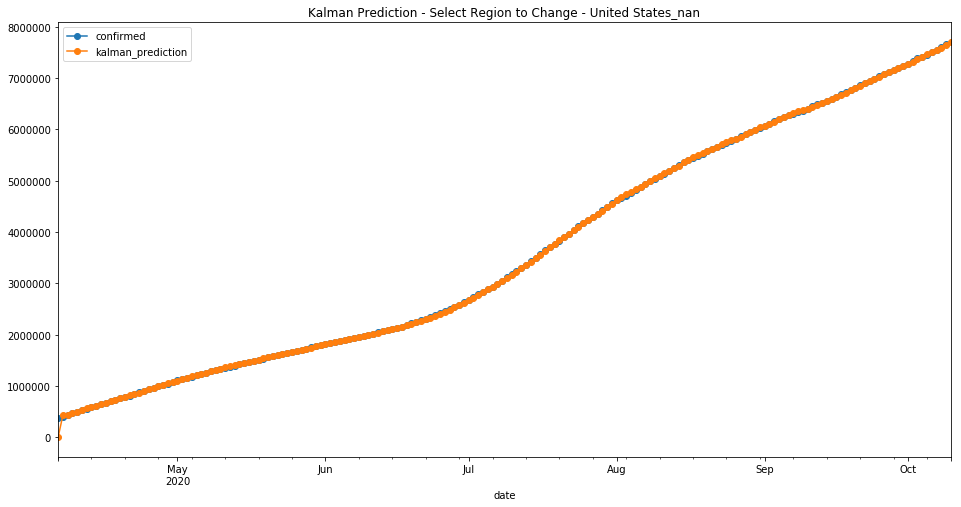

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  8.703294e+09  93291.447108  7674.203209


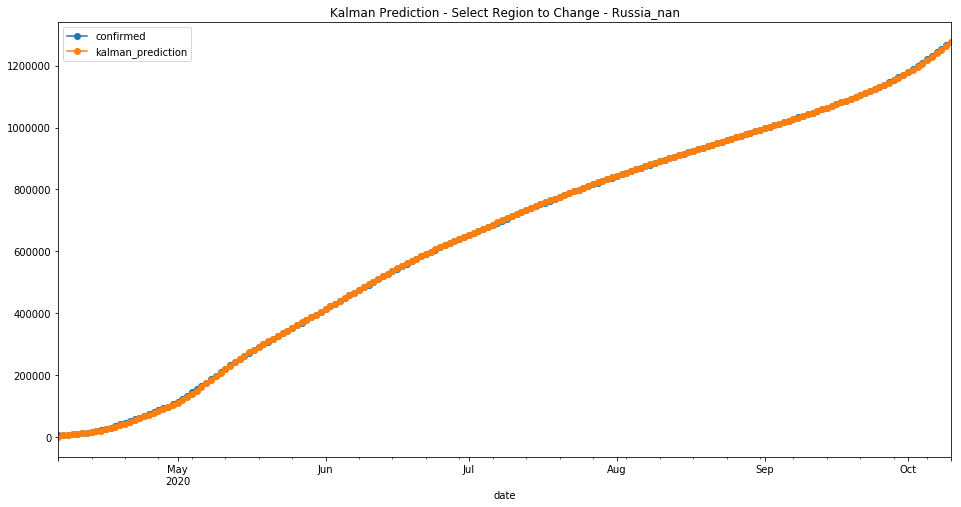

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse           mae
30  Brazil_nan  1.383617e+11  371969.97144  38042.016043


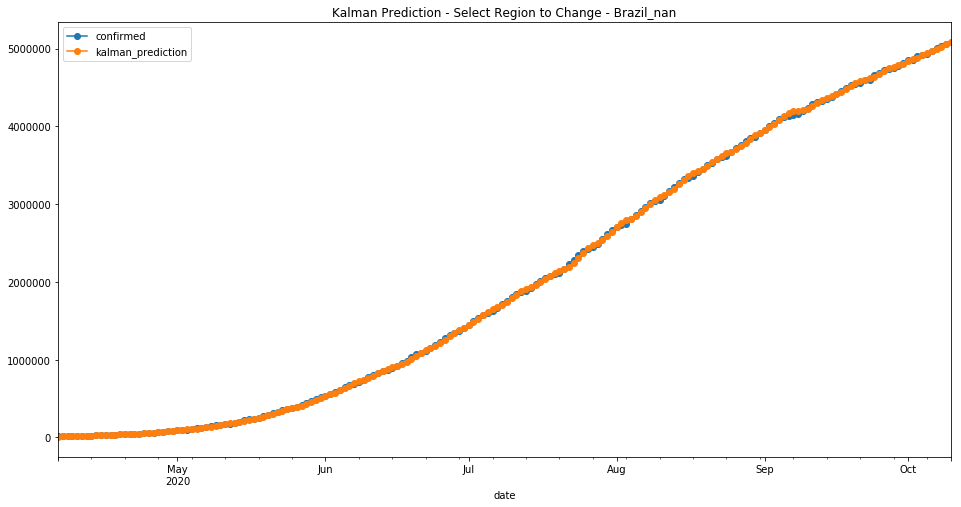

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
255  United Kingdom_nan  1.867341e+09  43212.741477  4084.529412


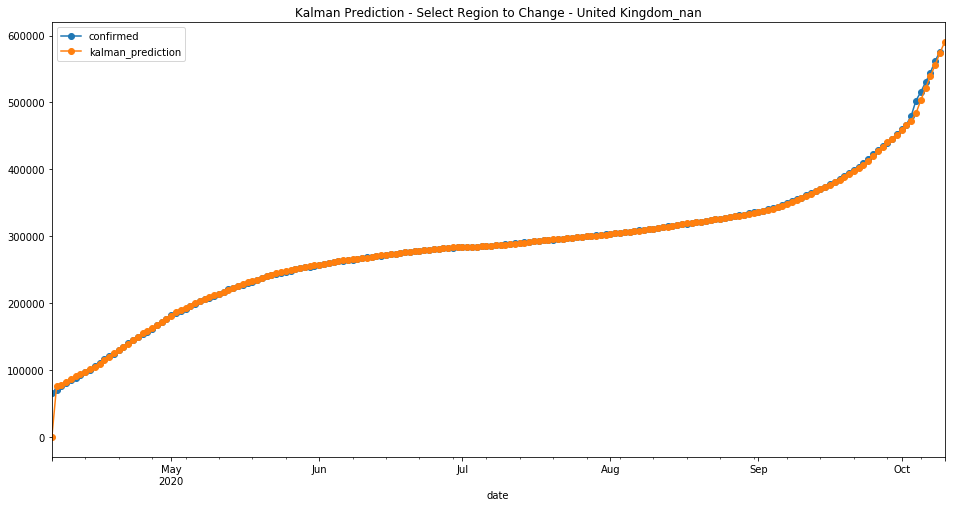

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmgcl8u3v
  JVM stdout: /tmp/tmpmgcl8u3v/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmgcl8u3v/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       Etc/GMT
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.3
H2O_cluster_version_age:    11 days
H2O_cluster_name:           H2O_from_python_unknownUser_lr1mbf
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.543 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.7 final
--------------------------  ------------------------------------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-09-28
last_train_date= 2020-10-09
first_bootstrap_date= 2020-10-01
boost_bootstrap_date= 2020-10-06
first_test_date= 2020-09-30
last_test_date= 2020-10-10
first_valid_date= 2020-10-08


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   39289.0      39285 2020-10-01  Afghanistan_nan
1   39304.0      39290 2020-10-02  Afghanistan_nan
2   39304.0      39297 2020-10-03  Afghanistan_nan
3   39311.0      39341 2020-10-04  Afghanistan_nan
4   39360.0      39422 2020-10-05  Afghanistan_nan
5   39441.0      39486 2020-10-06  Afghanistan_nan
6   39501.0      39548 2020-10-07  Afghanistan_nan
7   39573.0      39616 2020-10-08  Afghanistan_nan
8   39655.0      39693 2020-10-09  Afghanistan_nan
9   39743.0          0 2020-10-10  Afghanistan_nan
10  13787.0      13806 2020-10-01      Albania_nan
11  13948.0      13965 2020-10-02      Albania_nan
12  14106.0      14117 2020-10-03      Albania_nan
13  14263.0      14266 2020-10-04      Albania_nan
14  14419.0      14410 2020-10-05      Albania_nan
15  14571.0      14568 2020-10-06      Albania_nan
16  14735.0      14730 2020-10-07      Albania_nan
17  14899.0      14899 2020-10-08      Albania_nan
18  15070.0      15066 2020-10-09      Albania_nan
19  15240.0          0 2020-10-10      Albania_nan
20  51696.0      51690 2020-10-01      Algeria_nan
21  51848.0      51847 2020-10-02      Algeria_nan
22  52002.0      51995 2020-10-03      Algeria_nan
23  52148.0      52136 2020-10-04      Algeria_nan
24  52289.0      52270 2020-10-05      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  40892.0      40931 2020-10-06  Azerbaijan_nan
176  41051.0      41113 2020-10-07  Azerbaijan_nan
177  41241.0      41304 2020-10-08  Azerbaijan_nan
178  41433.0      41519 2020-10-09  Azerbaijan_nan
179  41664.0          0 2020-10-10  Azerbaijan_nan
180   4163.0       4123 2020-10-01     Bahamas_nan
181   4169.0       4220 2020-10-02     Bahamas_nan
182   4287.0       4332 2020-10-03     Bahamas_nan
183   4401.0       4409 2020-10-04     Bahamas_nan
184   4482.0       4452 2020-10-05     Bahamas_nan
185   4535.0       4559 2020-10-06     Bahamas_nan
186   4644.0       4713 2020-10-07     Bahamas_nan
187   4792.0       4713 2020-10-08     Bahamas_nan
188   4796.0       4713 2020-10-09     Bahamas_nan
189   4815.0          0 2020-10-10     Bahamas_nan
190  71575.0      71374 2020-10-01     Bahrain_nan
191  72097.0      71803 2020-10-02     Bahrain_nan
192  72486.0      72310 2020-10-03     Bahrain_nan
193  72997.0      72662 2020-10-04     Bahrain_nan
194  73298.0      73116 2020-10-05     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220   78966.0      79019 2020-10-01  Belarus_nan
221   79363.0      79421 2020-10-02  Belarus_nan
222   79776.0      79852 2020-10-03  Belarus_nan
223   80226.0      79852 2020-10-04  Belarus_nan
224   80161.0      80696 2020-10-05  Belarus_nan
225   81215.0      81090 2020-10-06  Belarus_nan
226   81429.0      81505 2020-10-07  Belarus_nan
227   81888.0      81982 2020-10-08  Belarus_nan
228   82430.0      82471 2020-10-09  Belarus_nan
229   82933.0          0 2020-10-10  Belarus_nan
230  120146.0     121059 2020-10-01  Belgium_nan
231  122951.0     124234 2020-10-02  Belgium_nan
232  126089.0     127623 2020-10-03  Belgium_nan
233  129507.0     130235 2020-10-04  Belgium_nan
234  132183.0     132203 2020-10-05  Belgium_nan
235  134424.0     134291 2020-10-06  Belgium_nan
236  136874.0     137868 2020-10-07  Belgium_nan
237  140768.0     143596 2020-10-08  Belgium_nan
238  146715.0     148981 2020-10-09  Belgium_nan
239  151895.0          0 2020-10-10  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  105280795.1655433
# MSE on the validation data =  1153337514102.0098
# R^2 on the training data =  0.999894703442504
# R^2 on the validation data =  0.4784292861598408


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1602312538581_1


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              500.0                     500.0           24431311.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       22.0       23.0      22.992      3366.0      4004.0      3829.17



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 105280795.1655433
RMSE: 10260.643019106712
MAE: 1729.2539003346192
RMSLE: 0.11160900918465859
Mean Residual Deviance: 105280795.1655433

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 1153337514102.0098
RMSE: 1073935.5260452137
MAE: 253297.8267141612
RMSLE: 6.760977759231808
Mean Residual Deviance: 1153337514102.0098

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2020-10-10 06:49:06   0.085 sec              0.0            NaN   
1     2020-10-10 06:49:06   0.526 sec              1.0   38626.547515   
2     2020-10-10 06:49:06   0.680 sec              2.0   32838.392710   
3     2020-10-10 06:49:07   1.054 sec              3.0   24398.734857   
4     2020-10-10 06:49:07   1.149 sec              4.0   22412.554888   
5     2020-10-10 06:49:07   1.235 sec              5.0   20969.995320   
6     2020-10-10 06:49:07   1.299 sec              6.0   21889.338849   
7     2020-10-10 06:49:07   1.373 sec              7.0   19956.095425   
8     2020-10-10 06:49:07   1.449 sec              8.0   18019.770857   
9     2020-10-10 06:49:07   1.510 sec              9.0   24937.297226   
10    2020-10-10 06:49:07   1.585 sec             10.0   23383.193714   
11    2020-10-10 06:49:07   1.666 sec             11.0   22880.494429   
12    2020-10-10 06:49:08   1.745 sec             12.0   23477.714798   
13    2020-10-10 06:49:08   1.822 sec             13.0   22463.870125   
14    2020-10-10 06:49:08   1.903 sec             14.0   21608.288980   
15    2020-10-10 06:49:08   1.984 sec             15.0   18648.998523   
16    2020-10-10 06:49:08   2.064 sec             16.0   18040.066991   
17    2020-10-10 06:49:08   2.161 sec             17.0   17839.668224   
18    2020-10-10 06:49:08   2.246 sec             18.0   17459.006013   
19    2020-10-10 06:49:08   2.334 sec             19.0   16444.680577   

    training_mae  training_deviance  validation_rmse  validation_mae  \
0            NaN                NaN              NaN             NaN   
1    6450.284117       1.492010e+09     1.123631e+06   261265.489865   
2    6106.360016       1.078360e+09     1.008995e+06   238595.774642   
3    5335.503632       5.952983e+08     1.036776e+06   244097.694270   
4    4821.849540       5.023226e+08     1.056050e+06   247284.347710   
5    4488.755354       4.397407e+08     1.061190e+06   248269.887276   
6    4642.824981       4.791432e+08     1.062467e+06   249072.828258   
7    4362.776022       3.982457e+08     1.068054e+06   249554.409871   
8    4048.712809       3.247121e+08     1.073344e+06   250229.233070   
9    4196.280470       6.218688e+08     1.078753e+06   254657.604787   
10   3976.160647       5.467737e+08     1.080036e+06   254697.576354   
11   3802.854989       5.235170e+08     1.082020e+06   254815.311805   
12   3847.827621       5.512031e+08     1.084205e+06   254988.272875   
13   3717.259343       5.046255e+08     1.085977e+06   254984.265161   
14   3521.597085       4.669182e+08     1.087230e+06   254927.130225   
15   3308.149954       3.477851e+08     1.089347e+06   255004.927388   
16   3178.866350       3.254440e+08     1.090763e+06   254955.372815   
17   3152.411856       3.182538e+08     1.089839e+06   255127.081906   
18   3059.797092       3.048169e+08     1.091490e+06   255173.616149   
19   3033.989609       2.704275e+08     1.092194e+06   255289.518939   

    validation_deviance  
0                   NaN  
1          1.262546e+12  
2          1.018071e+12  
3          1.074905e+12  
4          1.115242e+12  
5          1.126123e+12  
6          1.128836e+12  
7          1.140740e+12  
8          1.152067e+12  
9          1.163708e+12  
10         1.166477e+12  
11         1.170768e+12  
12         1.175500e+12  
13         1.179345e+12  
14         1.182068e+12  
15         1.186676e+12  
16         1.189764e+12  
17         1.187749e+12  
18         1.191350e+12  
19         1.192888e+12


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0            last_day         1.214210e+18           1.000000    0.359569
1   kalman_prediction         9.505380e+17           0.782845    0.281487
2        7_day_change         5.264800e+17           0.433599    0.155909
3        3_day_change         2.778411e+17           0.228825    0.082278
4        1_day_change         1.918486e+17           0.158003    0.056813
5              region         8.964859e+16           0.073833    0.026548
6       infected_rate         4.980551e+16           0.041019    0.014749
7   7_day_change_rate         2.837413e+16           0.023368    0.008403
8   3_day_change_rate         2.514004e+16           0.020705    0.007445
9   1_day_change_rate         1.868705e+16           0.015390    0.005534
10                max         2.534718e+15           0.002088    0.000751
11                min         1.741317e+15           0.001434    0.000516

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         1.214210e+18           1.000000    0.359569
1   kalman_prediction         9.505380e+17           0.782845    0.281487
2        7_day_change         5.264800e+17           0.433599    0.155909
3        3_day_change         2.778411e+17           0.228825    0.082278
4        1_day_change         1.918486e+17           0.158003    0.056813
5              region         8.964859e+16           0.073833    0.026548
6       infected_rate         4.980551e+16           0.041019    0.014749
7   7_day_change_rate         2.837413e+16           0.023368    0.008403
8   3_day_change_rate         2.514004e+16           0.020705    0.007445
9   1_day_change_rate         1.868705e+16           0.015390    0.005534
10                max         2.534718e+15           0.002088    0.000751
11                min         1.741317e+15           0.001434    0.000516

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


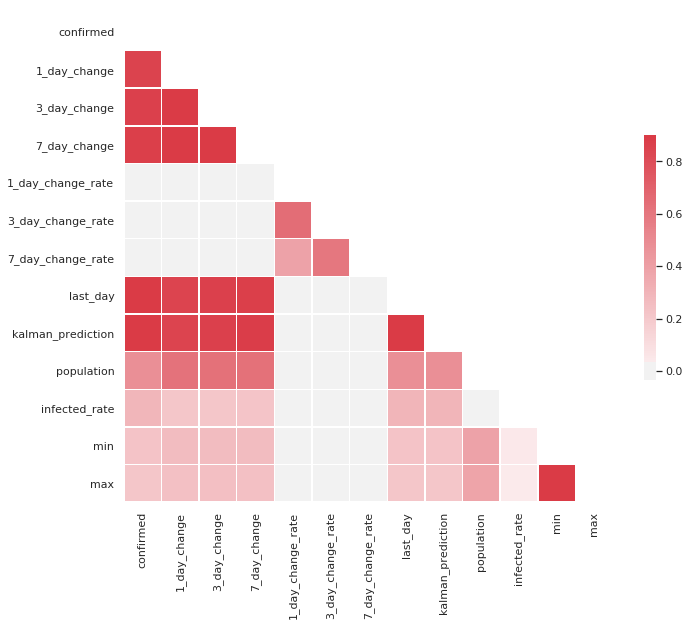

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.850260
3_day_change         0.863681
7_day_change         0.875864
1_day_change_rate    0.009369
3_day_change_rate    0.004559
7_day_change_rate   -0.000294
last_day             0.988927
kalman_prediction    0.989010
population           0.478627
infected_rate        0.291678
min                  0.226422
max                  0.215622
Name: confirmed, dtype: float64


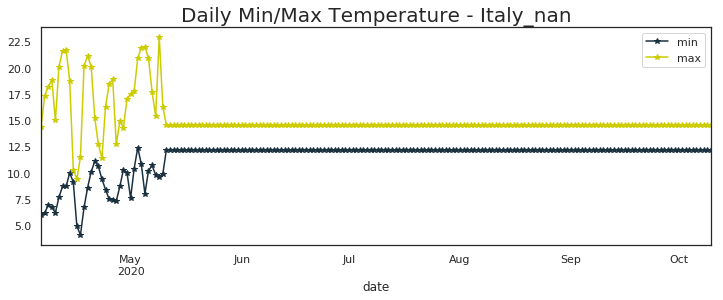

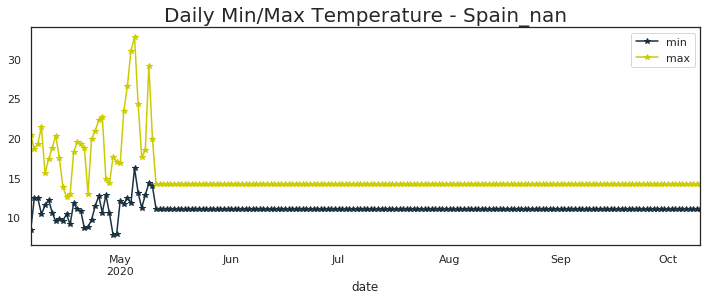

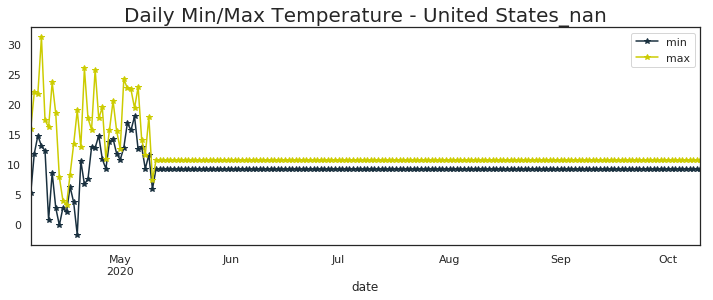

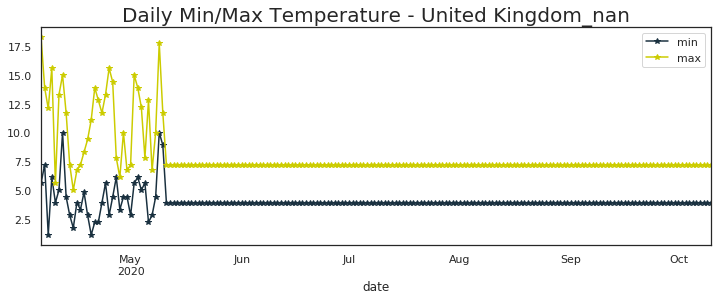

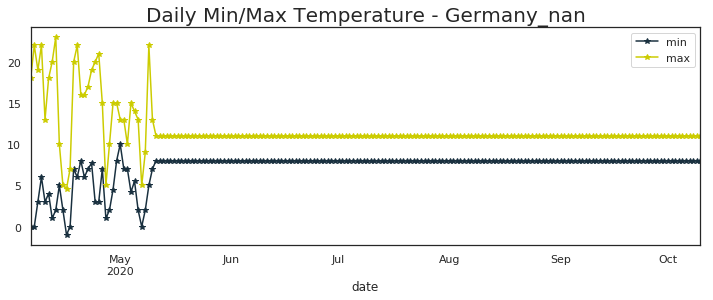

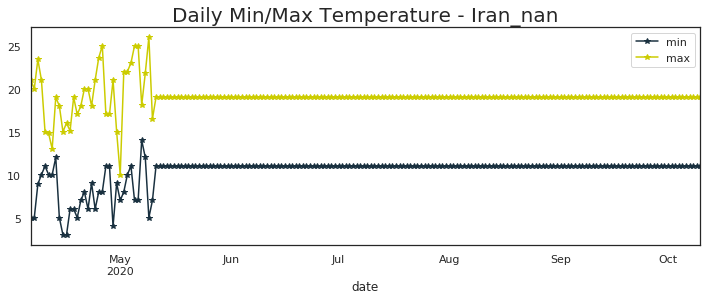

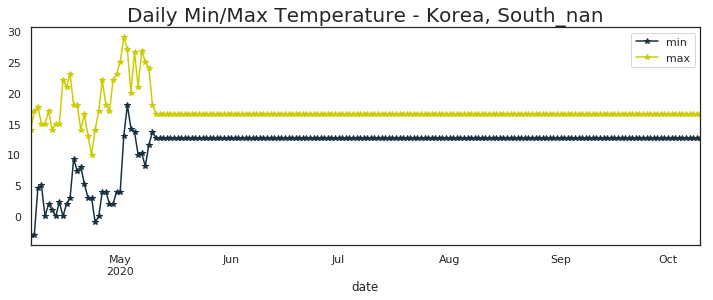

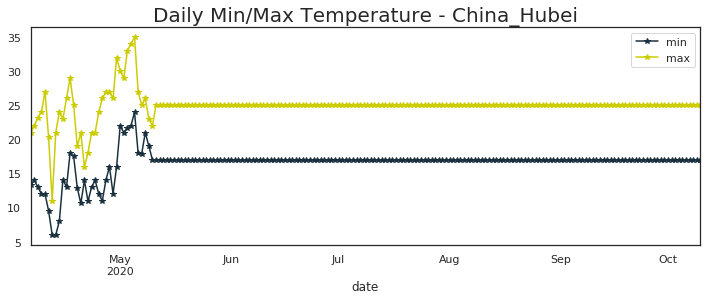

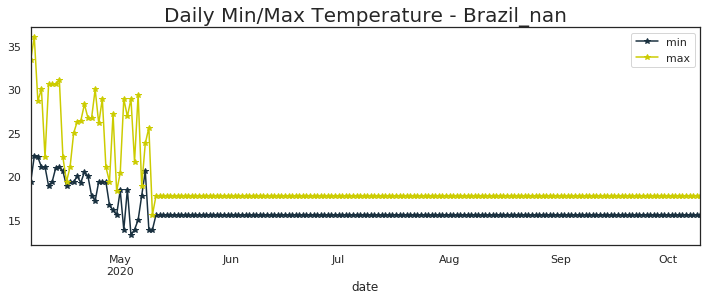

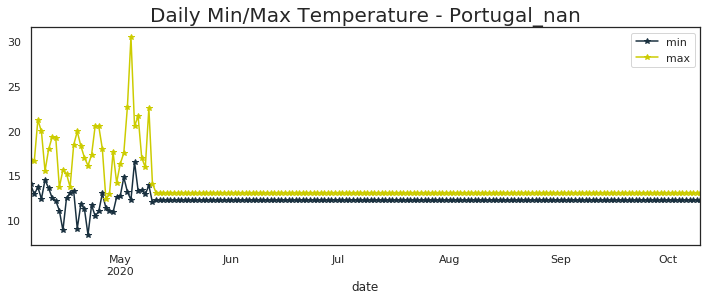

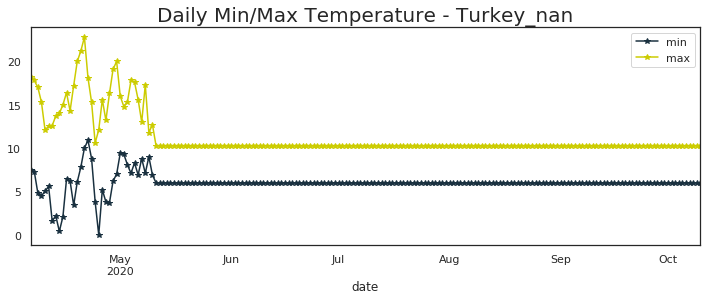

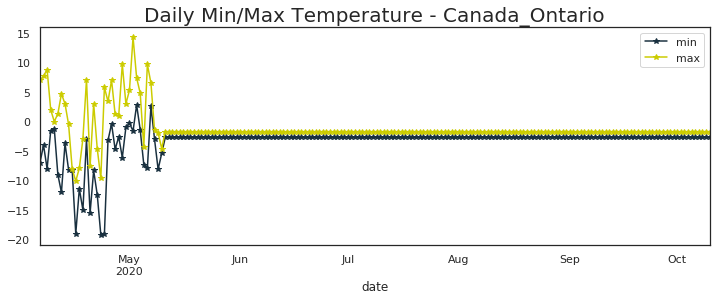

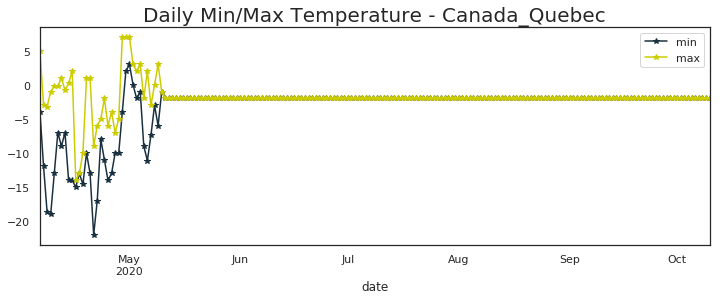

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
India_nan                   30.0  43.0
Brazil_nan                  22.3  36.0
Russia_nan                  13.0  30.0
Colombia_nan                 0.0   0.0
Argentina_nan                0.0   0.0
Spain_nan                   16.2  32.7
Peru_nan                     0.0   0.0
Mexico_nan                   0.0   0.0
France_nan                  14.2  23.8
South Africa_nan             0.0   0.0
United Kingdom_nan          10.0  18.3
Iran_nan                    14.0  26.0
Chile_nan                    0.0   0.0
Iraq_nan                     0.0   0.0
Bangladesh_nan               0.0   0.0
Italy_nan                   12.4  22.9
Saudi Arabia_nan             0.0   0.0
Philippines_nan             27.8  35.0
Turkey_nan                  10.9  22.8
Indonesia_nan                0.0   0.0
Germany_nan                 10.0  23.0
Pakistan_nan                

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

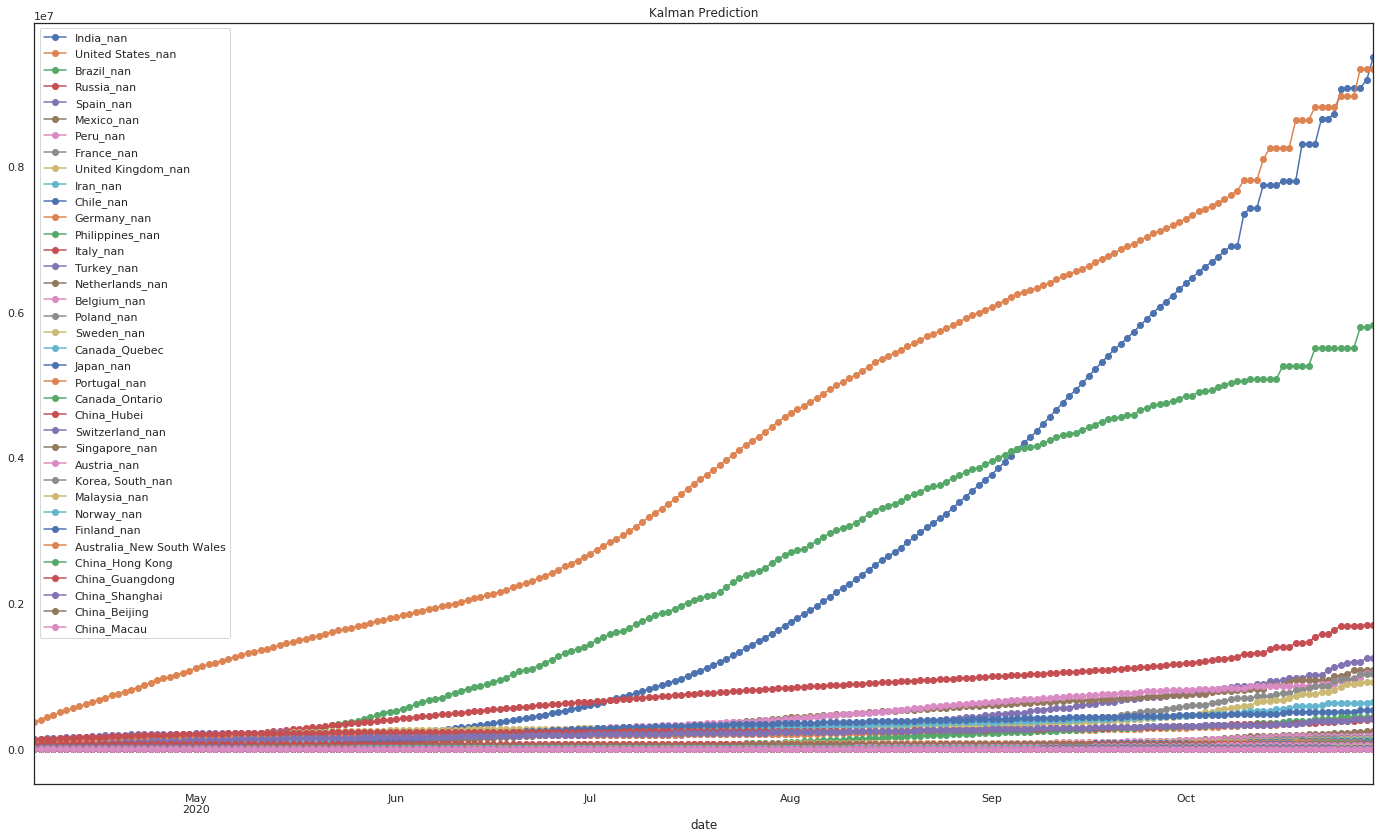

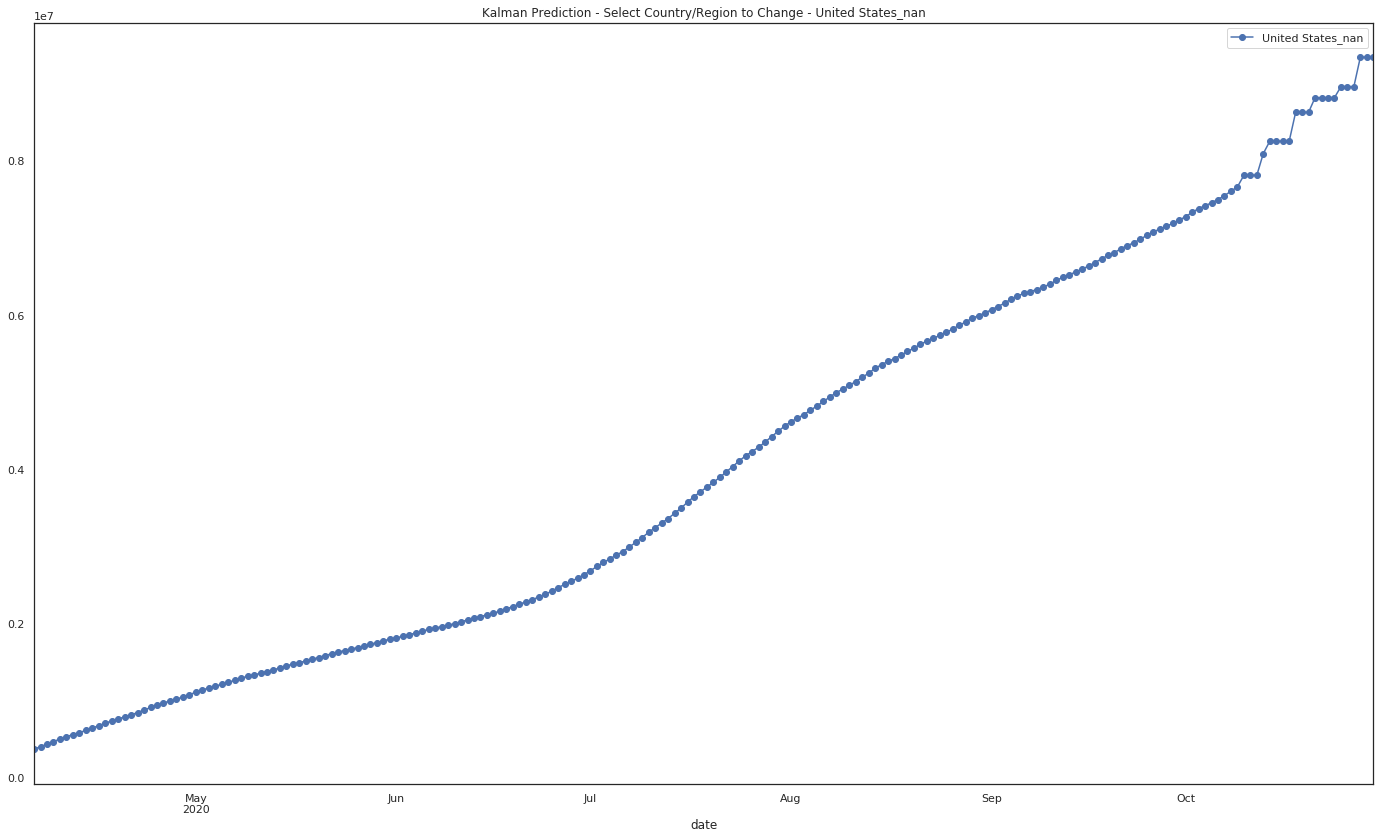

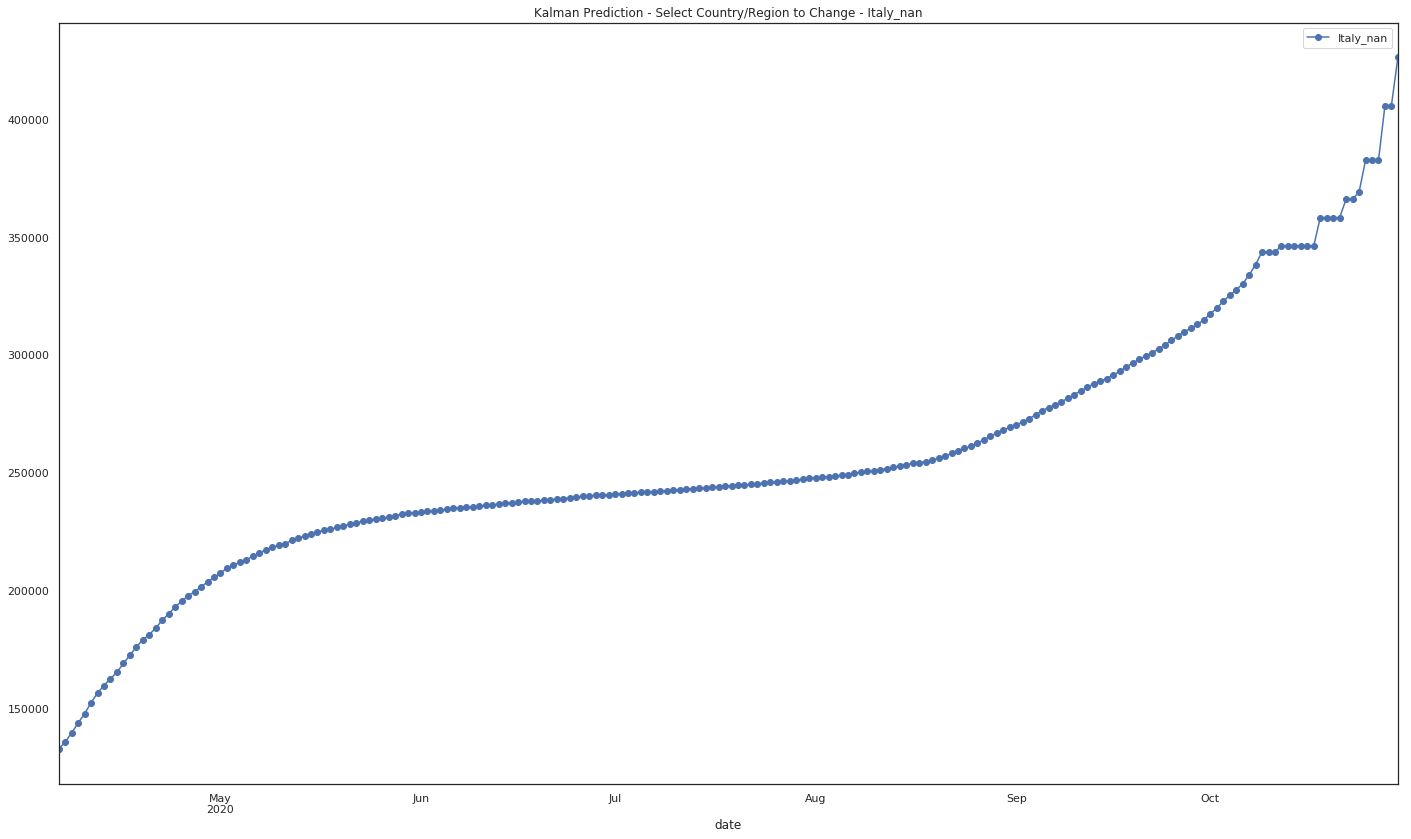

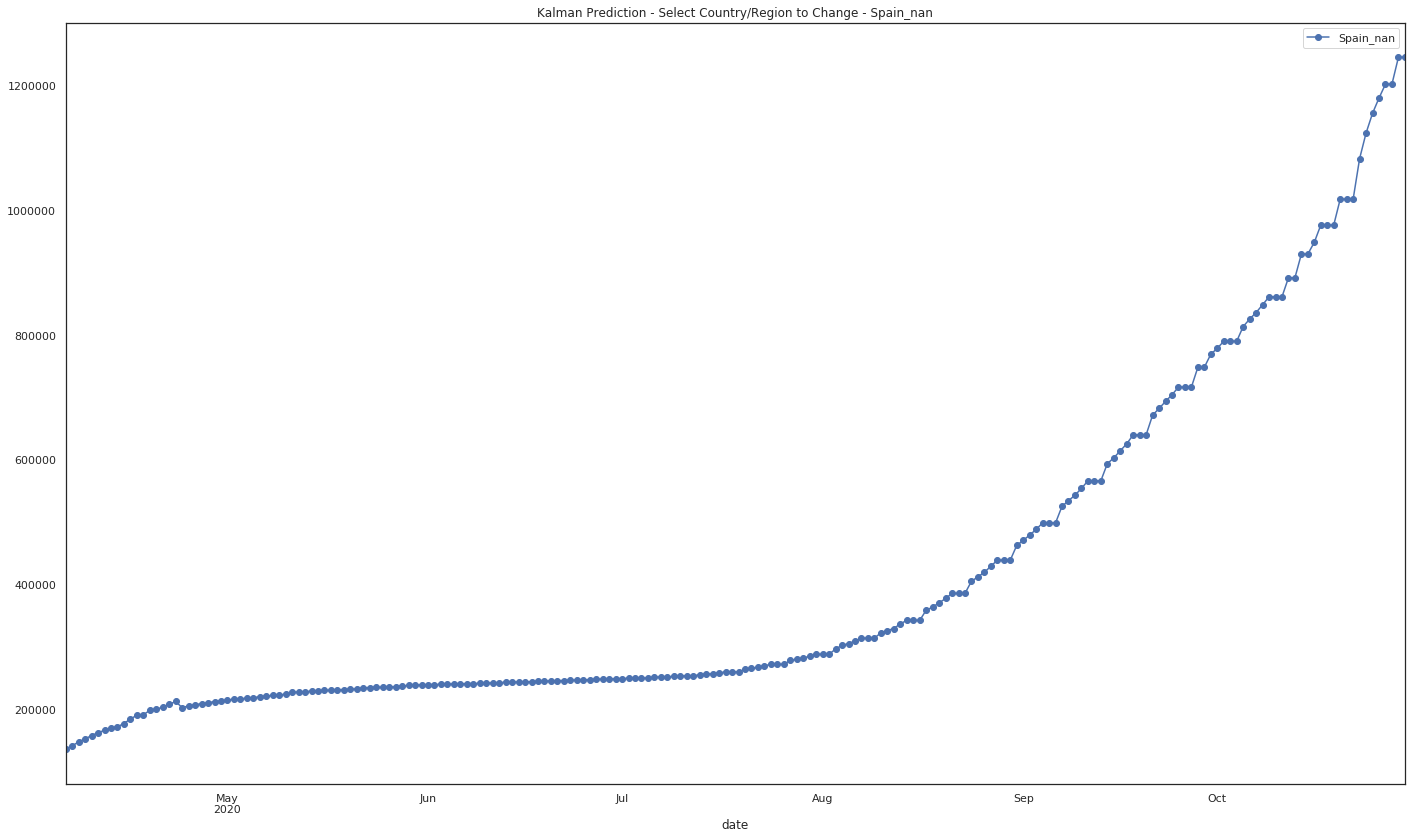

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


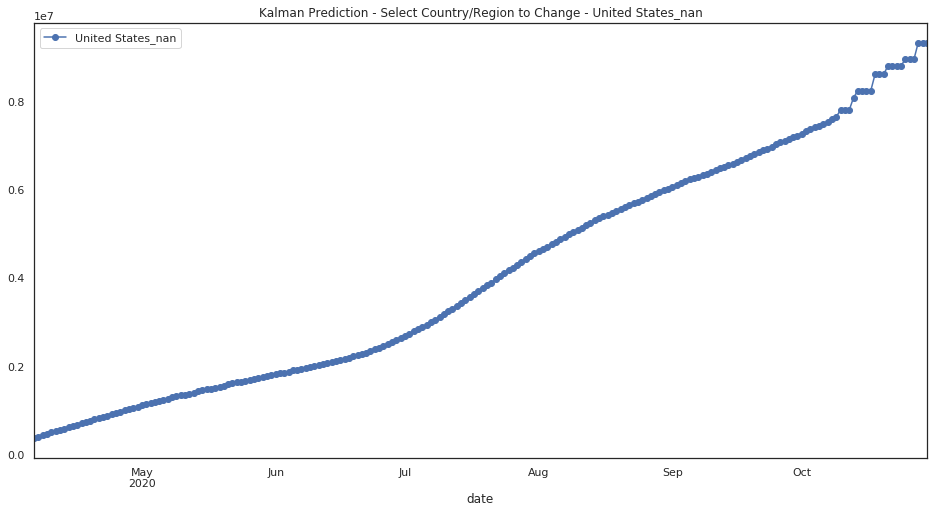

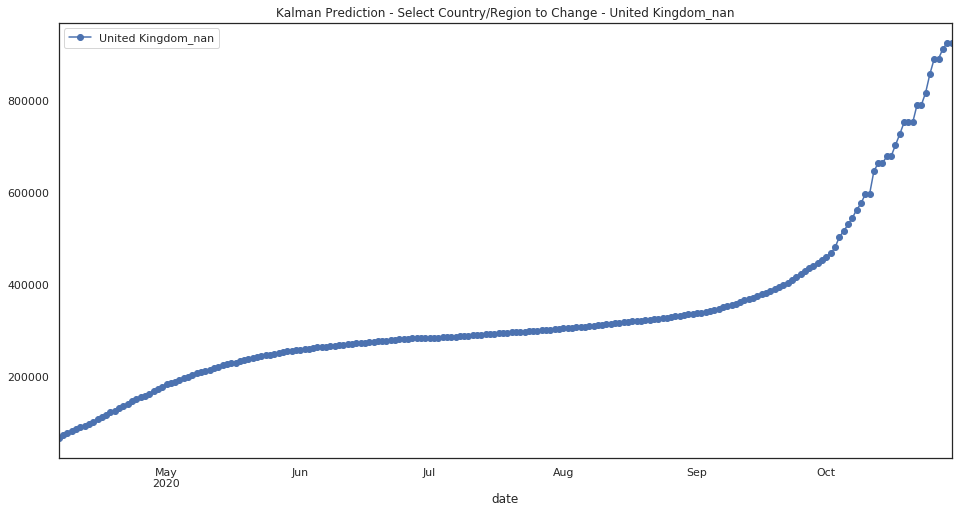

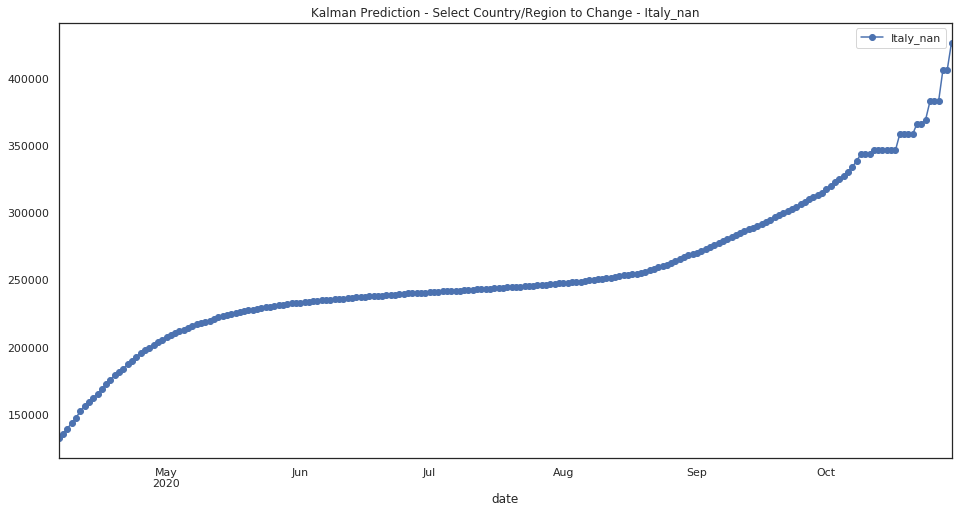

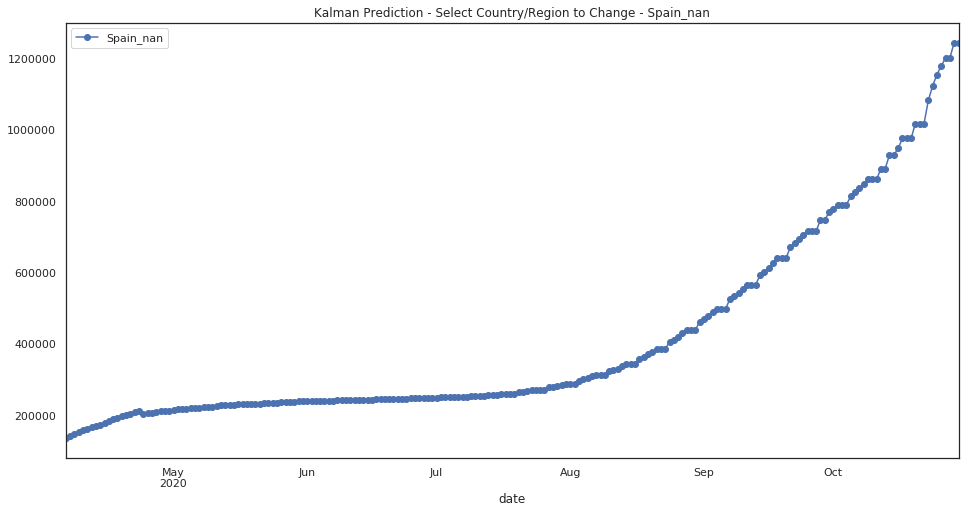

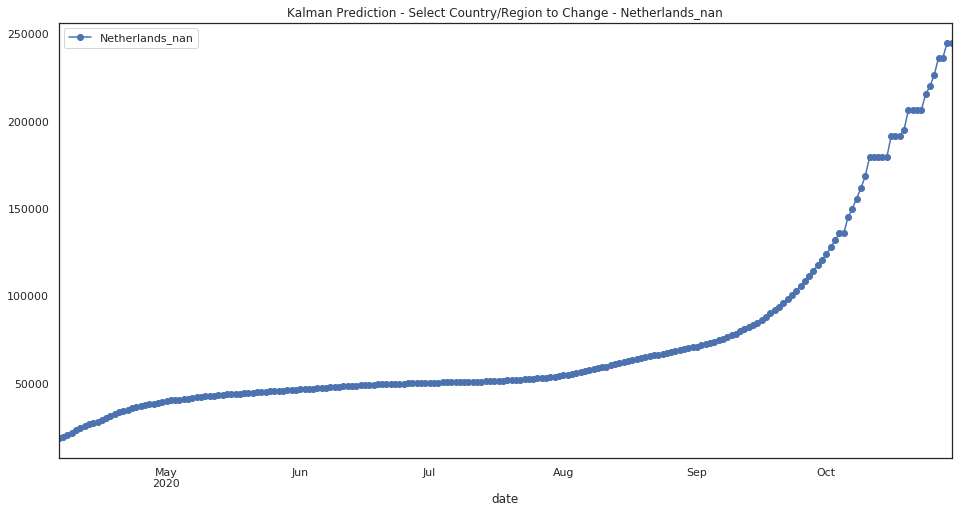

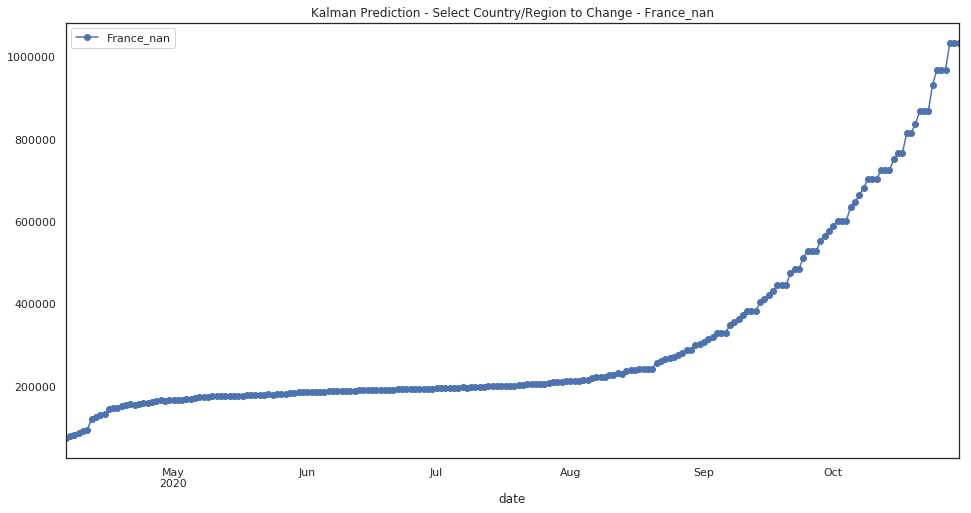

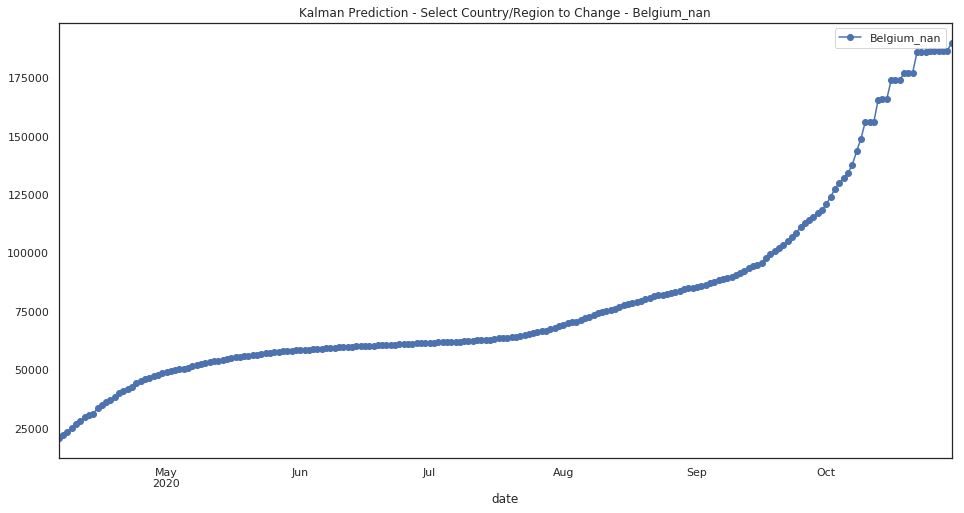

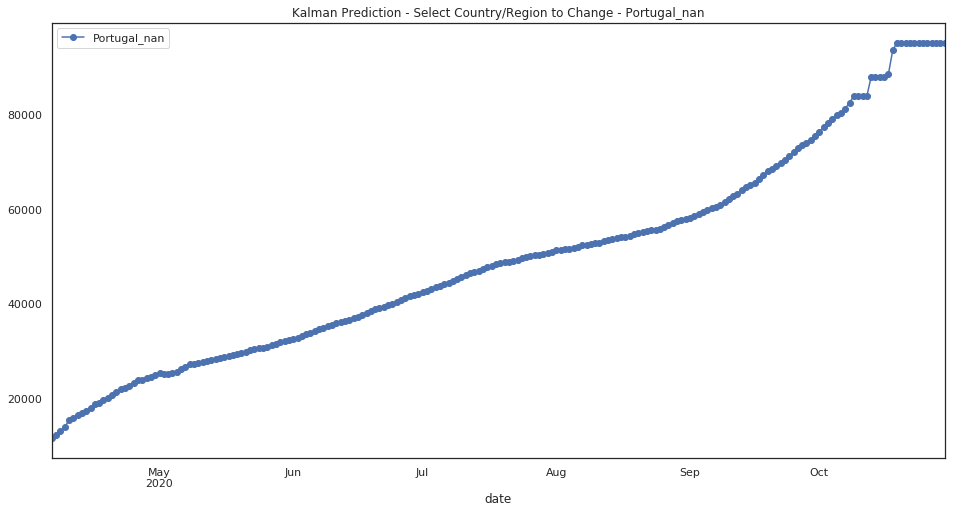

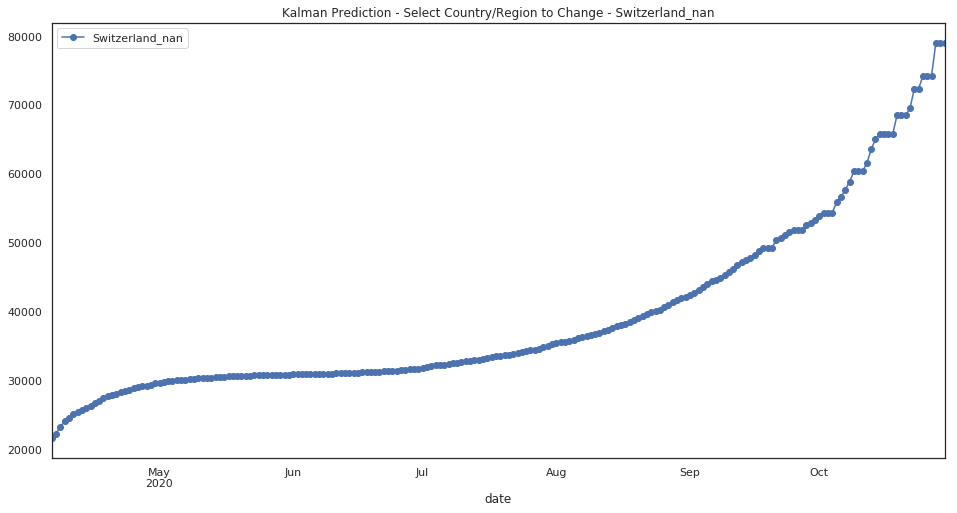

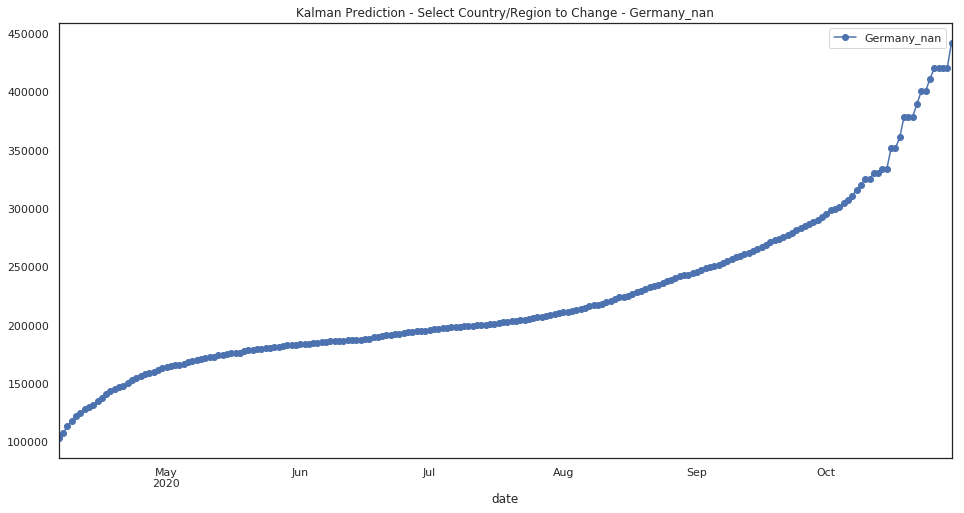

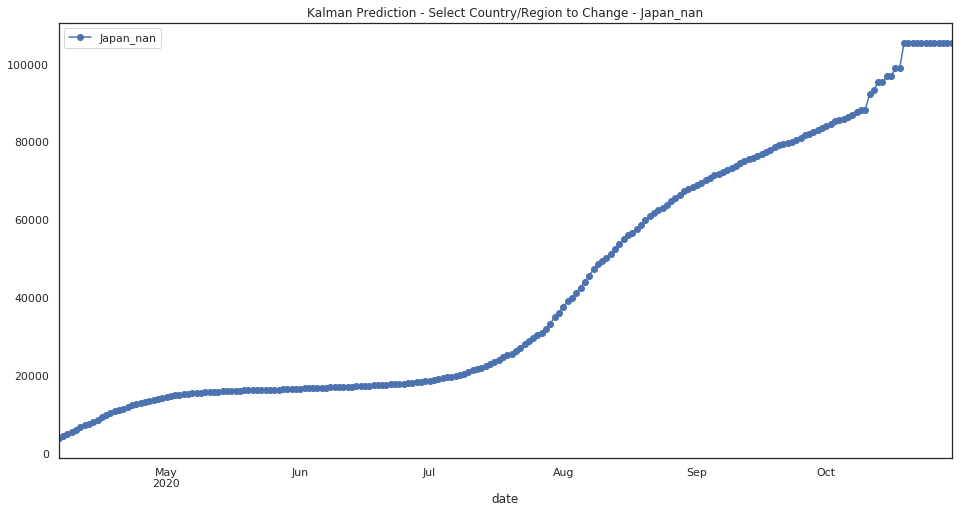

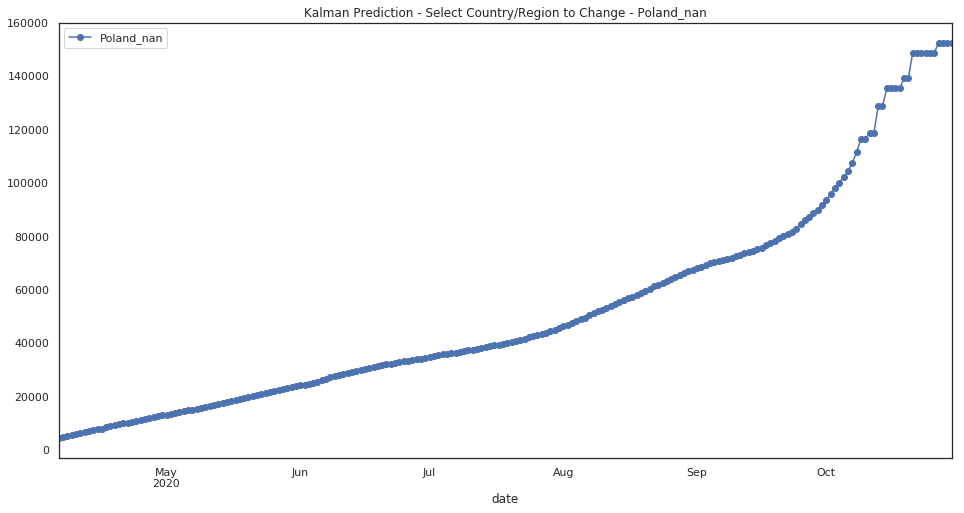

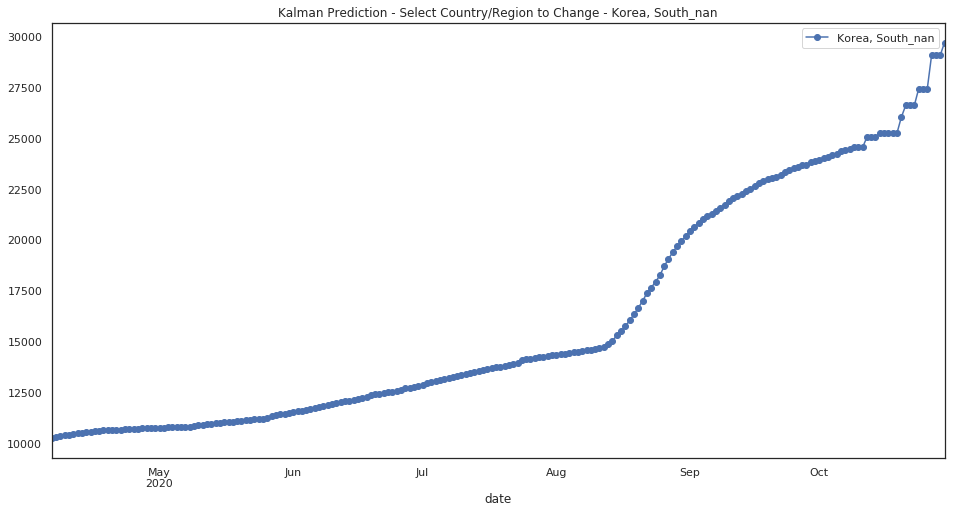

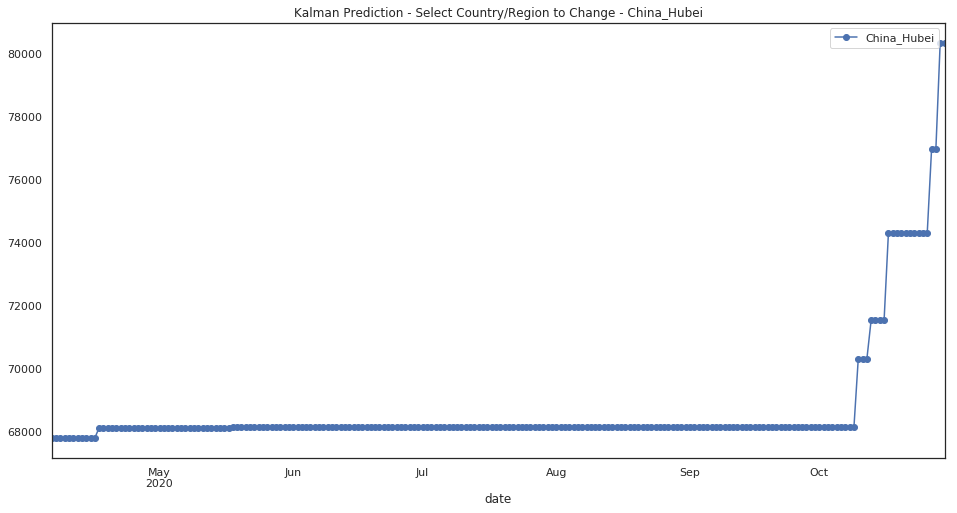

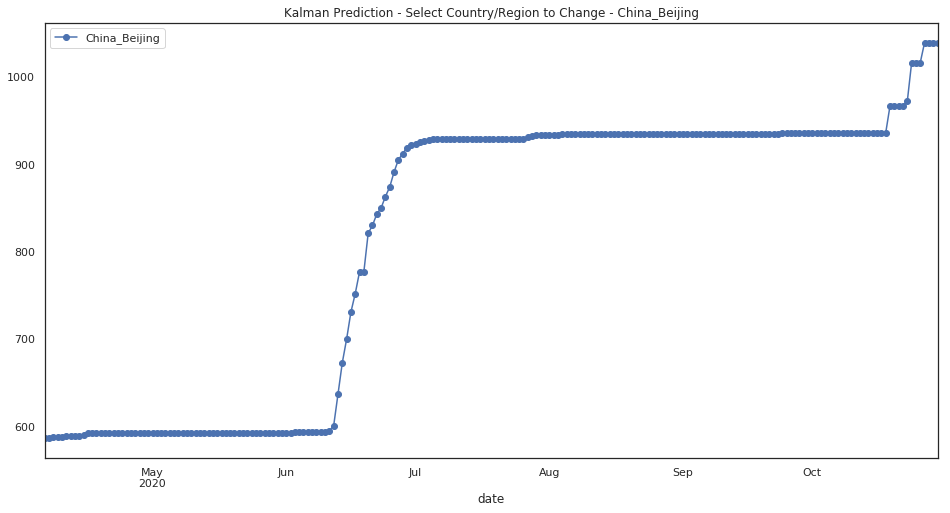

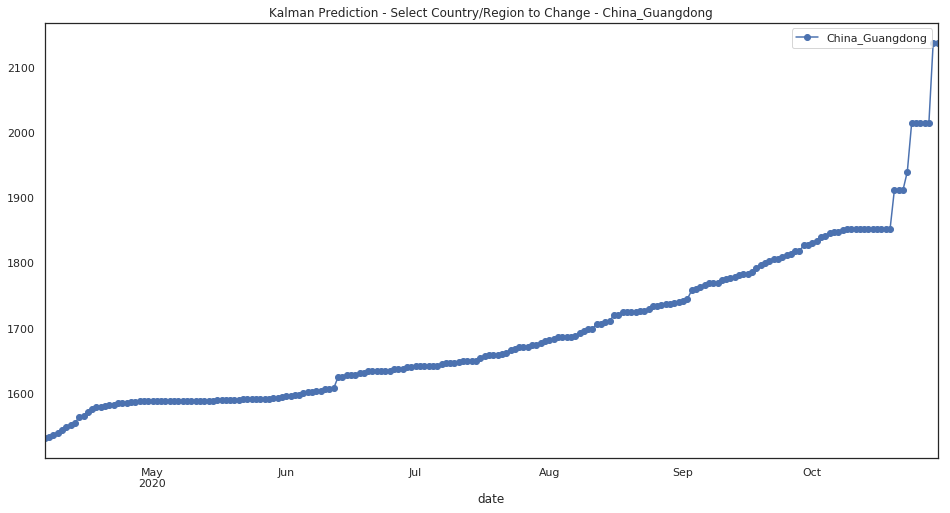

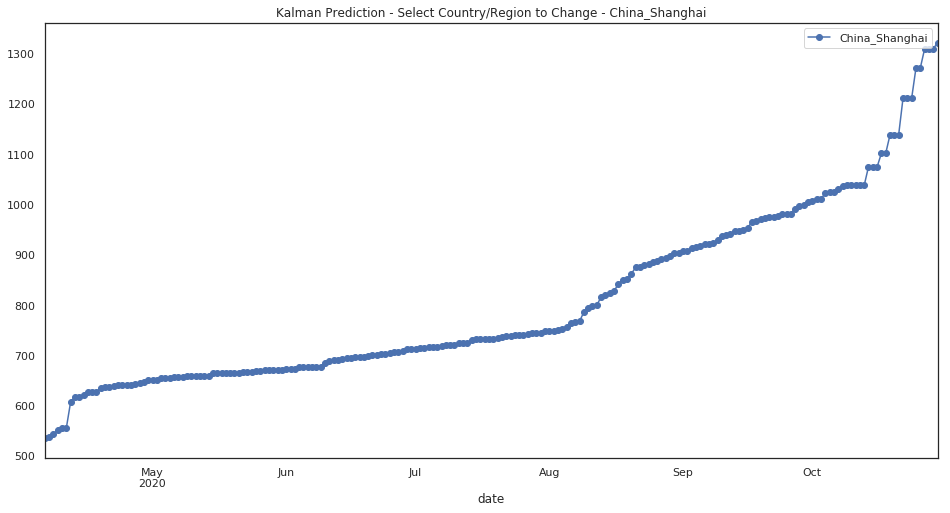

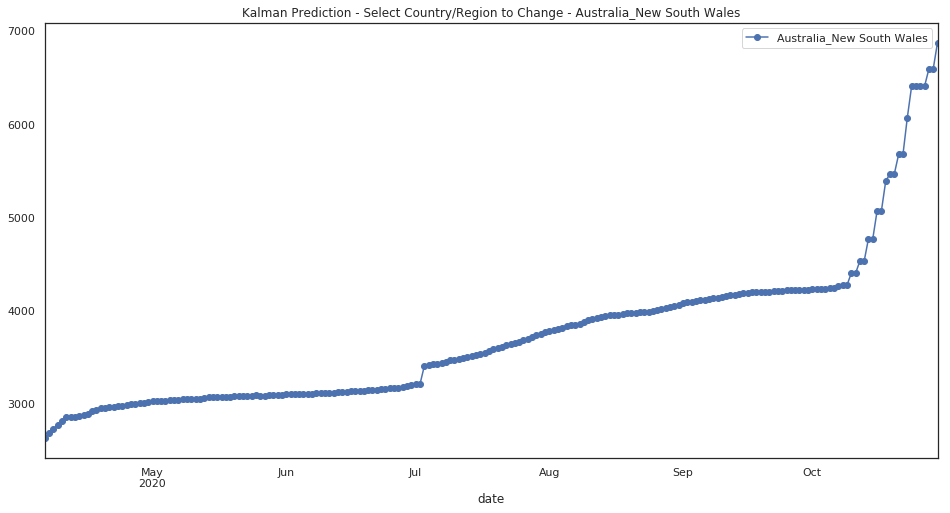

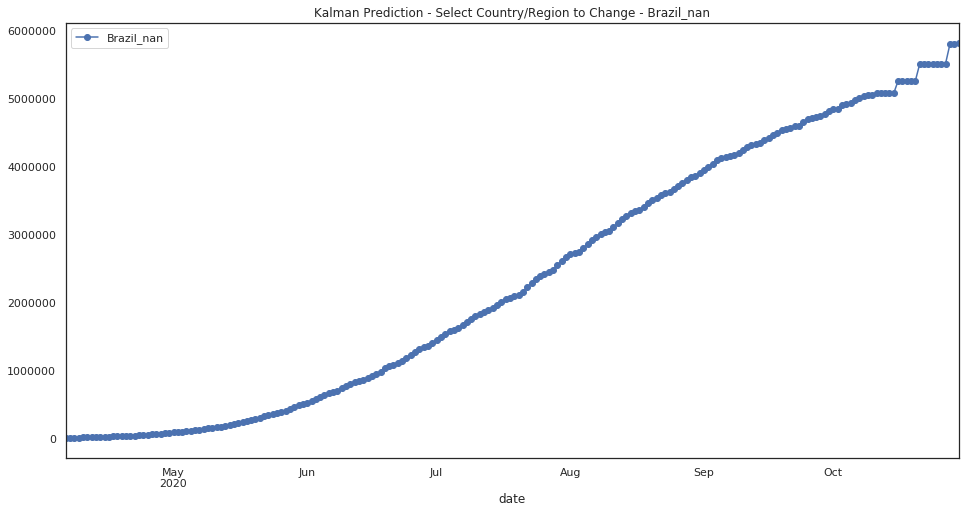

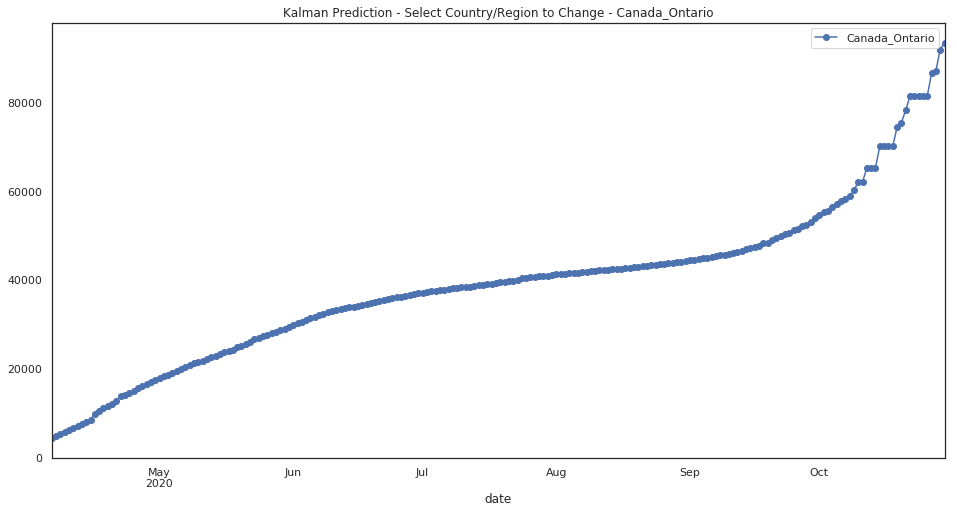

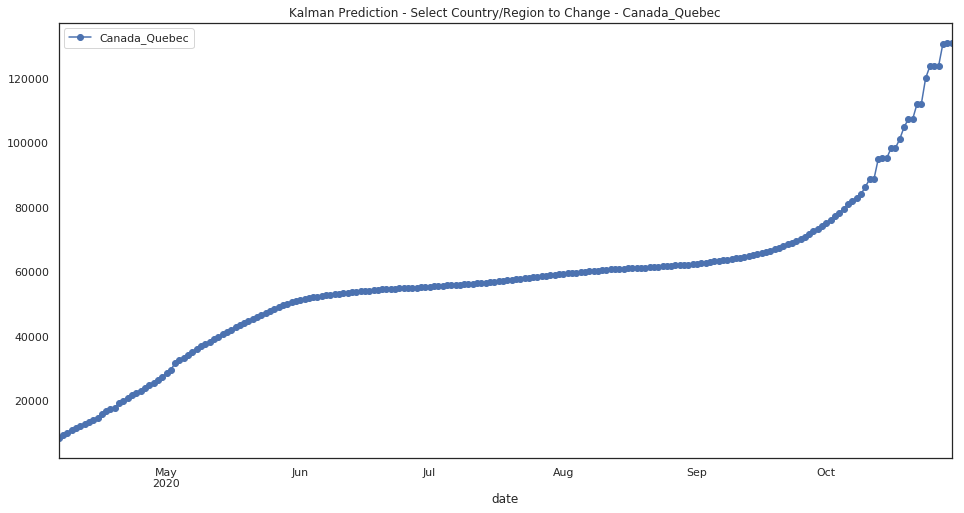

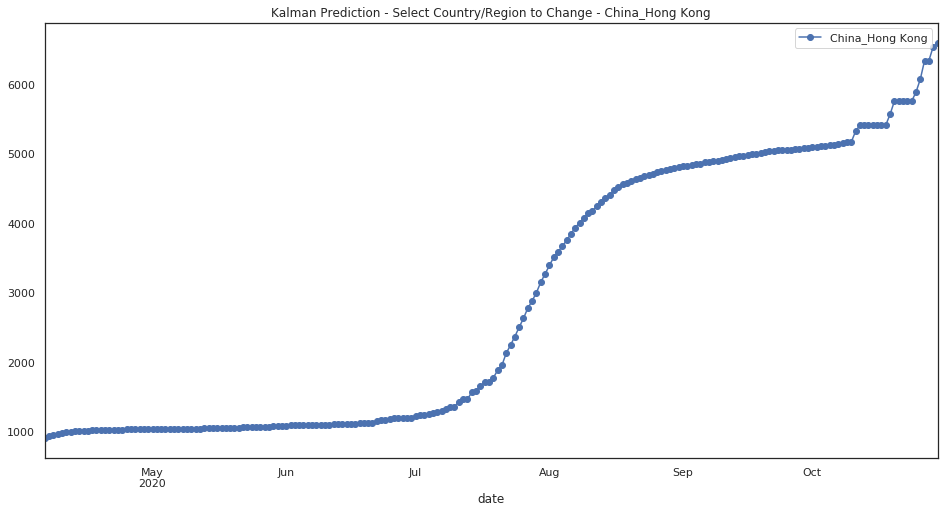

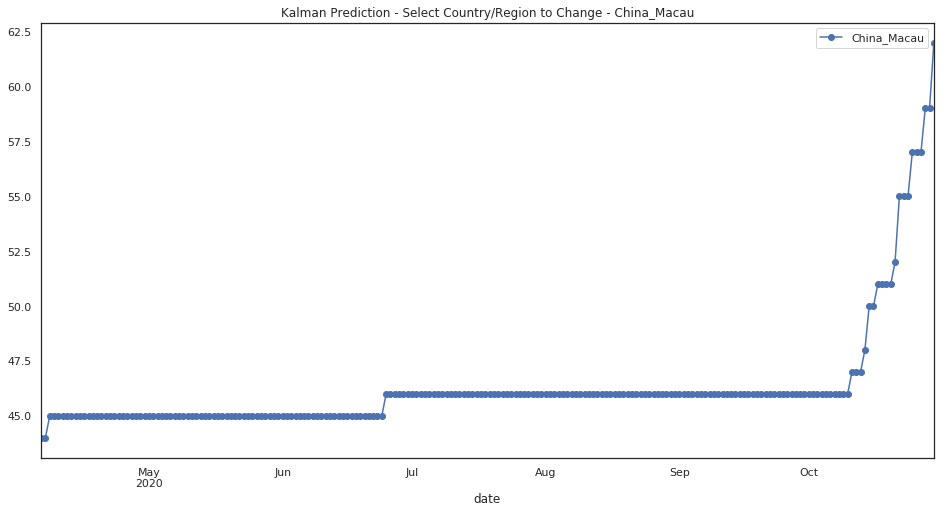

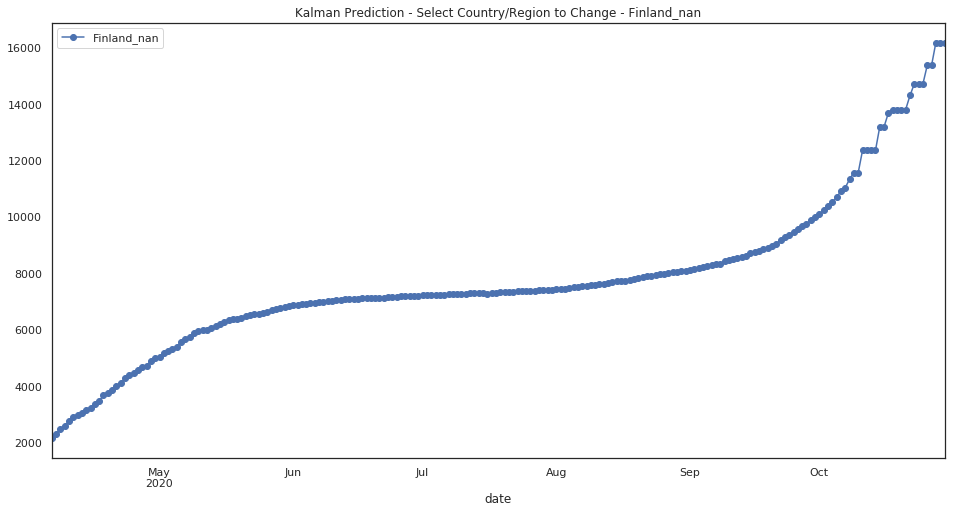

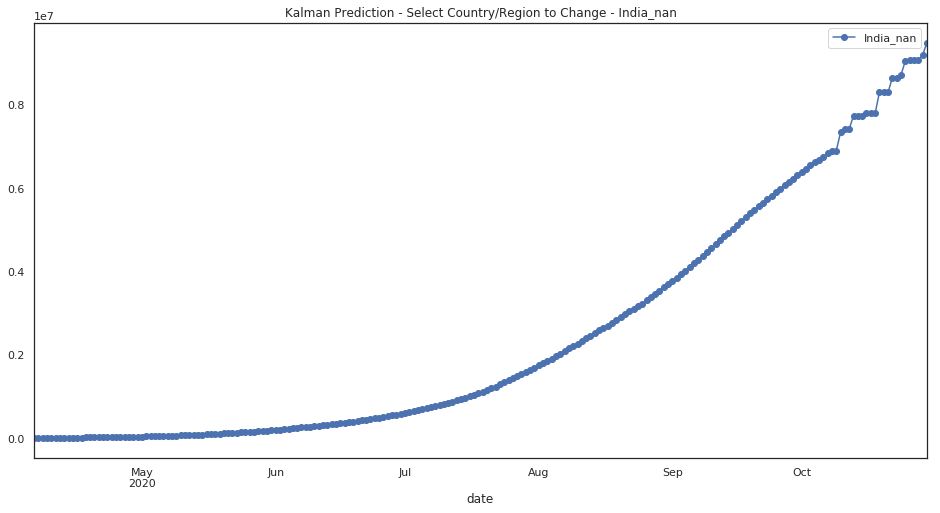

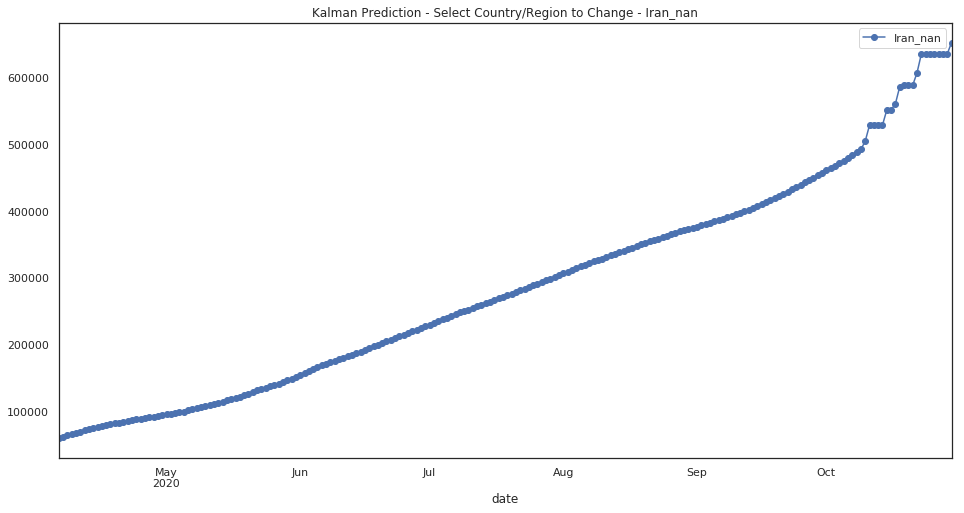

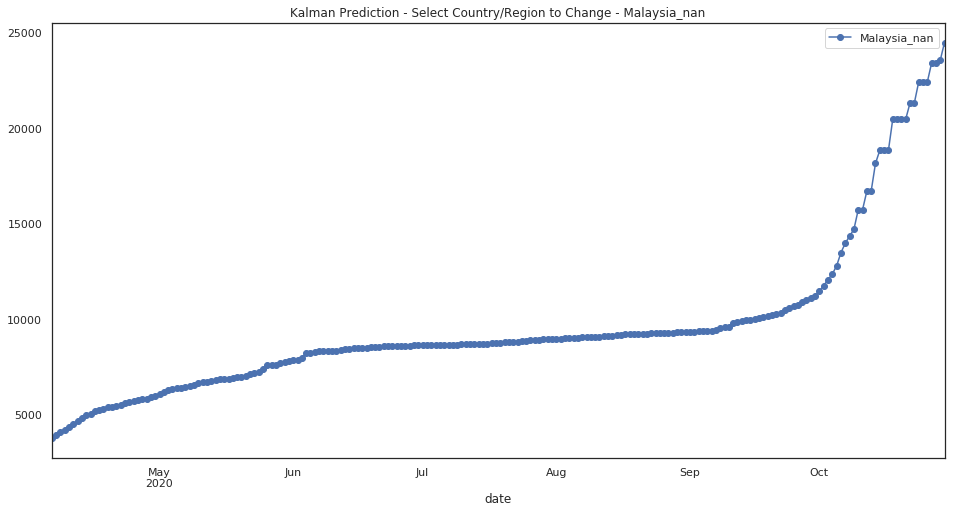

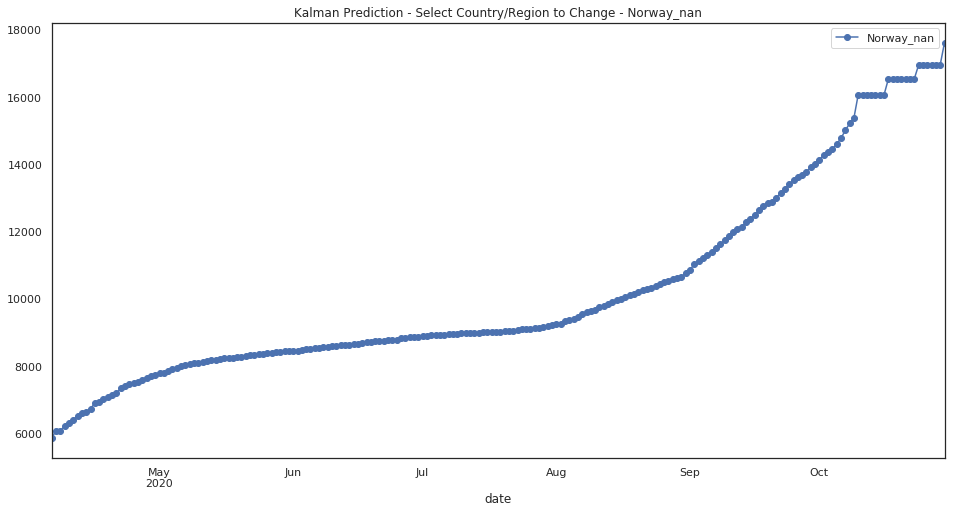

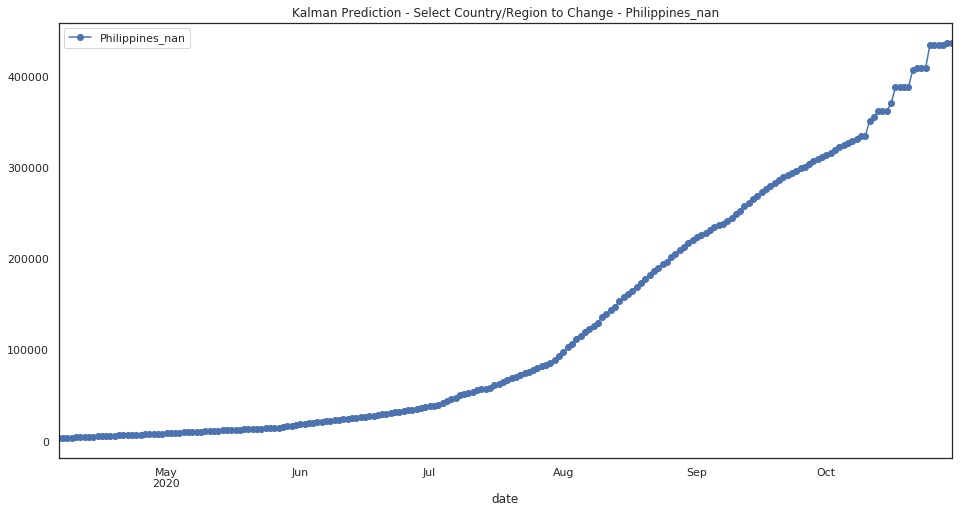

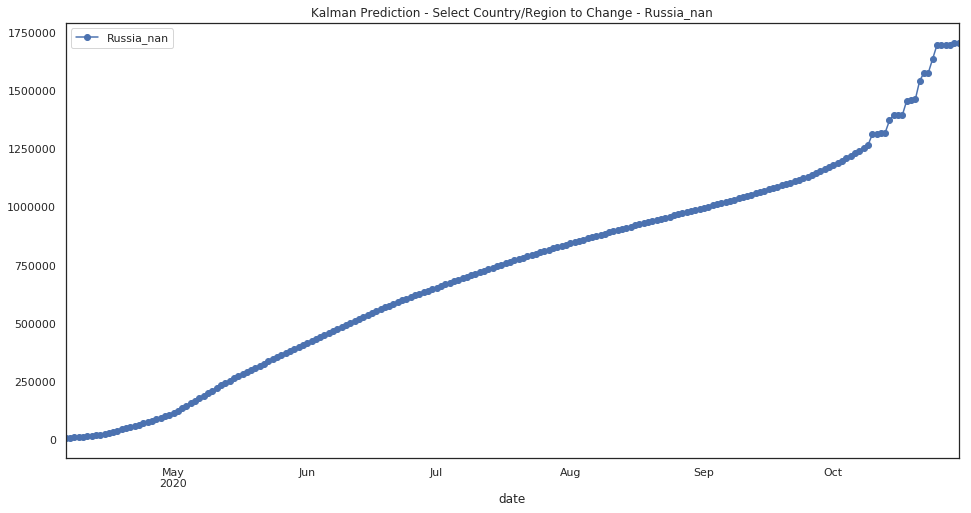

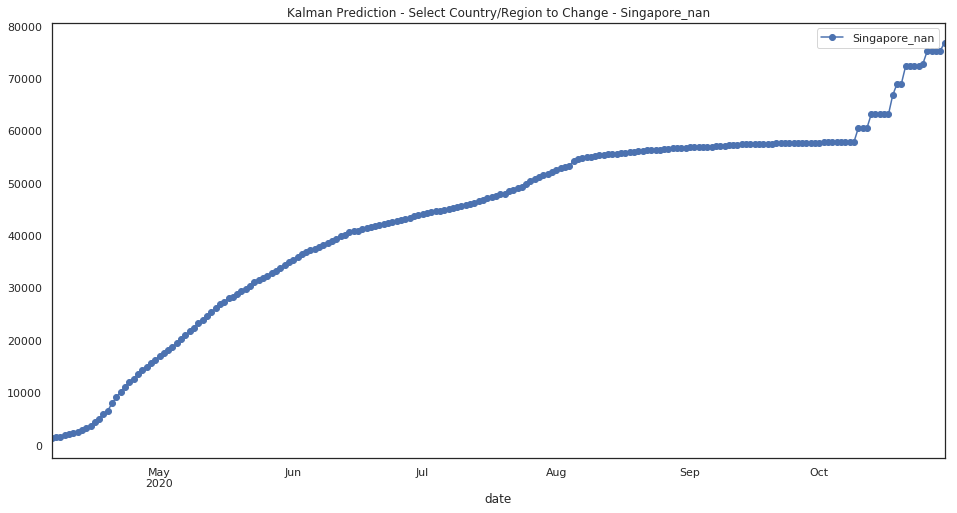

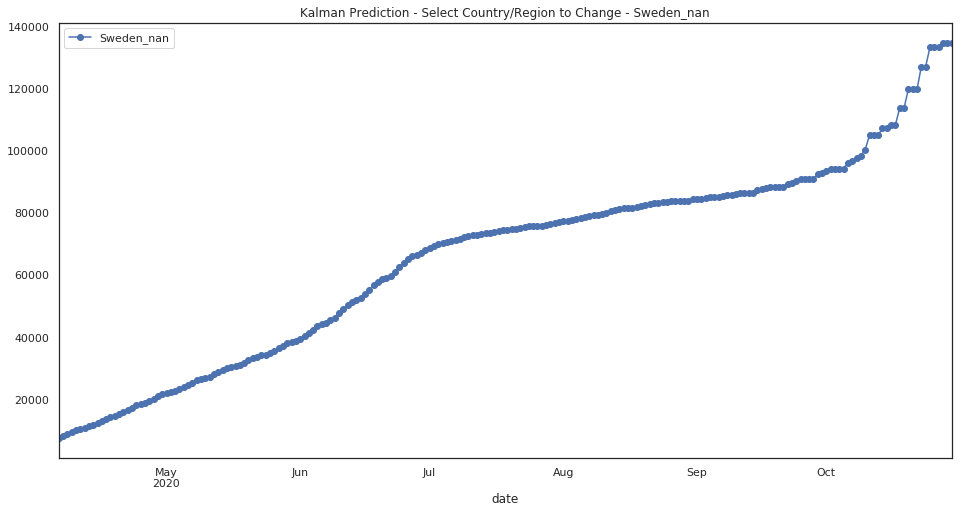

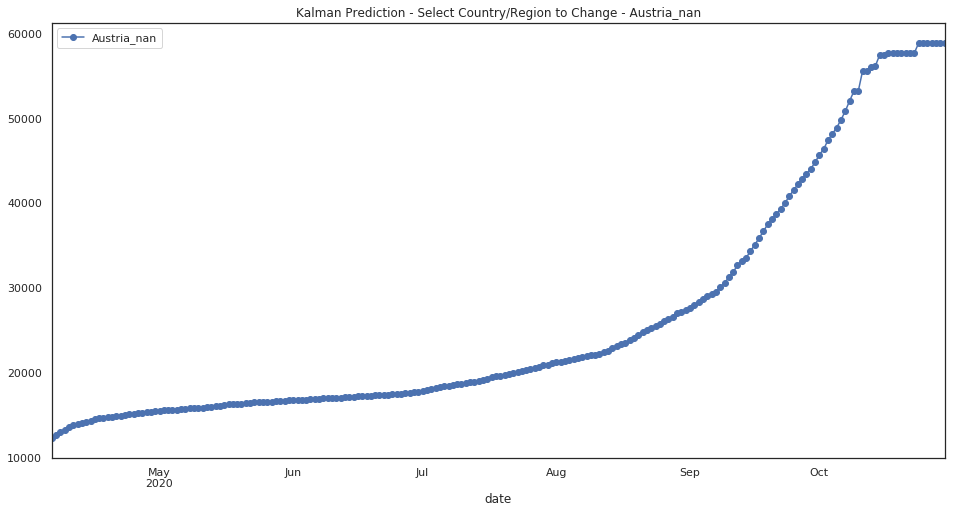

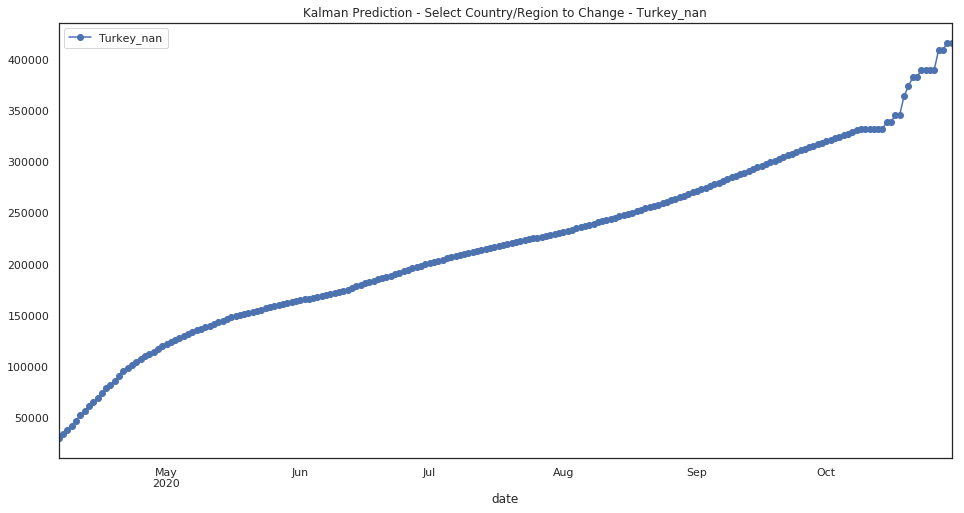

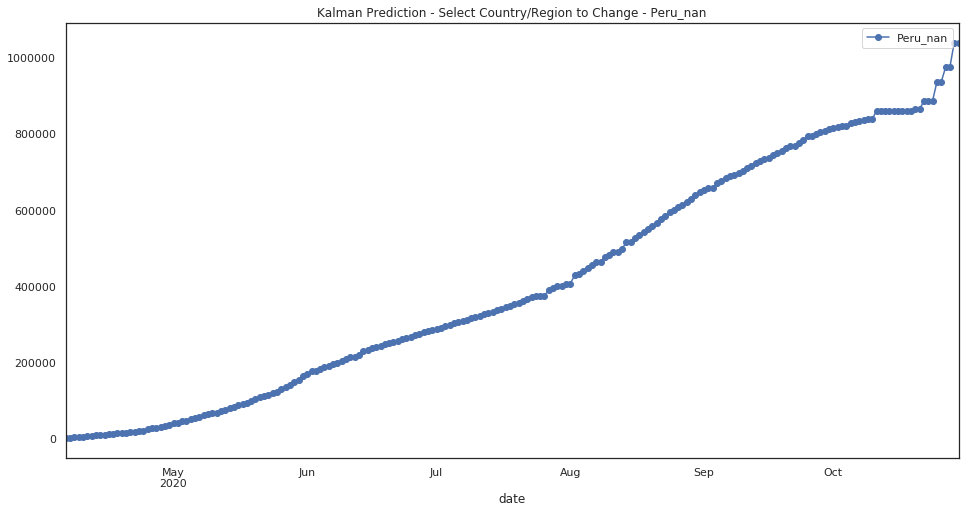

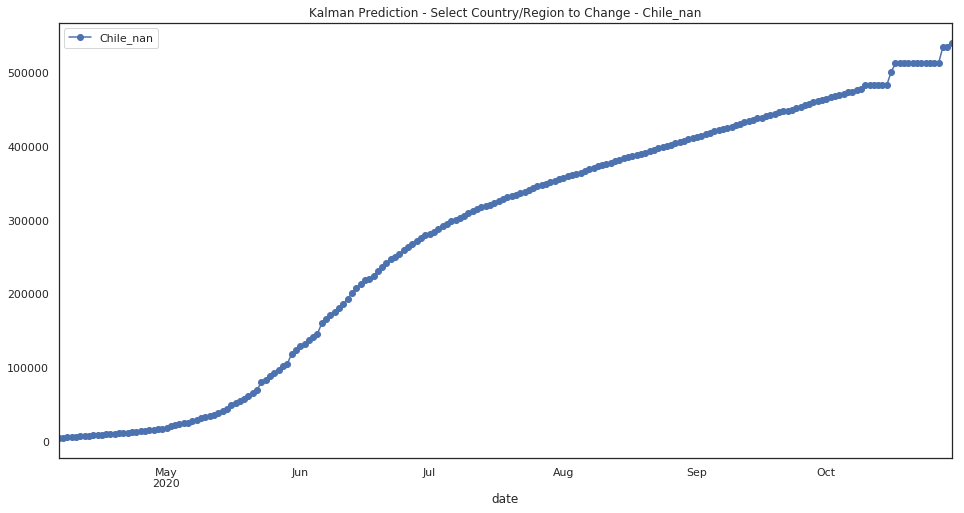

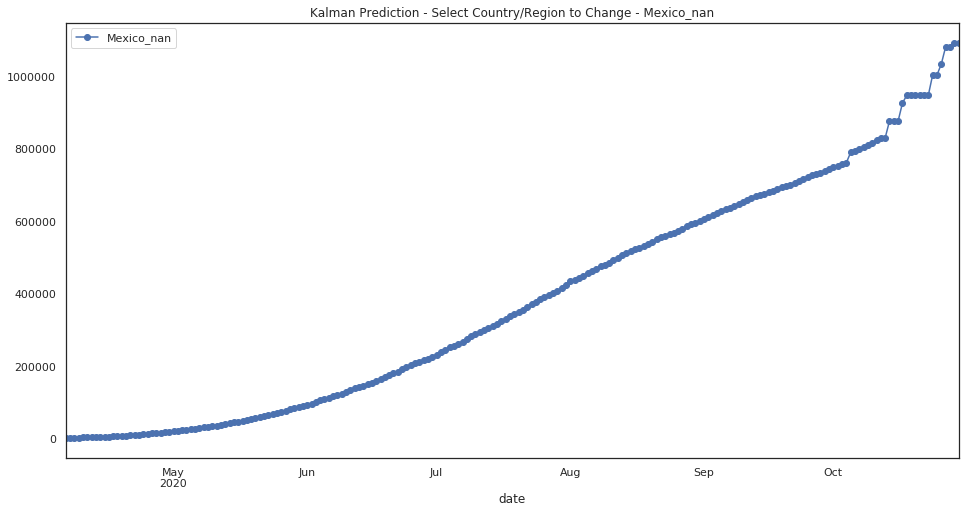

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-10-30 00:00:00
dtype: object


0  pred_confirmed
India_nan                                   NaN       9498756.0
United States_nan                           NaN       9344315.0
Brazil_nan                                  NaN       5819232.0
Russia_nan                                  NaN       1707673.0
Spain_nan                                   NaN       1244829.0
Argentina_nan                               NaN       1135570.0
Mexico_nan                                  NaN       1092787.0
Peru_nan                                    NaN       1039507.0
Colombia_nan                                NaN       1035712.0
France_nan                                  NaN       1034447.0
United Kingdom_nan                          NaN        925433.0
South Africa_nan                            NaN        924832.0
Iran_nan                                    NaN        652354.0
Iraq_nan                                    NaN        603841.0
Chile_nan                                   NaN        540825.0
Bangladesh_nan                              NaN        480287.0
Pakistan_nan                                NaN        468577.0
Germany_nan                                 NaN        442250.0
Philippines_nan                             NaN        437375.0
Italy_nan                                   NaN        426472.0
Turkey_nan                                  NaN        416658.0
Saudi Arabia_nan                            NaN        404254.0
Indonesia_nan                               NaN        385365.0
Ukraine_nan                                 NaN        376592.0
Israel_nan                                  NaN        356861.0
Netherlands_nan                             NaN        245115.0
Romania_nan                                 NaN        241156.0
Ecuador_nan                                 NaN        233324.0
Morocco_nan                                 NaN        209830.0
Bolivia_nan                                 NaN        193388.0
...                                         ...             ...
Antigua and Barbuda_nan                     NaN           126.0
China_Ningxia                               NaN           104.0
France_Saint Barthelemy                     NaN            83.0
United Kingdom_British Virgin Islands       NaN            78.0
Canada_Prince Edward Island                 NaN            76.0
Saint Vincent and the Grenadines_nan        NaN            72.0
China_Macau                                 NaN            62.0
Dominica_nan                                NaN            42.0
Australia_Northern Territory                NaN            41.0
Fiji_nan                                    NaN            40.0
Timor-Leste_nan                             NaN            39.0
France_New Caledonia                        NaN            36.0
Grenada_nan                                 NaN            34.0
Saint Lucia_nan                             NaN            34.0
Laos_nan                                    NaN            29.0
Saint Kitts and Nevis_nan                   NaN            28.0
China_Qinghai                               NaN            23.0
France_Saint Pierre and Miquelon            NaN            21.0
United Kingdom_Falkland Islands (Malvinas)  NaN            20.0
Canada_Yukon                                NaN            19.0
Denmark_Greenland                           NaN            18.0
United Kingdom_Montserrat                   NaN            14.0
Canada_Grand Princess                       NaN            13.0
Holy See_nan                                NaN            13.0
Western Sahara_nan                          NaN            10.0
MS Zaandam_nan                              NaN             9.0
Canada_Northwest Territories                NaN             5.0
United Kingdom_Anguilla                     NaN             3.0
China_Tibet                                 NaN             1.0
Canada_Diamond Princess                     NaN             1.0

[266 rows x 2 columns]

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-06           1538.0       1546.0       2457.0       1675.0   
2020-04-07           1586.0       1552.0       2497.0       1693.0   
2020-04-08            423.0        383.0       1468.0        545.0   
2020-04-09            444.0        400.0       1572.0        564.0   
2020-04-10            484.0        409.0       1677.0        583.0   
2020-04-11            521.0        416.0       1761.0        601.0   
2020-04-12            555.0        433.0       1842.0        611.0   
2020-04-13            607.0        446.0       1914.0        638.0   
2020-04-14            675.0        467.0       2060.0        694.0   
2020-04-15            759.0        499.0       2149.0        701.0   
2020-04-16            799.0        498.0       2255.0        700.0   
2020-04-17            886.0        518.0       2400.0        738.0   
2020-04-18            914.0        539.0       2522.0        717.0   
2020-04-19           1006.0        570.0       2621.0        748.0   
2020-04-20           1008.0        580.0       2710.0        750.0   
2020-04-21           1092.0        590.0       2802.0        756.0   
2020-04-22           1149.0        615.0       2901.0        765.0   
2020-04-23           1242.0        646.0       3000.0        758.0   
2020-04-24           1316.0        663.0       3117.0        772.0   
2020-04-25           1443.0        711.0       3248.0        769.0   
2020-04-26           1506.0        712.0       3377.0        772.0   
2020-04-27           1682.0        741.0       3510.0        784.0   
2020-04-28           1790.0        758.0       3644.0        779.0   
2020-04-29           1923.0        766.0       3833.0        784.0   
2020-04-30           2144.0        772.0       4010.0        786.0   
2020-05-01           2308.0        790.0       4149.0        784.0   
2020-05-02           2459.0        794.0       4288.0        787.0   
2020-05-03           2682.0        800.0       4462.0        786.0   
2020-05-04           2884.0        809.0       4647.0        789.0   
2020-05-05           3195.0        822.0       4832.0        789.0   
...                     ...          ...          ...          ...   
2020-10-02          39291.0      13994.0      51847.0       2194.0   
2020-10-03          39292.0      14145.0      51995.0       2202.0   
2020-10-04          39333.0      14289.0      52133.0       2204.0   
2020-10-05          39429.0      14431.0      52265.0       2431.0   
2020-10-06          39510.0      14585.0      52392.0       2467.0   
2020-10-07          39558.0      14752.0      52513.0       2644.0   
2020-10-08          39621.0      14921.0      52647.0       2684.0   
2020-10-09          39699.0      15090.0      52803.0       2787.0   
2020-10-10          41203.0      15110.0      52826.0       2880.0   
2020-10-11          42241.0      15066.0      52804.0       2969.0   
2020-10-12          42658.0      15764.0      52804.0       3186.0   
2020-10-13          43699.0      16256.0      54443.0       3244.0   
2020-10-14          43044.0      15889.0      57383.0       3247.0   
2020-10-15          43225.0      16059.0      57496.0       3514.0   
2020-10-16          43225.0      16611.0      56689.0       3715.0   
2020-10-17          43225.0      17042.0      57110.0       3708.0   
2020-10-18          44852.0      17046.0      57110.0       3894.0   
2020-10-19          46091.0      17513.0      57110.0       3991.0   
2020-10-20          45184.0      18306.0      57110.0       4022.0   
2020-10-21          45184.0      18109.0      57110.0       4060.0   
2020-10-22          45184.0      18036.0      57438.0       4235.0   
2020-10-23          45620.0      18036.0      57697.0       4557.0   
2020-10-24          46000.0      18036.0      57515.0       4643.0   
2020-10-25          45783.0      18036.0      57515.0       4873.0   
2020-10-26

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['India_nan',
 'United States_nan',
 'Brazil_nan',
 'Russia_nan',
 'Spain_nan',
 'Argentina_nan',
 'Mexico_nan',
 'Peru_nan',
 'Colombia_nan',
 'France_nan',
 'United Kingdom_nan',
 'South Africa_nan',
 'Iran_nan',
 'Iraq_nan',
 'Chile_nan',
 'Bangladesh_nan',
 'Pakistan_nan',
 'Germany_nan',
 'Philippines_nan',
 'Italy_nan',
 'Turkey_nan',
 'Saudi Arabia_nan',
 'Indonesia_nan',
 'Ukraine_nan',
 'Israel_nan',
 'Netherlands_nan',
 'Romania_nan',
 'Ecuador_nan',
 'Morocco_nan',
 'Bolivia_nan',
 'Belgium_nan',
 'Czechia_nan',
 'Oman_nan',
 'Dominican Republic_nan',
 'Kuwait_nan',
 'Poland_nan',
 'United Arab Emirates_nan',
 'Qatar_nan',
 'Nepal_nan',
 'Sweden_nan',
 'Kazakhstan_nan',
 'Canada_Quebec',
 'Egypt_nan',
 'Costa Rica_nan',
 'Panama_nan',
 'Belarus_nan',
 'Guatemala_nan',
 'Venezuela_nan',
 'Japan_nan',
 'Honduras_nan',
 'Portugal_nan',
 'Bahrain_nan',
 'Canada_Ontario',
 'Ethiopia_nan',
 'Moldova_nan',
 'China_Hubei',
 'Switzerland_nan',
 'Singapore_nan',
 'Lebanon_nan',
 'Uzbe

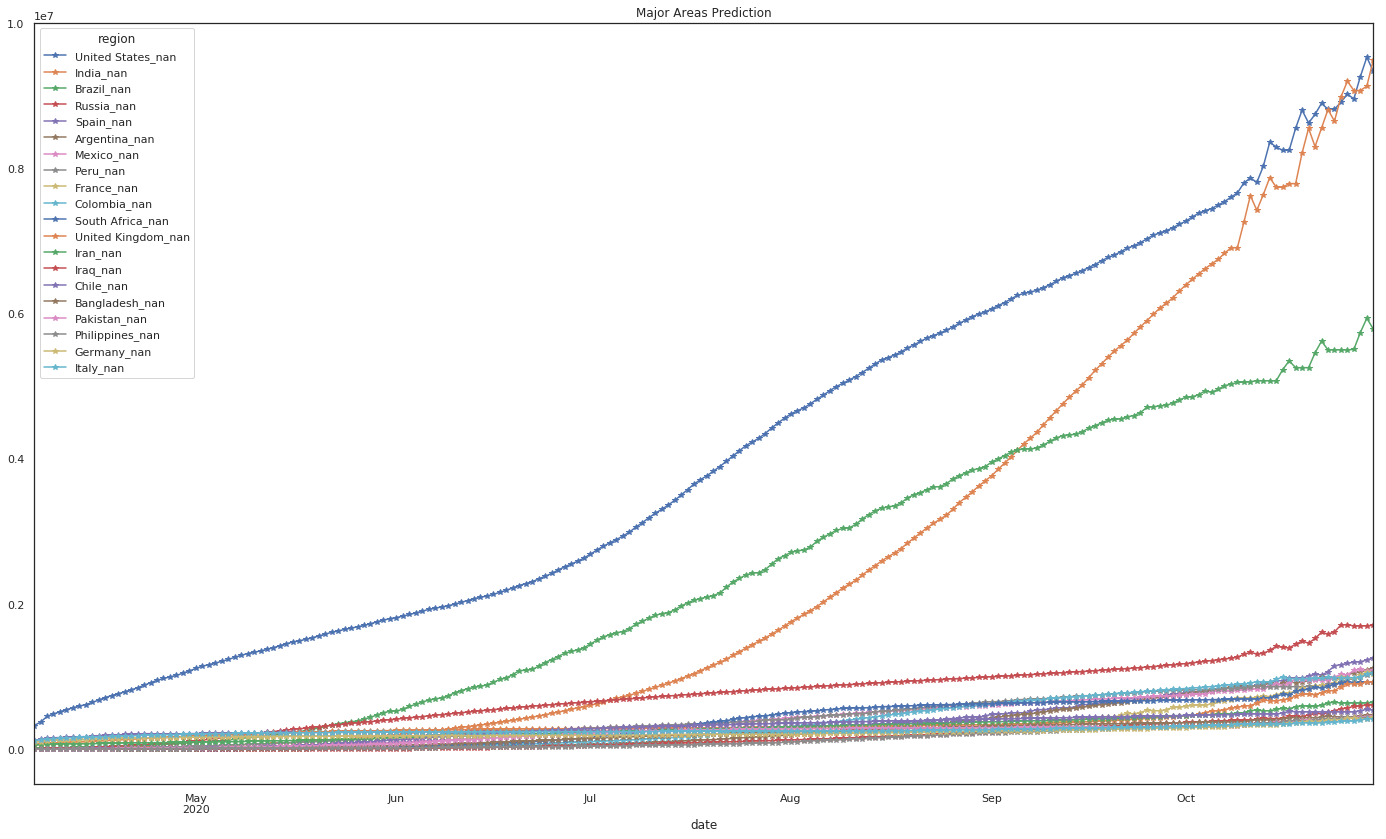

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

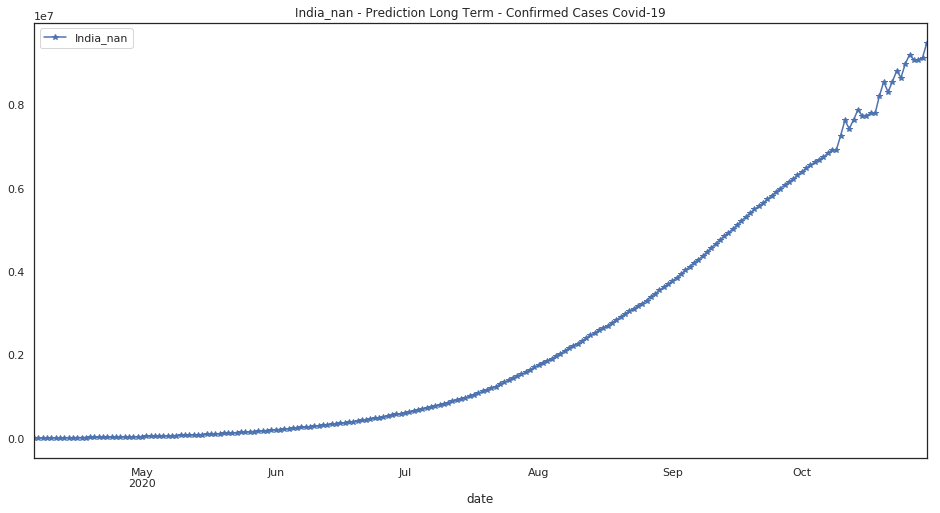

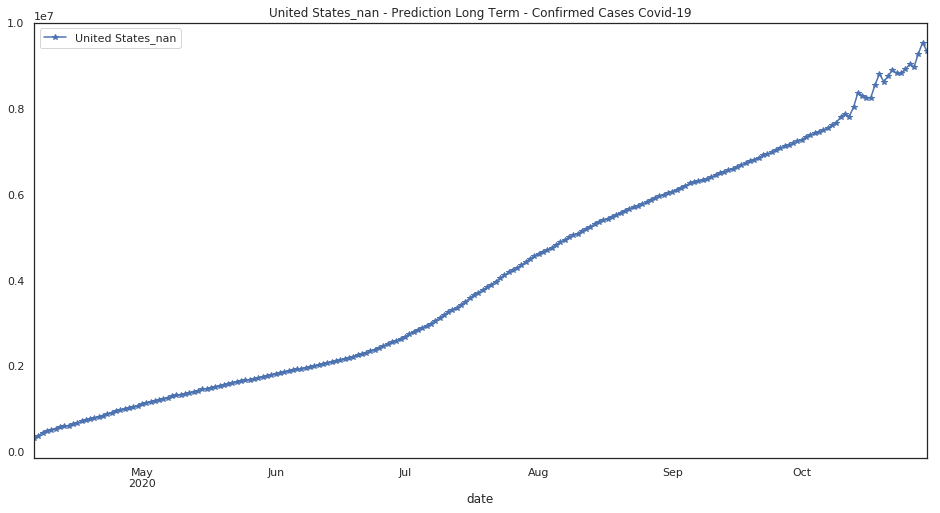

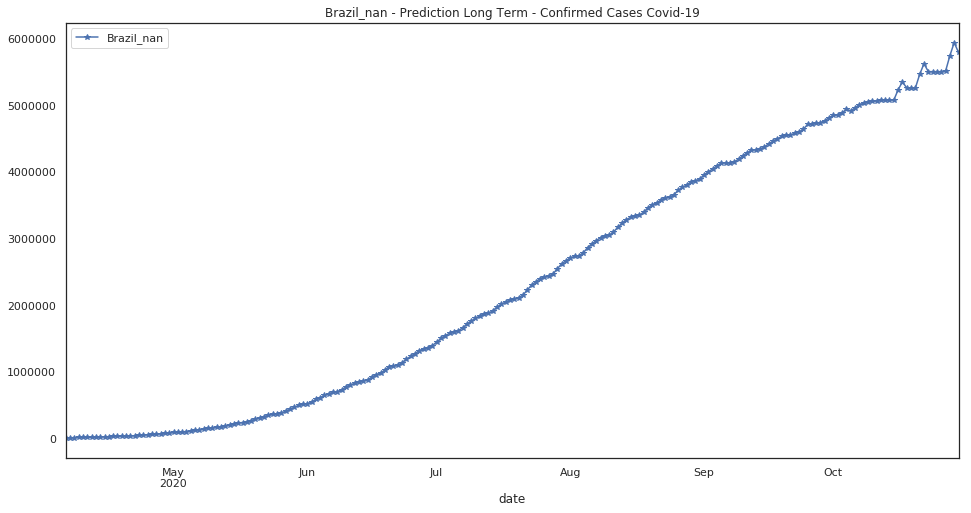

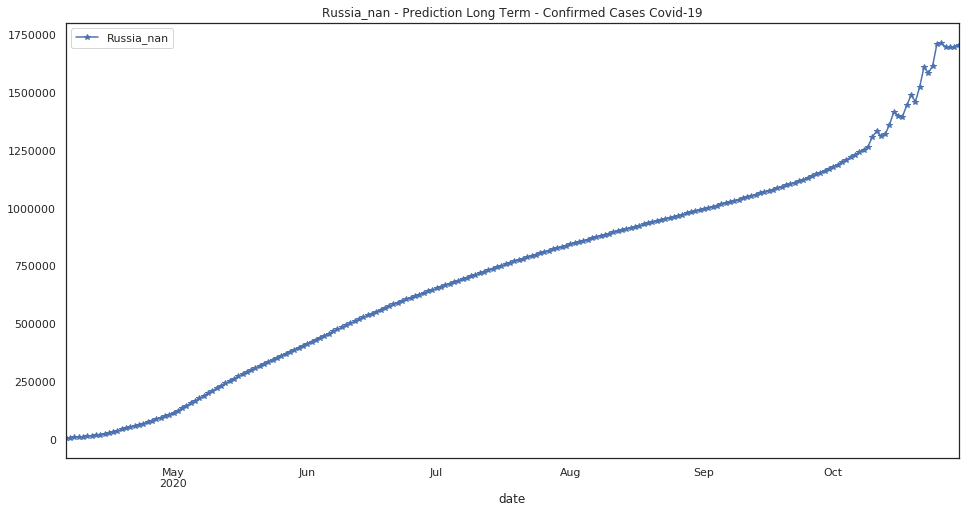

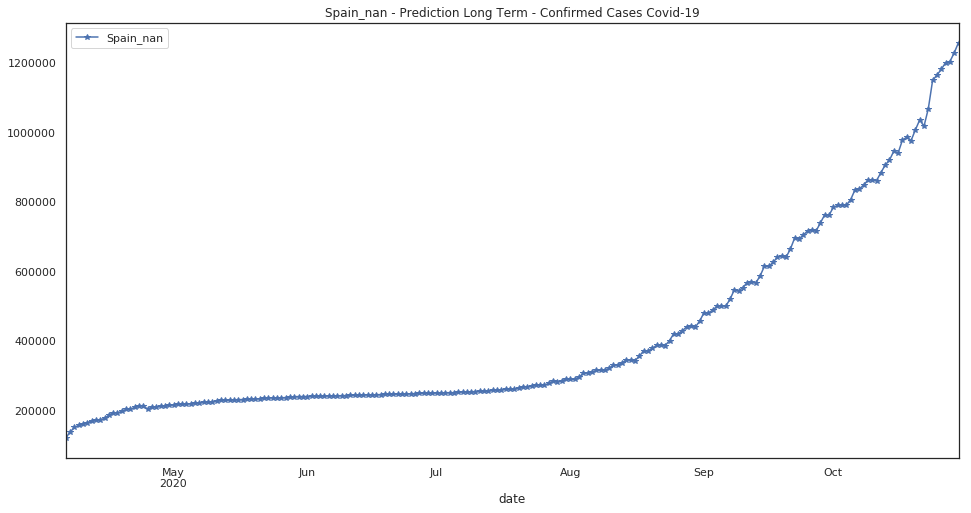

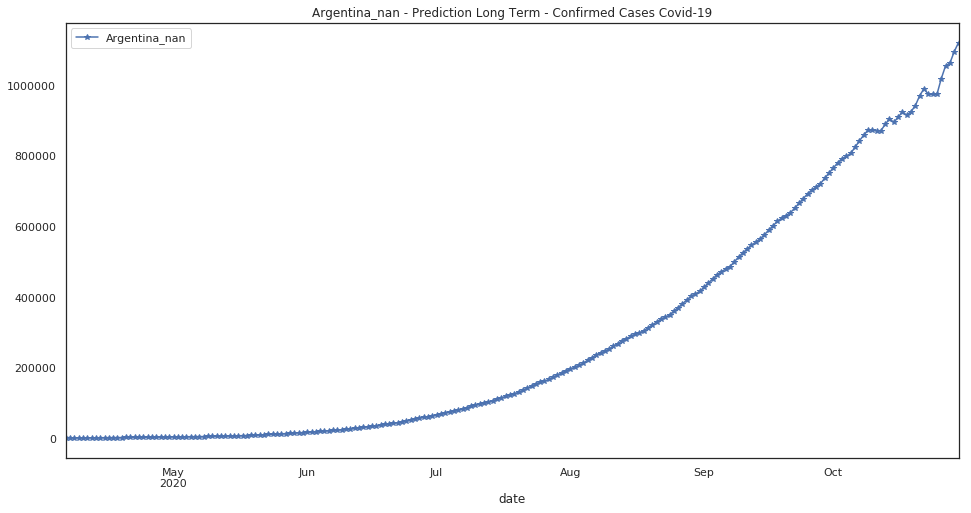

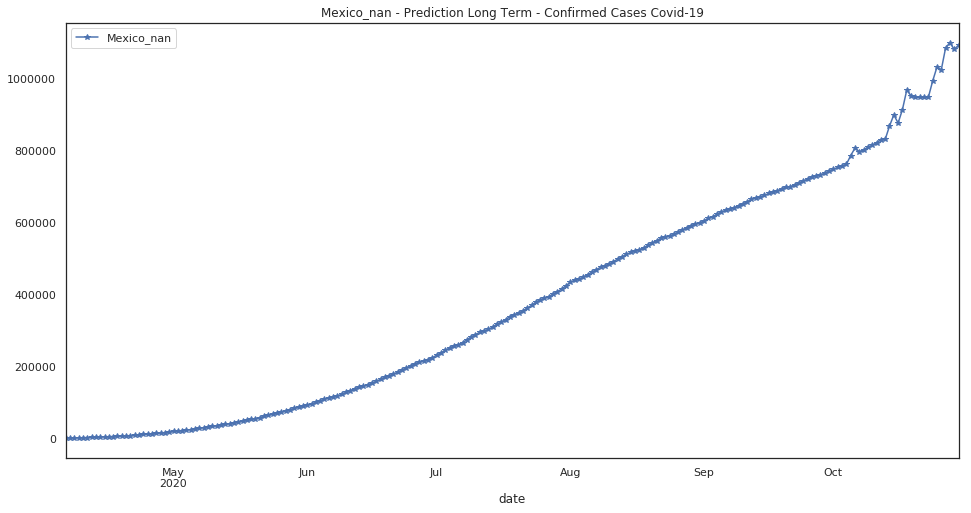

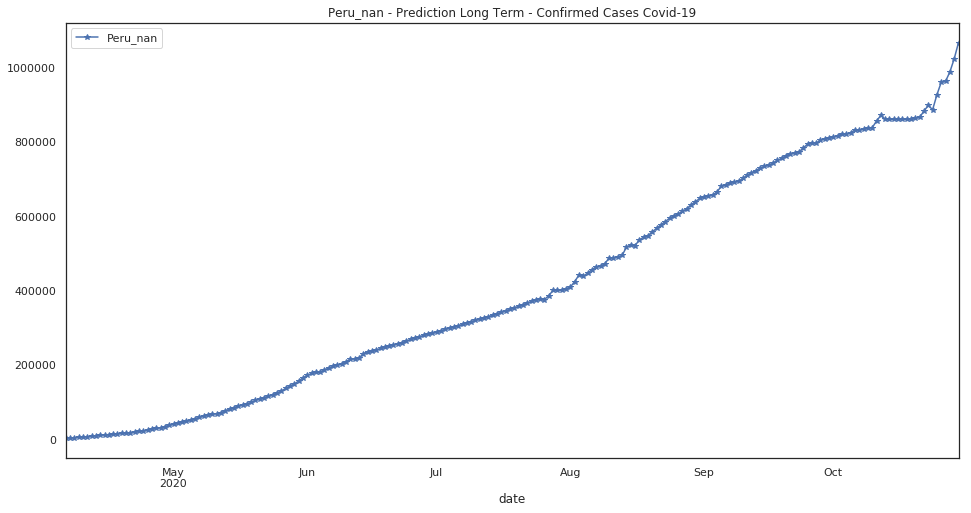

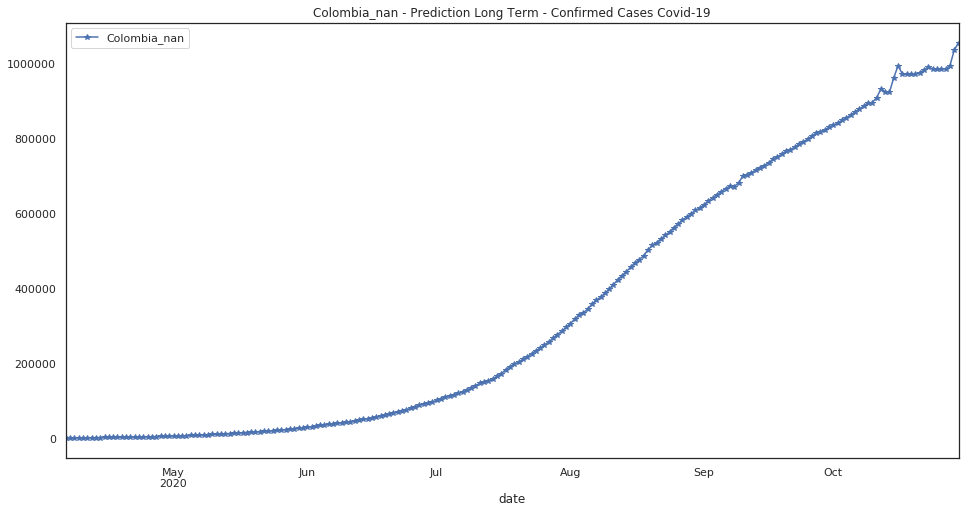

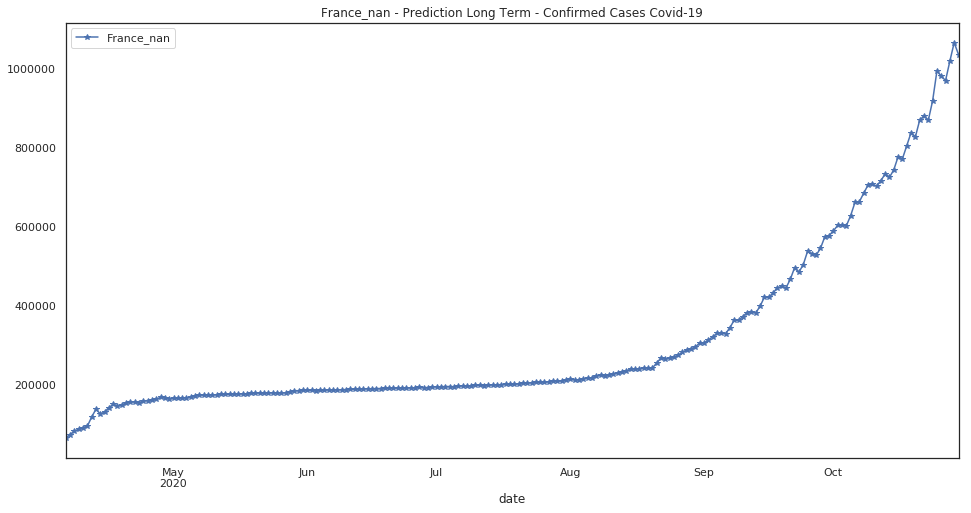

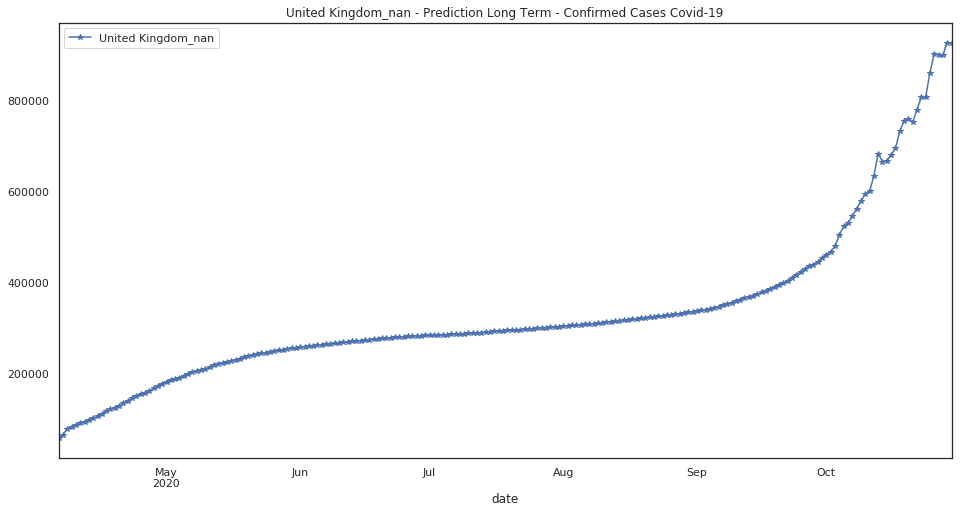

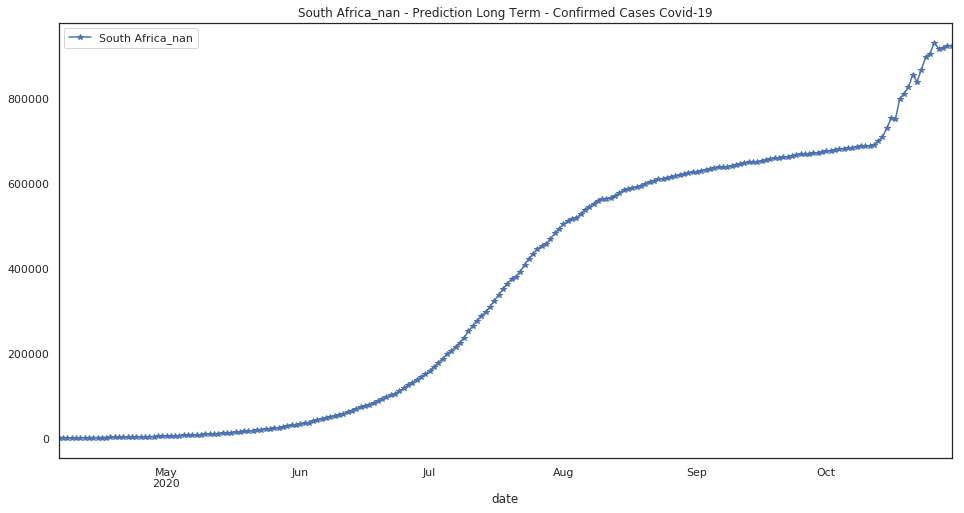

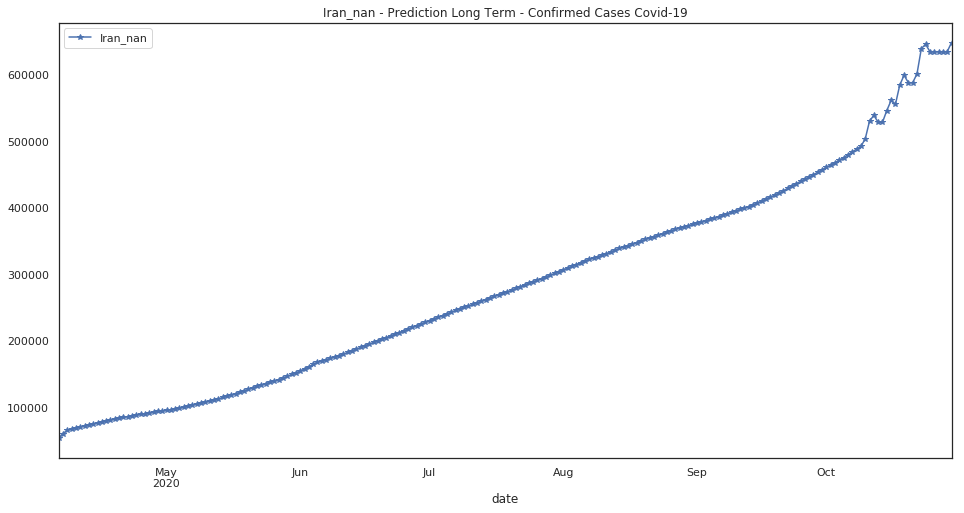

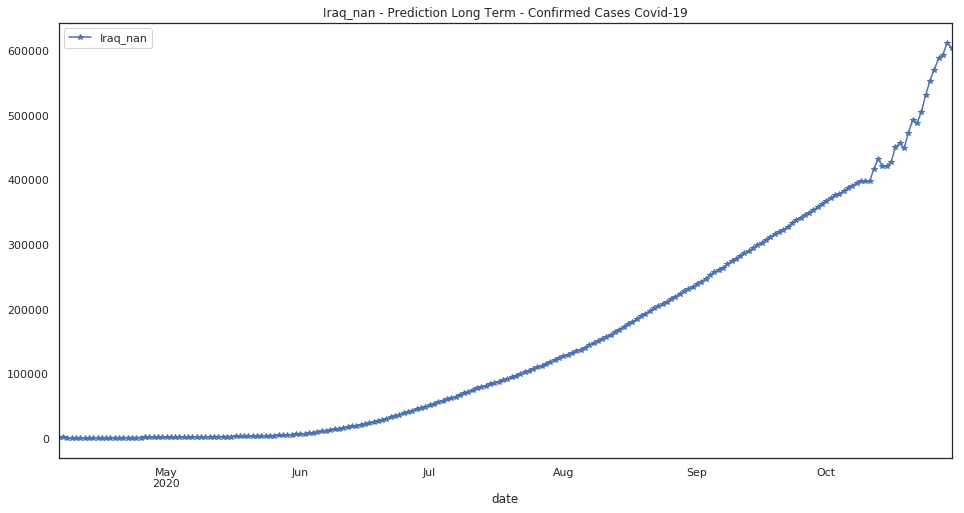

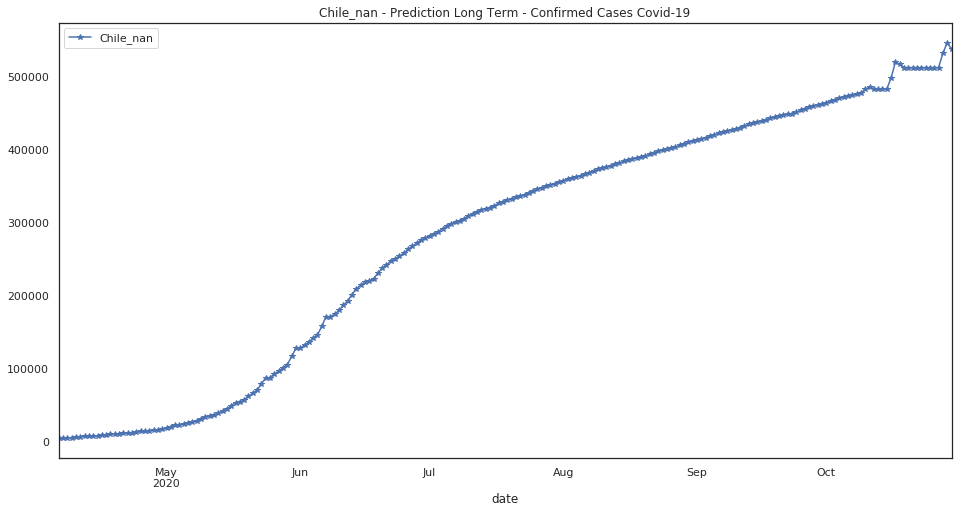

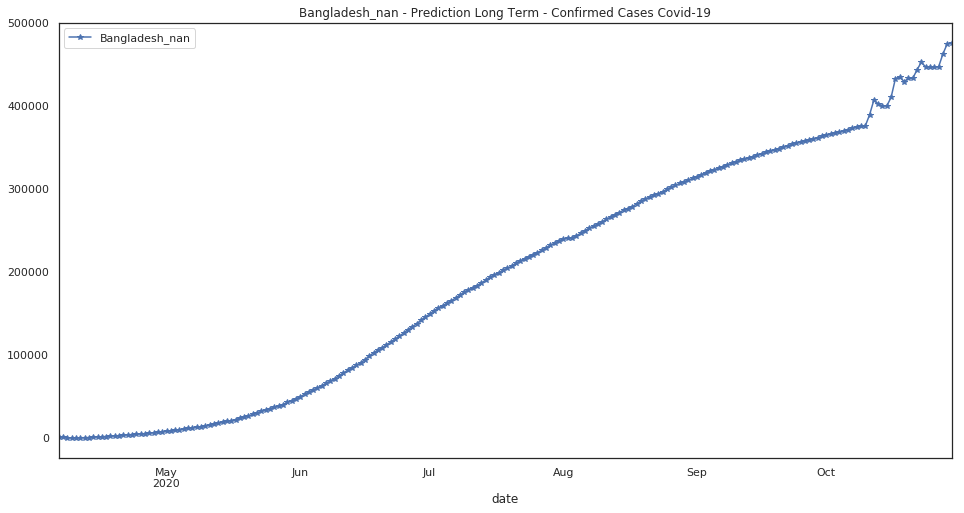

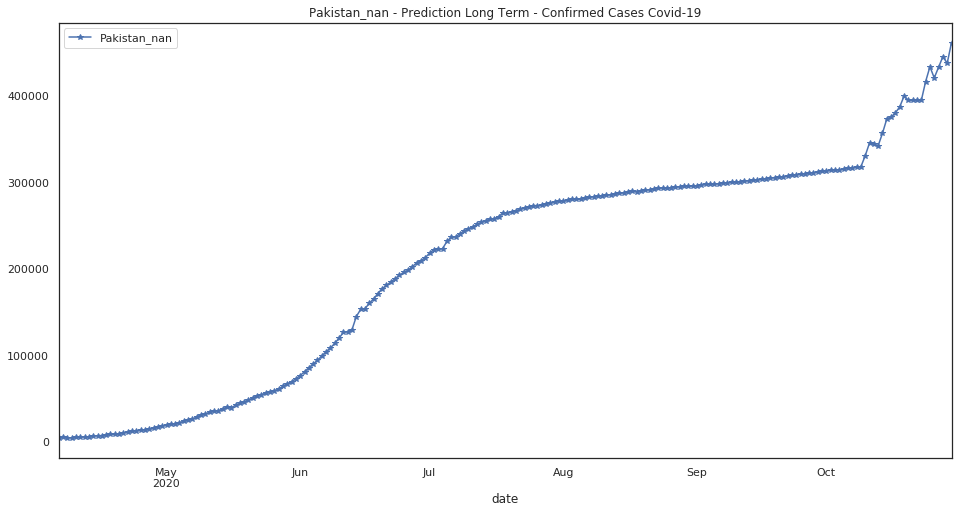

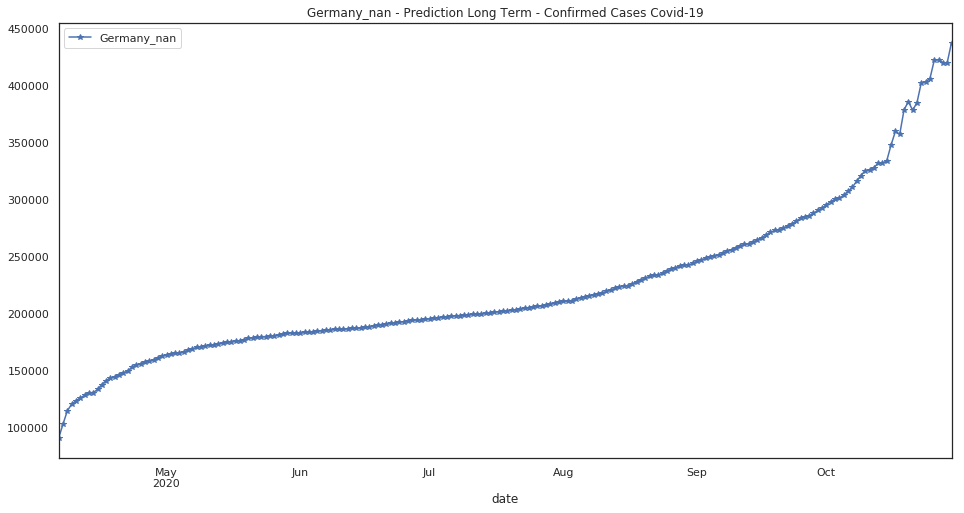

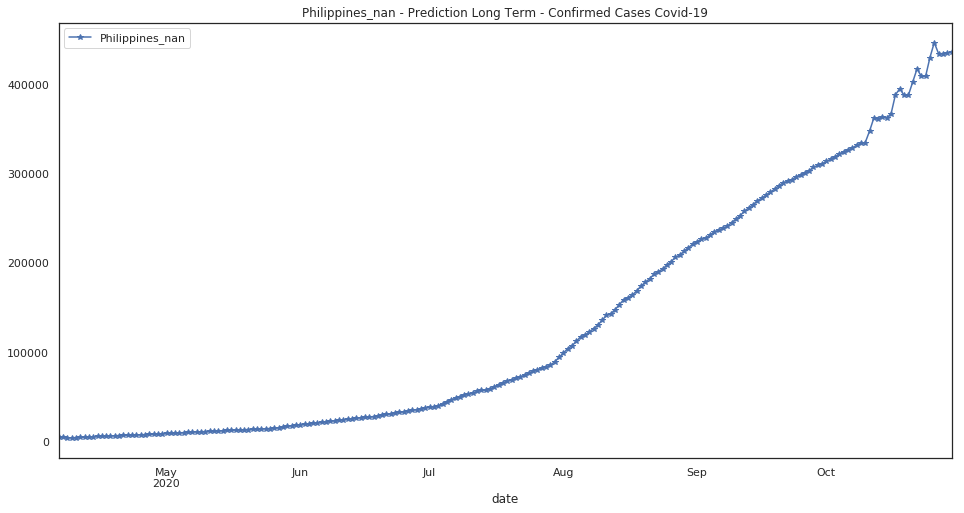

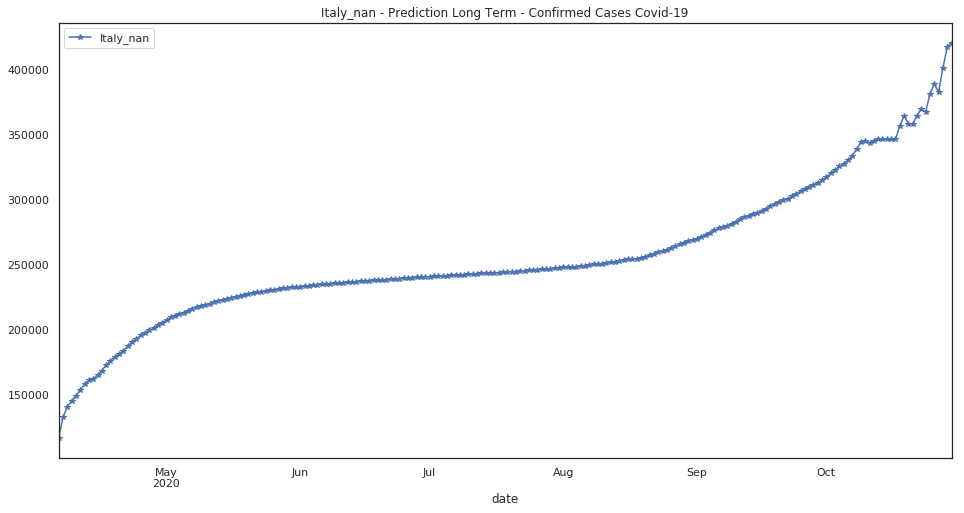

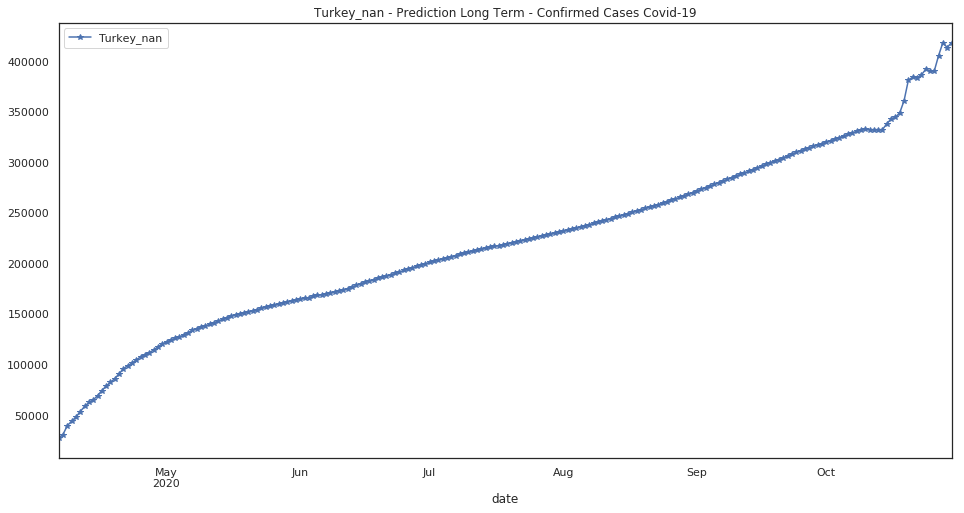

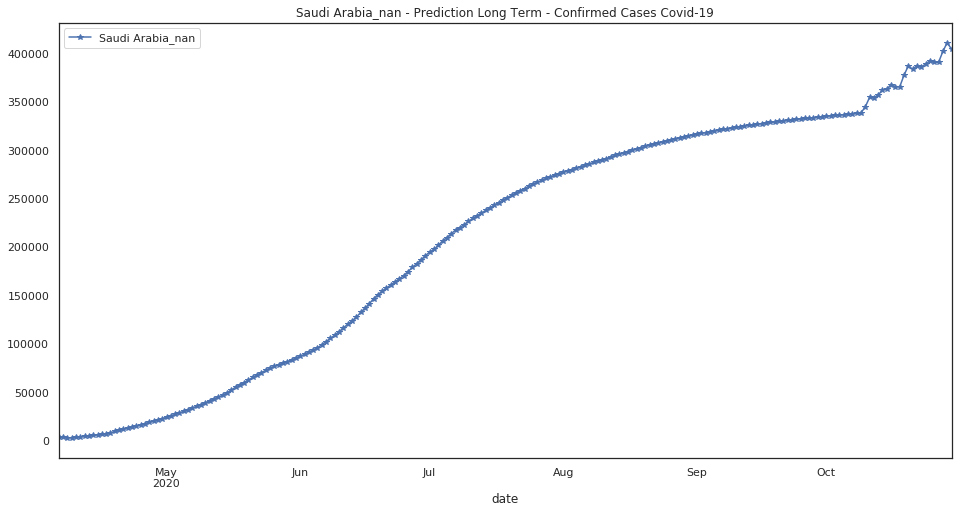

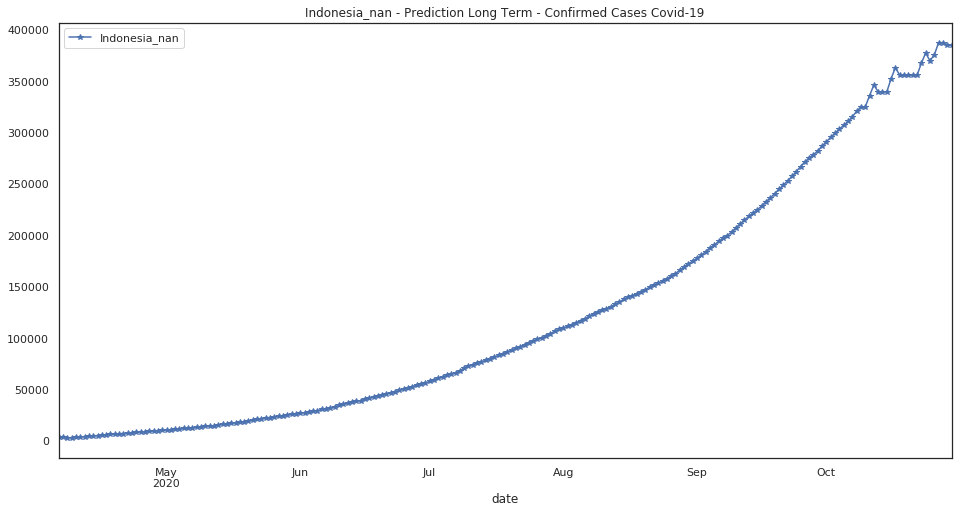

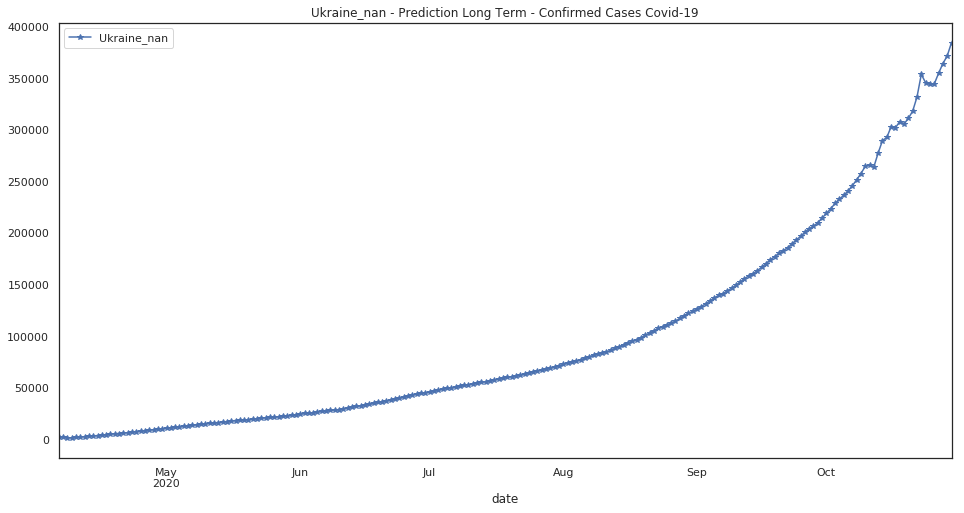

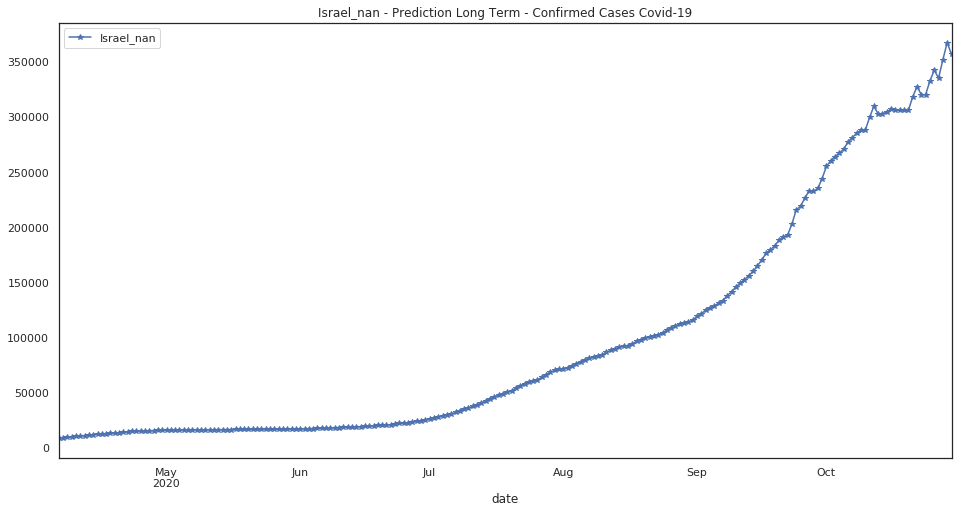

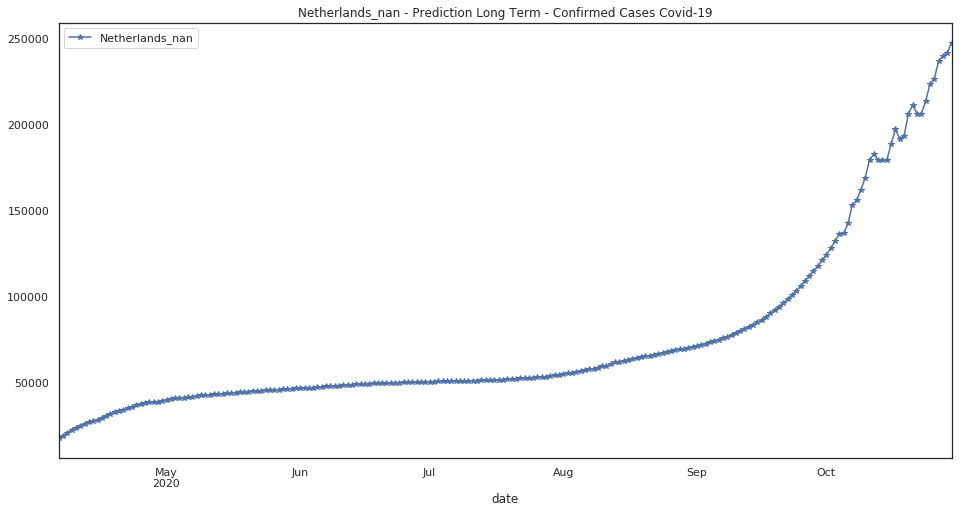

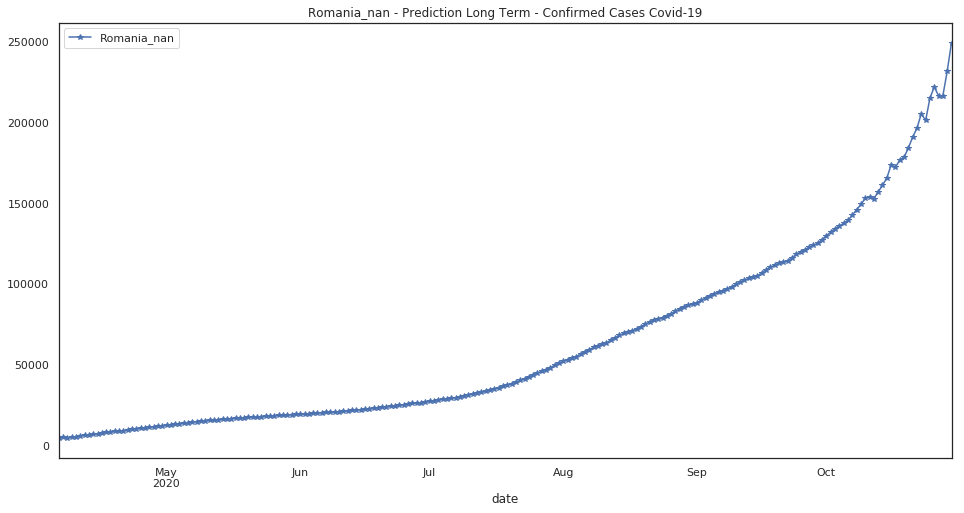

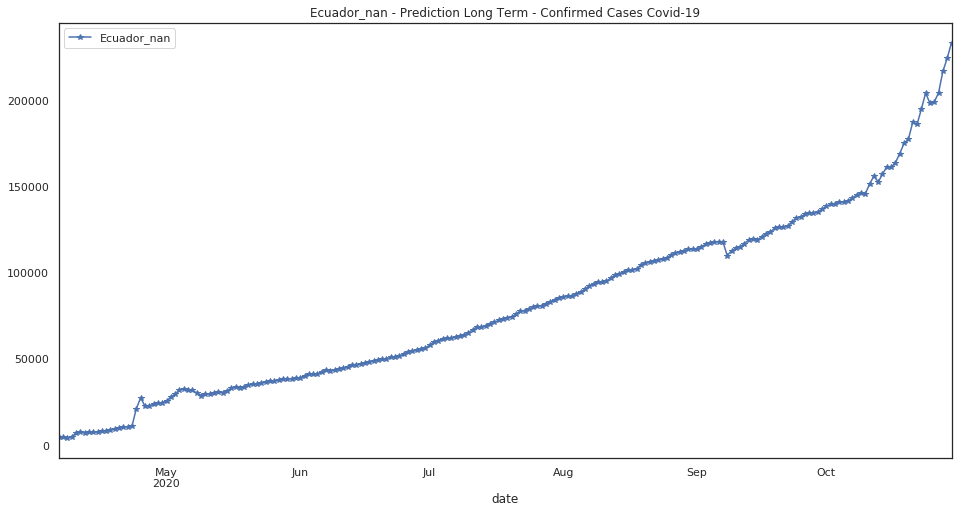

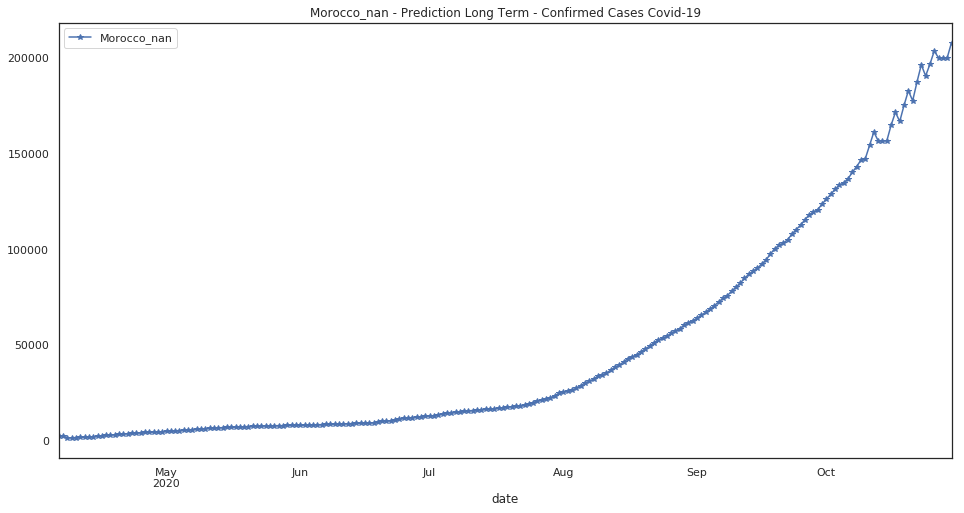

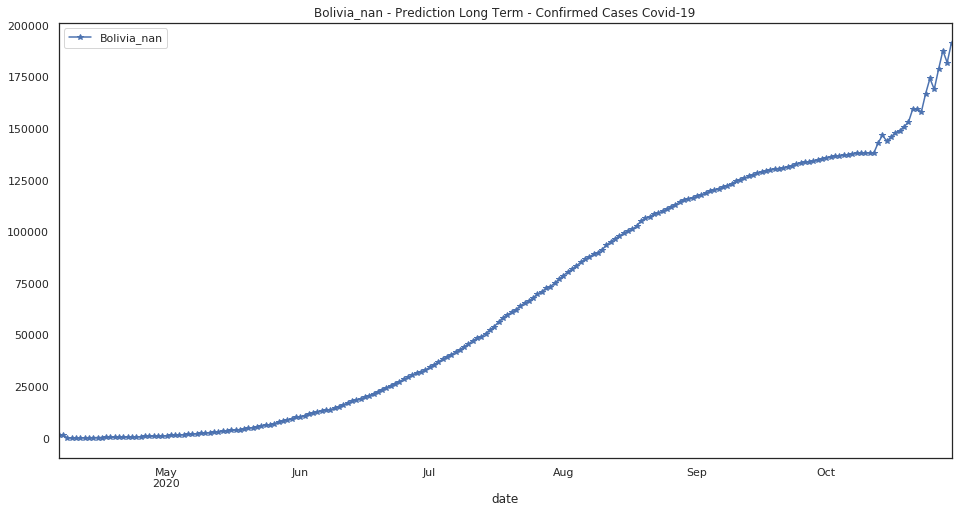

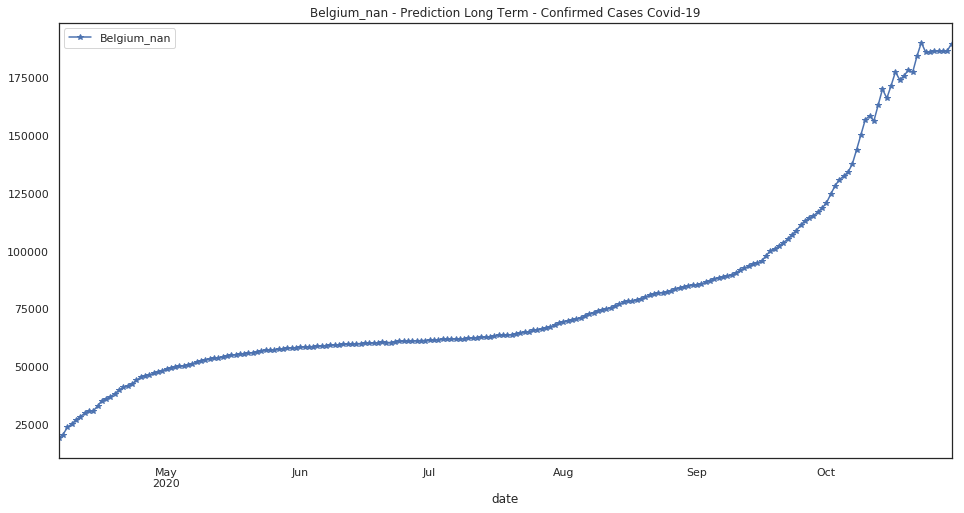

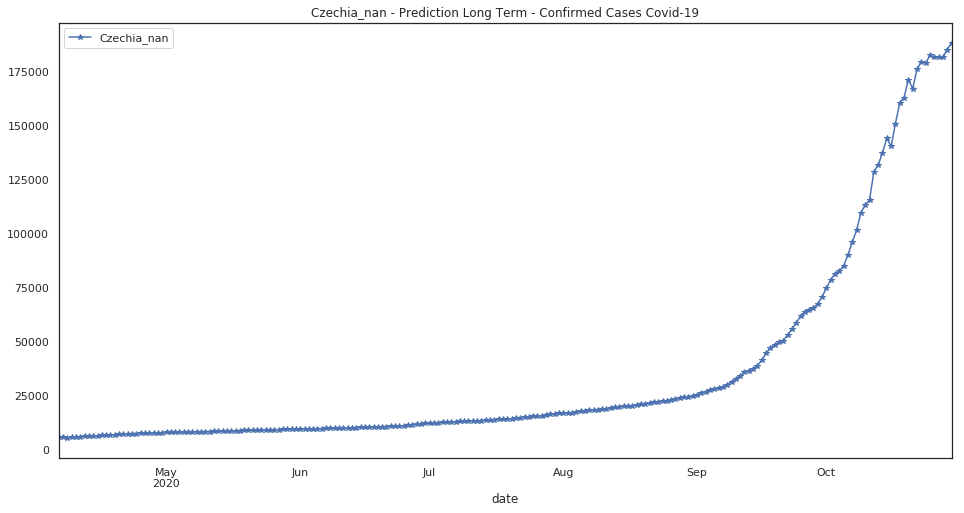

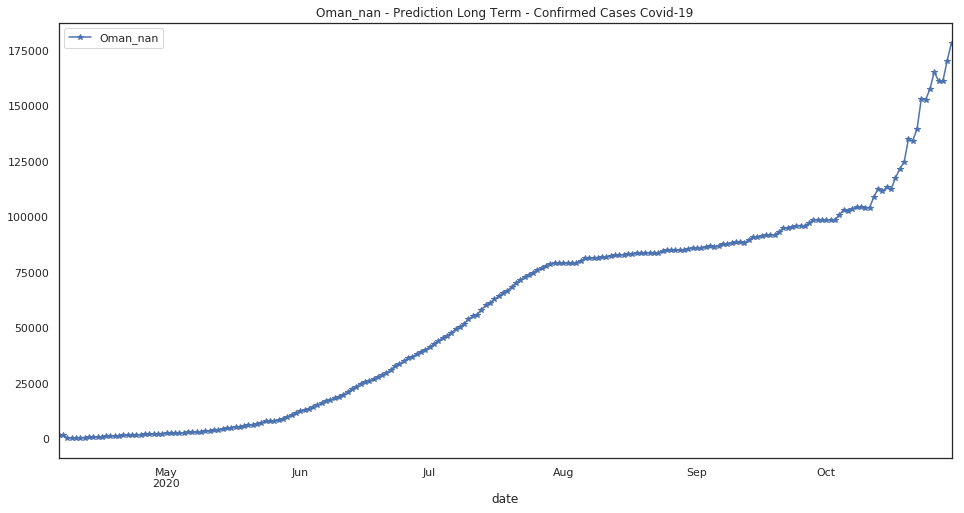

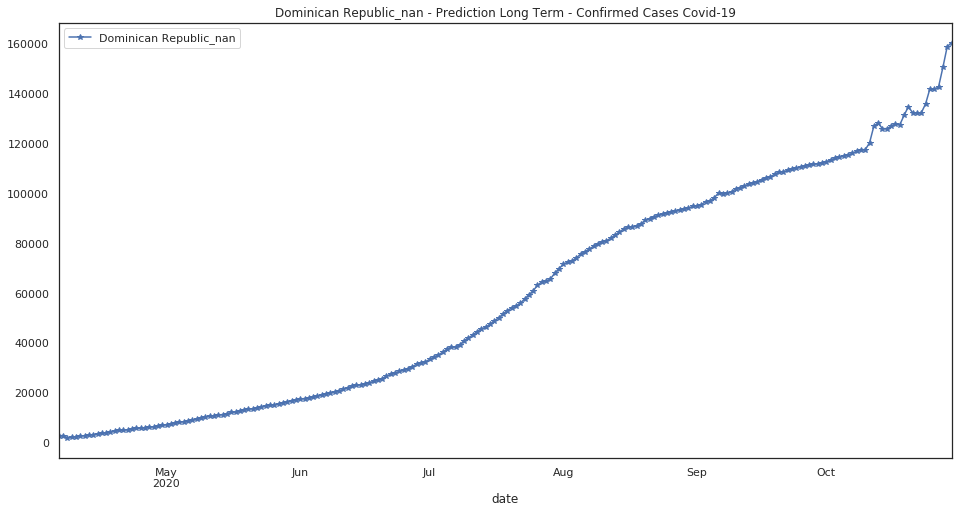

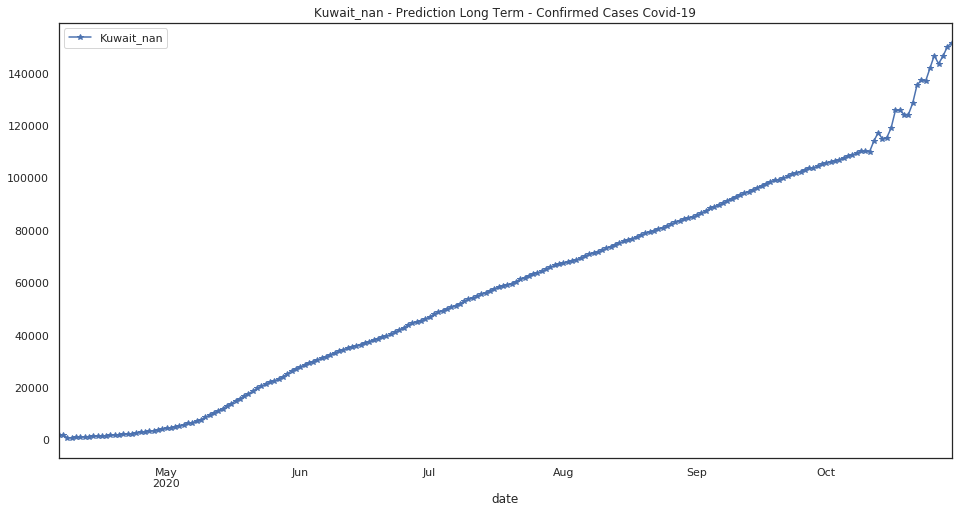

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

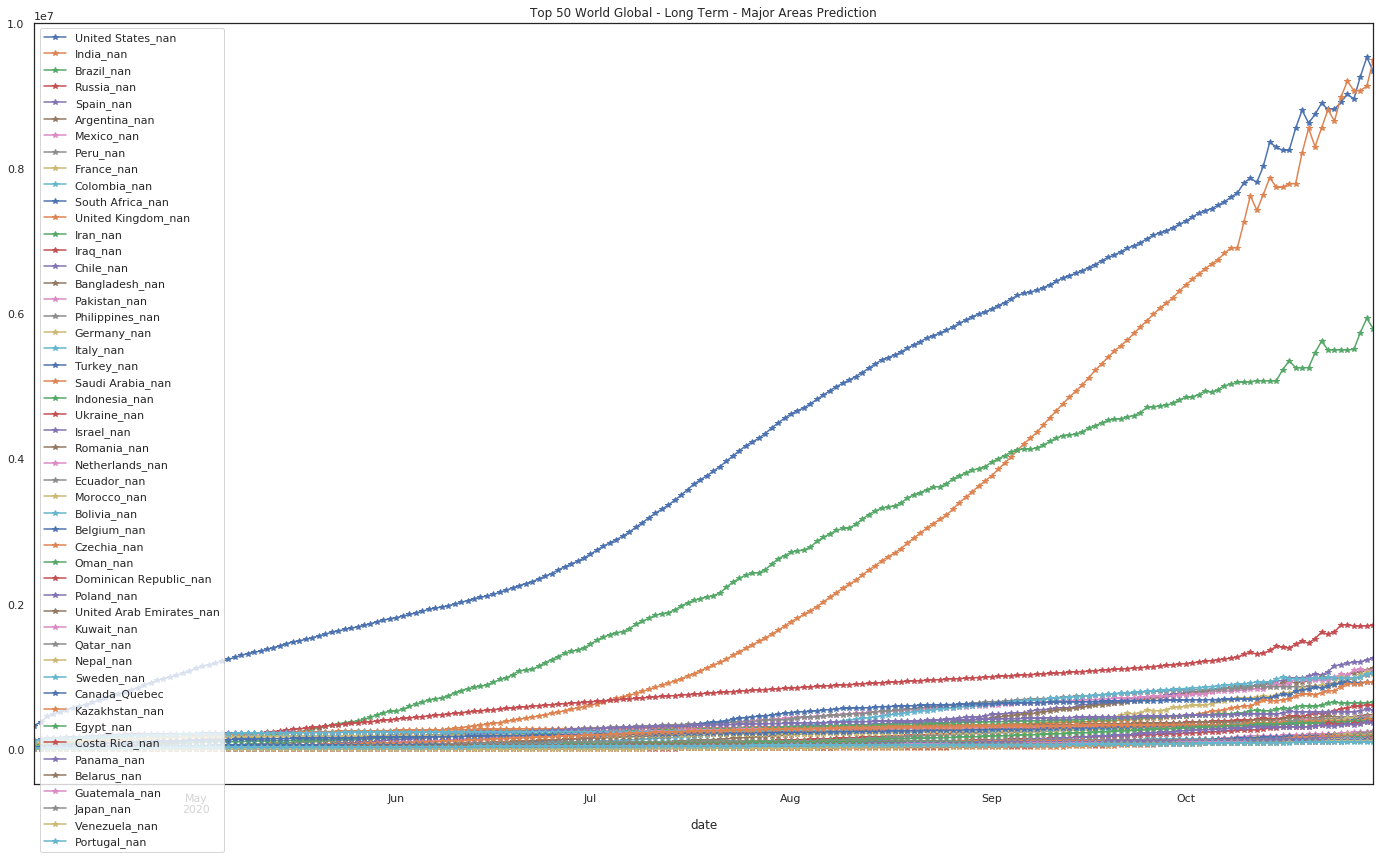

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

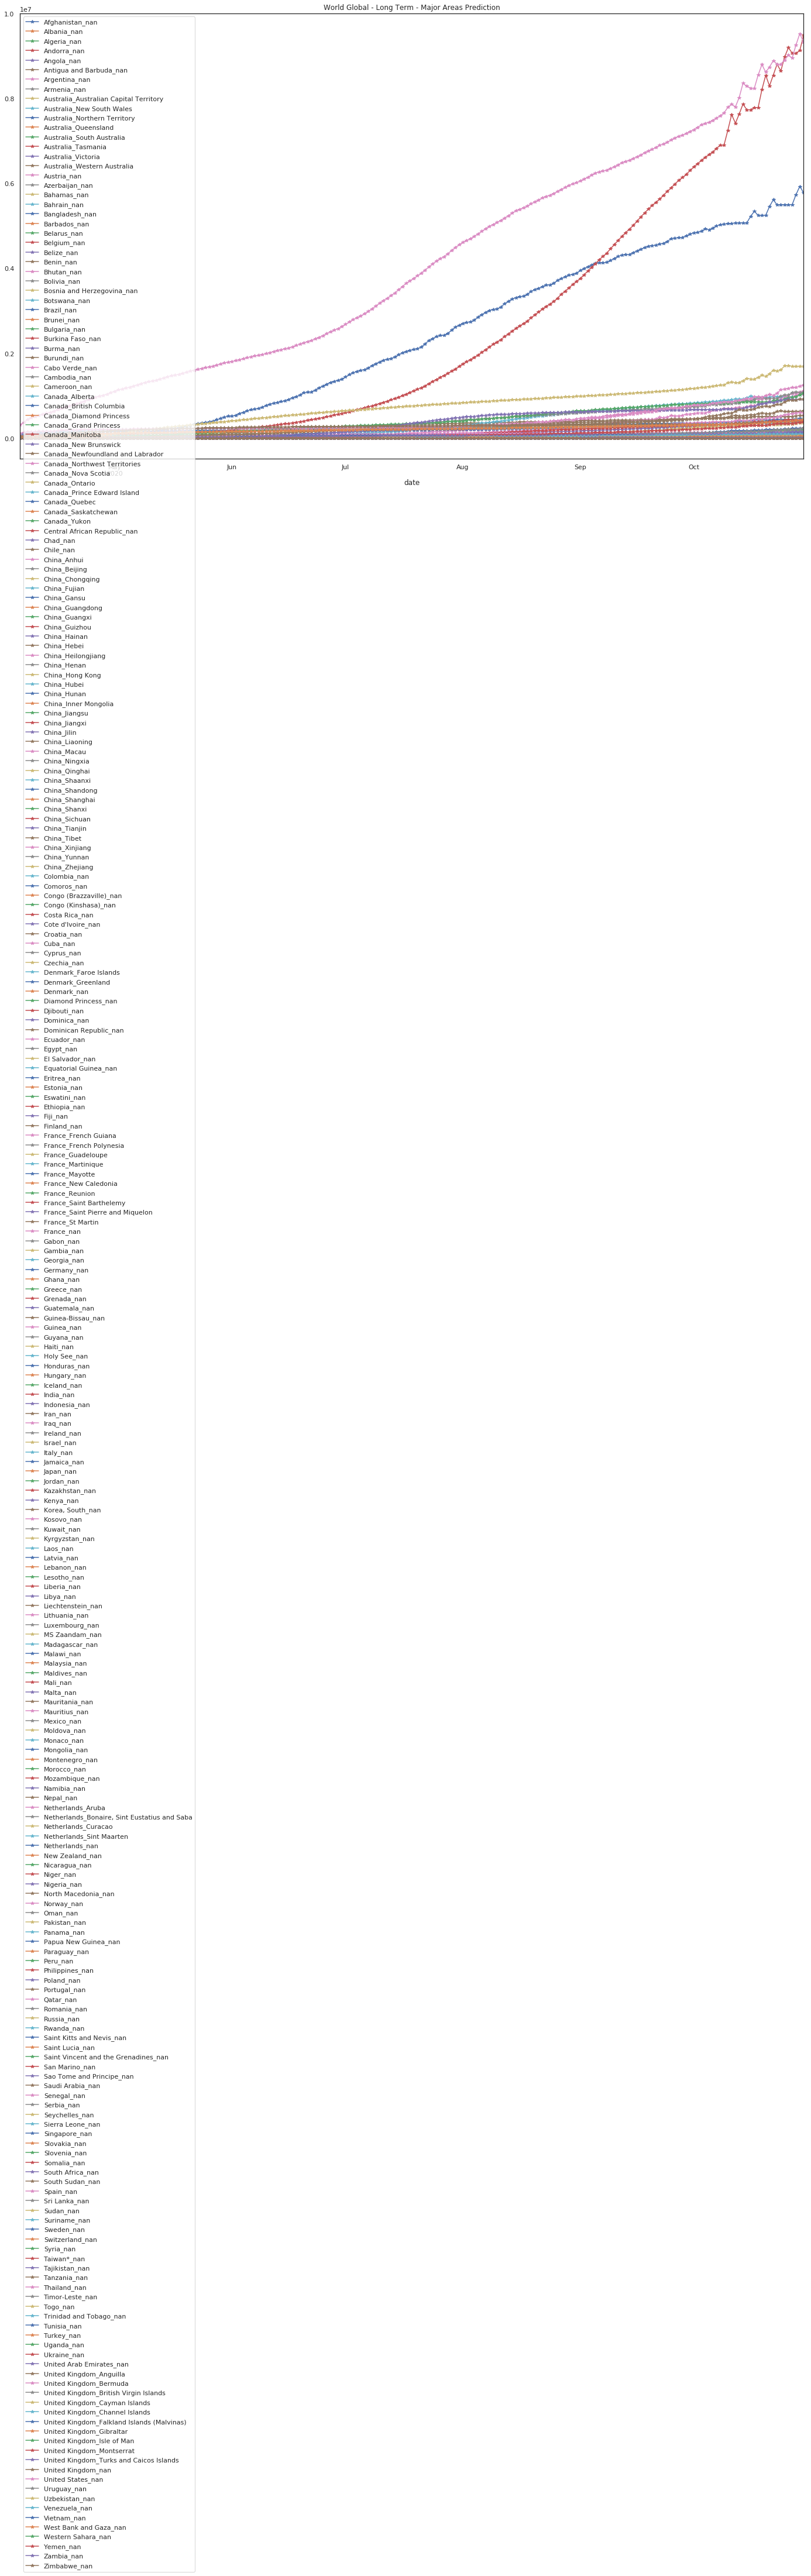

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-05-21           8685.0        968.0       7720.0        802.0   
2020-05-22           9235.0        987.0       7918.0        803.0   
2020-05-23           9989.0        991.0       8114.0        803.0   
2020-05-24          10690.0       1002.0       8309.0        803.0   
2020-05-25          11176.0       1008.0       8505.0        804.0   
2020-05-26          11821.0       1033.0       8700.0        803.0   
2020-05-27          12487.0       1041.0       8863.0        804.0   
2020-05-28          13050.0       1071.0       8991.0        804.0   
2020-05-29          13644.0       1093.0       9123.0        805.0   
2020-05-30          14500.0       1118.0       9259.0        804.0   
2020-05-31          15318.0       1135.0       9389.0        805.0   
2020-06-01          15776.0       1147.0       9509.0        806.0   
2020-06-02          16441.0       1171.0       9622.0        874.0   
2020-06-03          17314.0       1182.0       9731.0        844.0   
2020-06-04          18090.0       1197.0       9830.0        898.0   
2020-06-05          18986.0       1216.0       9931.0        904.0   
2020-06-06          19664.0       1234.0      10049.0        900.0   
2020-06-07          20264.0       1246.0      10160.0        900.0   
2020-06-08          20978.0       1266.0      10266.0        900.0   
2020-06-09          21419.0       1298.0      10385.0        900.0   
2020-06-10          22075.0       1331.0      10492.0        897.0   
2020-06-11          22902.0       1374.0      10590.0        897.0   
2020-06-12          23600.0       1408.0      10700.0        897.0   
2020-06-13          24122.0       1459.0      10813.0        897.0   
2020-06-14          24723.0       1510.0      10924.0        898.0   
2020-06-15          25542.0       1576.0      11034.0        898.0   
2020-06-16          26365.0       1656.0      11151.0        899.0   
2020-06-17          26950.0       1709.0      11273.0        898.0   
2020-06-18          27480.0       1782.0      11392.0        900.0   
2020-06-19          27929.0       1831.0      11508.0        899.0   
...                     ...          ...          ...          ...   
2020-10-01          39283.0      13823.0      51691.0       2136.0   
2020-10-02          39291.0      13994.0      51847.0       2194.0   
2020-10-03          39292.0      14145.0      51995.0       2202.0   
2020-10-04          39333.0      14289.0      52133.0       2204.0   
2020-10-05          39429.0      14431.0      52265.0       2431.0   
2020-10-06          39510.0      14585.0      52392.0       2467.0   
2020-10-07          39558.0      14752.0      52513.0       2644.0   
2020-10-08          39621.0      14921.0      52647.0       2684.0   
2020-10-09          39699.0      15090.0      52803.0       2787.0   
2020-10-10          41203.0      15110.0      52826.0       2880.0   
2020-10-11          42241.0      15066.0      52804.0       2969.0   
2020-10-12          42658.0      15764.0      52804.0       3186.0   
2020-10-13          43699.0      16256.0      54443.0       3244.0   
2020-10-14          43044.0      15889.0      57383.0       3247.0   
2020-10-15          43225.0      16059.0      57496.0       3514.0   
2020-10-16          43225.0      16611.0      56689.0       3715.0   
2020-10-17          43225.0      17042.0      57110.0       3708.0   
2020-10-18          44852.0      17046.0      57110.0       3894.0   
2020-10-19          46091.0      17513.0      57110.0       3991.0   
2020-10-20          45184.0      18306.0      57110.0       4022.0   
2020-10-21          45184.0      18109.0      57110.0       4060.0   
2020-10-22          45184.0      18036.0      57438.0       4235.0   
2020-10-23          45620.0      18036.0      57697.0       4557.0   
2020-10-24          46000.0      18036.0      57515.0       4643.0   
2020-10-25

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
238                                Thailand_nan  15.870032  100.992541   
239                             Timor-Leste_nan  -8.874217  125.727539   
240                                    Togo_nan   8.619500    0.824800   
241                     Trinidad and Tobago_nan  10.691800  -61.222500   
242                                 Tunisia_nan  33.886917    9.537499   
243                                  Turkey_nan  38.963700   35.243300   
244                           United States_nan  40.000000 -100.000000   
245                                  Uganda_nan   1.373333   32.290275   
246                                 Ukraine_nan  48.379400   31.165600   
247                    United Arab Emirates_nan  23.424076   53.847818   
248                     United Kingdom_Anguilla  18.220600  -63.068600   
249                      United Kingdom_Bermuda  32.307800  -64.750500   
250       United Kingdom_British Virgin Islands  18.420700  -64.640000   
251               United Kingdom_Cayman Islands  19.313300  -81.254600   
252              United Kingdom_Channel Islands  49.372300   -2.364400   
253  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
254                    United Kingdom_Gibraltar  36.140800   -5.353600   
255                  United Kingdom_Isle of Man  54.236100   -4.548100   
256                   United Kingdom_Montserrat  16.742498  -62.187366   
257     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
258                          United Kingdom_nan  55.378100   -3.436000   
259                                 Uruguay_nan -32.522800  -55.765800   
260                              Uzbekistan_n

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      20            Bangladesh_nan  23.685000   90.356300   
2      22               Belarus_nan  53.709800   27.953400   
3      23               Belgium_nan  50.833300    4.469936   
4      27               Bolivia_nan -16.290200  -63.588700   
5      30                Brazil_nan -14.235000  -51.925300   
6      50             Canada_Quebec  52.939900  -73.549100   
7      55                 Chile_nan -35.675100  -71.543000   
8      89              Colombia_nan   4.570900  -74.297300   
9      93            Costa Rica_nan   9.748900  -83.753400   
10     98               Czechia_nan  49.817500   15.473000   
11    105    Dominican Republic_nan  18.735700  -70.162700   
12    106               Ecuador_nan  -1.831200  -78.183400   
13    107                 Egypt_nan  26.820553   30.802498   
14    126                France_nan  46.227600    2.213700   
15    131               Germany_nan  51.165691   10.451526   
16    135             Guatemala_nan  15.783500  -90.230800   
17    141              Honduras_nan  15.200000  -86.241900   
18    144                 India_nan  20.593684   78.962880   
19    145             Indonesia_nan  -0.789300  113.921300   
20    146                  Iran_nan  32.427908   53.688046   
21    147                  Iraq_nan  33.223191   43.679291   
22    149                Israel_nan  31.046051   34.851612   
23    150                 Italy_nan  41.871940   12.567380   
24    152                 Japan_nan  36.204824  138.252924   
25    154            Kazakhstan_nan  48.019600   66.923700   
26    158                Kuwait_nan  29.311660   47.481766   
27    179                Mexico_nan  23.634500 -102.552800   
28    184               Morocco_nan  31.791700   -7.092600   
29    187                 Nepal_nan  28.166700   84.250000   
30    192           Netherlands_nan  52.132600    5.291300   
31    199                  Oman_nan  21.512583   55.923255   
32    200              Pakistan_nan  30.375300   69.345100   
33    201                Panama_nan   8.538000  -80.782100   
34    204                  Peru_nan  -9.190000  -75.015200   
35    205           Philippines_nan  12.879721  121.774017   
36    206                Poland_nan  51.919400   19.145100   
37    207              Portugal_nan  39.399900   -8.224500   
38    208                 Qatar_nan  25.354800   51.183900   
39    209               Romania_nan  45.943200   24.966800   
40    210                Russia_nan  61.524010  105.318756   
41    217          Saudi Arabia_nan  23.885942   45.079162   
42    226          South Africa_nan -30.559500   22.937500   
43    228                 Spain_nan  40.463667   -3.749220   
44    232                Sweden_nan  60.128161   18.643501   
45    243                Turkey_nan  38.963700   35.243300   
46    244         United States_nan  40.000000 -100.000000   
47    246               Ukraine_nan  48.379400   31.165600   
48    247  United Arab Emirates_nan  23.424076   53.847818   
49    258        United Kingdom_nan  55.378100   -3.436000   
50    261             Venezuela_nan   6.423800  -66.589700   

    2020-04-06 00:00:00  2020-04-07 00:00:00  2020-04-08 00:00:00  \
0                2572.0               2636.0               1628.0   
1                1325.0               1361.0                164.0   
2                1828.0               1968.0                861.0   
3               19346.0              20814.0              23882.0   
4                1377.0               1387.0                194.0   
5               11810.0              13441.0              16715.0   
6                8691.0               9353.0              10160.0   
7                5581.0               5843.0               5653.0   
8                2593.0               2768.0               1834.0   
9                1625.0               1639.0                483.0   
10               541

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()